# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 22:02:31.065288: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T22:02:33.859974
2025-04-14 22:02:33.859974


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 7
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 280
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 22:02:29"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

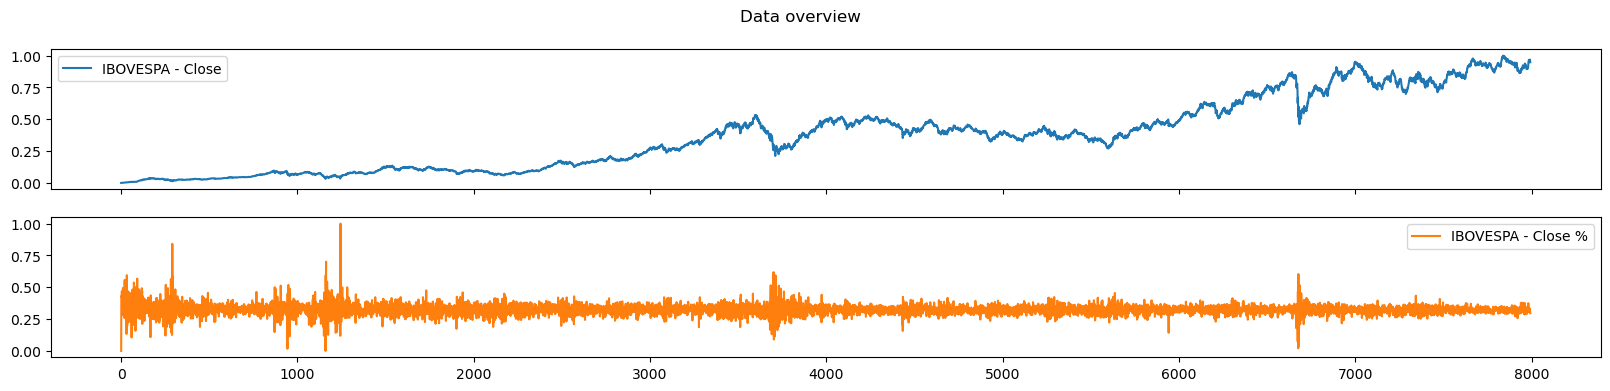

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

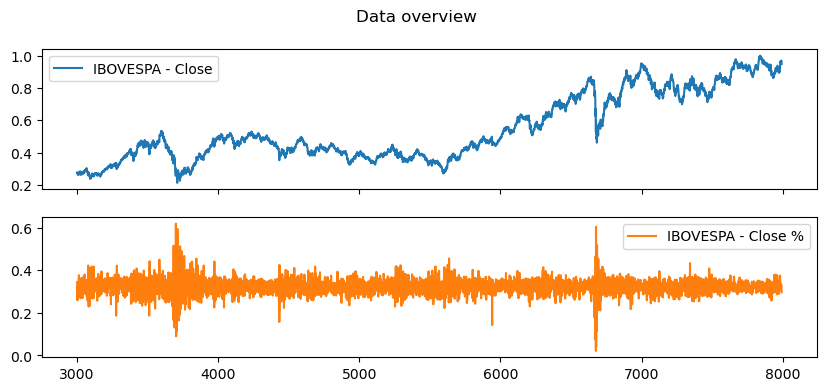

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

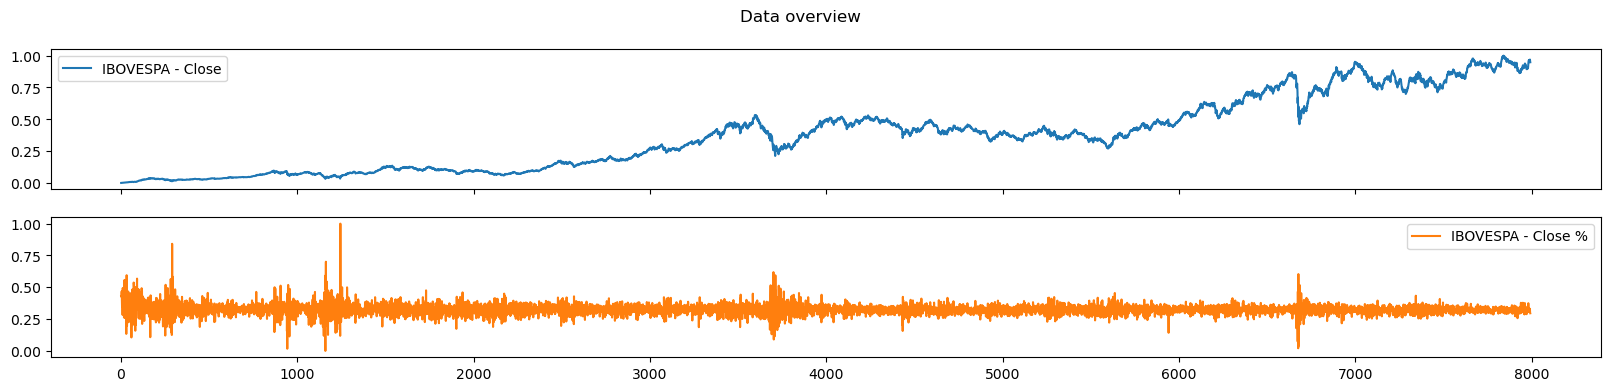

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

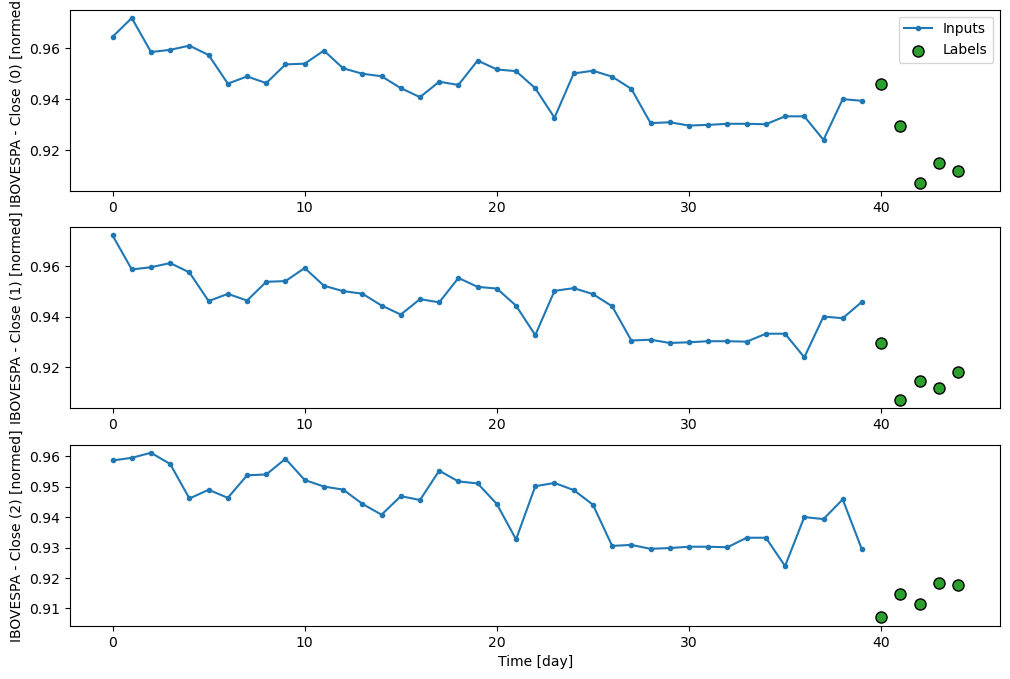

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9:10 2s/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.8622e-05 - root_mean_squared_error: 0.0077

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 120.0644 - mean_squared_error: 1.7635e-04 - root_mean_squared_error: 0.0128

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 106.2093 - mean_squared_error: 1.8026e-04 - root_mean_squared_error: 0.0131

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 97.0409 - mean_squared_error: 2.3522e-04 - root_mean_squared_error: 0.0150 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 90.3422 - mean_squared_error: 2.4746e-04 - root_mean_squared_error: 0.0154

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 84.1187 - mean_squared_error: 2.4324e-04 - root_mean_squared_error: 0.0154

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 80.2824 - mean_squared_error: 2.3715e-04 - root_mean_squared_error: 0.0152

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 76.7291 - mean_squared_error: 2.3013e-04 - root_mean_squared_error: 0.0150

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 73.4756 - mean_squared_error: 2.2293e-04 - root_mean_squared_error: 0.0147

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 69.1955 - mean_squared_error: 2.1286e-04 - root_mean_squared_error: 0.0144

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 66.7853 - mean_squared_error: 2.0901e-04 - root_mean_squared_error: 0.0143

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 64.6936 - mean_squared_error: 2.0919e-04 - root_mean_squared_error: 0.0143

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 62.8131 - mean_squared_error: 2.1061e-04 - root_mean_squared_error: 0.0143

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 60.4713 - mean_squared_error: 2.1822e-04 - root_mean_squared_error: 0.0146

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 59.0117 - mean_squared_error: 2.2168e-04 - root_mean_squared_error: 0.0147

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 57.0619 - mean_squared_error: 2.2582e-04 - root_mean_squared_error: 0.0149

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 55.3124 - mean_squared_error: 2.2893e-04 - root_mean_squared_error: 0.0150

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 54.2414 - mean_squared_error: 2.3074e-04 - root_mean_squared_error: 0.0150

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.7547 - mean_squared_error: 2.3303e-04 - root_mean_squared_error: 0.0151

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 51.8509 - mean_squared_error: 2.3605e-04 - root_mean_squared_error: 0.0152

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 50.9896 - mean_squared_error: 2.3902e-04 - root_mean_squared_error: 0.0153

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 50.1594 - mean_squared_error: 2.4144e-04 - root_mean_squared_error: 0.0154

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 49.3738 - mean_squared_error: 2.4381e-04 - root_mean_squared_error: 0.0155

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 48.2512 - mean_squared_error: 2.4670e-04 - root_mean_squared_error: 0.0156

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 47.5334 - mean_squared_error: 2.4808e-04 - root_mean_squared_error: 0.0156

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 46.8583 - mean_squared_error: 2.4954e-04 - root_mean_squared_error: 0.0157

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 45.8936 - mean_squared_error: 2.5122e-04 - root_mean_squared_error: 0.0157

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 45.2817 - mean_squared_error: 2.5207e-04 - root_mean_squared_error: 0.0158

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 44.4361 - mean_squared_error: 2.5348e-04 - root_mean_squared_error: 0.0158

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 43.6369 - mean_squared_error: 2.5451e-04 - root_mean_squared_error: 0.0158

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 43.1378 - mean_squared_error: 2.5537e-04 - root_mean_squared_error: 0.0159

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 42.6713 - mean_squared_error: 2.5711e-04 - root_mean_squared_error: 0.0159

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 42.2399 - mean_squared_error: 2.6119e-04 - root_mean_squared_error: 0.0160

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 41.6363 - mean_squared_error: 2.6927e-04 - root_mean_squared_error: 0.0163

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 41.0536 - mean_squared_error: 2.7651e-04 - root_mean_squared_error: 0.0164

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 40.6749 - mean_squared_error: 2.8084e-04 - root_mean_squared_error: 0.0166

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 40.1215 - mean_squared_error: 2.8674e-04 - root_mean_squared_error: 0.0167

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 39.7633 - mean_squared_error: 2.9047e-04 - root_mean_squared_error: 0.0168

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 39.2528 - mean_squared_error: 2.9772e-04 - root_mean_squared_error: 0.0170

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 38.7718 - mean_squared_error: 3.0774e-04 - root_mean_squared_error: 0.0173

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 38.4673 - mean_squared_error: 3.1611e-04 - root_mean_squared_error: 0.0175

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 38.0234 - mean_squared_error: 3.2840e-04 - root_mean_squared_error: 0.0177

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 37.5935 - mean_squared_error: 3.4043e-04 - root_mean_squared_error: 0.0180

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 37.3140 - mean_squared_error: 3.4846e-04 - root_mean_squared_error: 0.0182

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 36.9048 - mean_squared_error: 3.6060e-04 - root_mean_squared_error: 0.0185

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 36.5044 - mean_squared_error: 3.7196e-04 - root_mean_squared_error: 0.0187

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 36.2453 - mean_squared_error: 3.8019e-04 - root_mean_squared_error: 0.0189

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 36.0014 - mean_squared_error: 3.9244e-04 - root_mean_squared_error: 0.0192

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 35.7663 - mean_squared_error: 4.0555e-04 - root_mean_squared_error: 0.0194

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 35.4268 - mean_squared_error: 4.2708e-04 - root_mean_squared_error: 0.0198

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 35.1129 - mean_squared_error: 4.6291e-04 - root_mean_squared_error: 0.0204

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 34.9184 - mean_squared_error: 4.9937e-04 - root_mean_squared_error: 0.0209

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 34.6433 - mean_squared_error: 5.6404e-04 - root_mean_squared_error: 0.0217

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 34.4650 - mean_squared_error: 6.0688e-04 - root_mean_squared_error: 0.0223

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 34.2922 - mean_squared_error: 6.5218e-04 - root_mean_squared_error: 0.0229

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 34.1214 - mean_squared_error: 6.9597e-04 - root_mean_squared_error: 0.0234

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 33.9514 - mean_squared_error: 7.3778e-04 - root_mean_squared_error: 0.0239

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 33.7834 - mean_squared_error: 7.7794e-04 - root_mean_squared_error: 0.0245

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 33.6166 - mean_squared_error: 8.1636e-04 - root_mean_squared_error: 0.0249

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 33.4520 - mean_squared_error: 8.5358e-04 - root_mean_squared_error: 0.0254

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 33.2893 - mean_squared_error: 8.8936e-04 - root_mean_squared_error: 0.0259

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 33.1279 - mean_squared_error: 9.2364e-04 - root_mean_squared_error: 0.0263

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 32.8876 - mean_squared_error: 9.7227e-04 - root_mean_squared_error: 0.0270

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 32.6504 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0276    

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 32.4948 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0279

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 32.2641 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0285

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 32.0365 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 31.8875 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0293

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 31.7401 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0297

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 31.5950 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0300

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 31.4512 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 31.3091 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 31.1686 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0308

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 31.0301 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0311

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 30.8279 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 30.6355 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 30.4528 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0324

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 30.3356 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0327

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 30.1658 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 30.0561 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0335

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 29.9484 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0338

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 29.7888 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 29.6831 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0346

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 29.5261 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0351

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 29.3702 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 29.2668 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0358

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 29.1152 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 28.9680 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 28.8709 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0369

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 28.7285 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0373

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 28.6359 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 28.5442 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0380

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 28.4532 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0383

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 28.3629 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0385

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 28.2733 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0388

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 28.1844 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0391

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 28.0523 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0395

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 27.9212 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0399

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 27.7919 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0403 - val_loss: 0.0250 - val_mean_absolute_error: 0.0250 - val_mean_absolute_percentage_error: 2.6328 - val_mean_squared_error: 9.5404e-04 - val_root_mean_squared_error: 0.0309 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.6372 - mean_absolute_error: 0.6372 - mean_absolute_percentage_error: 8463.3496 - mean_squared_error: 0.4060 - root_mean_squared_error: 0.6372

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.6364 - mean_absolute_error: 0.6364 - mean_absolute_percentage_error: 7061.5259 - mean_squared_error: 0.4051 - root_mean_squared_error: 0.6365 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6291 - mean_absolute_error: 0.6291 - mean_absolute_percentage_error: 5985.4614 - mean_squared_error: 0.3962 - root_mean_squared_error: 0.6294

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6178 - mean_absolute_error: 0.6178 - mean_absolute_percentage_error: 5285.7266 - mean_squared_error: 0.3830 - root_mean_squared_error: 0.6186

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6385 - mean_absolute_error: 0.6385 - mean_absolute_percentage_error: 4821.8984 - mean_squared_error: 0.5009 - root_mean_squared_error: 0.6897

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6401 - mean_absolute_error: 0.6401 - mean_absolute_percentage_error: 4481.6821 - mean_squared_error: 0.5724 - root_mean_squared_error: 0.7383

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6324 - mean_absolute_error: 0.6324 - mean_absolute_percentage_error: 4274.6655 - mean_squared_error: 0.5871 - root_mean_squared_error: 0.7500

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6143 - mean_absolute_error: 0.6143 - mean_absolute_percentage_error: 3992.2581 - mean_squared_error: 0.5875 - root_mean_squared_error: 0.7529

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6038 - mean_absolute_error: 0.6038 - mean_absolute_percentage_error: 3829.8882 - mean_squared_error: 0.5835 - root_mean_squared_error: 0.7516

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5953 - mean_absolute_error: 0.5953 - mean_absolute_percentage_error: 3686.6421 - mean_squared_error: 0.5789 - root_mean_squared_error: 0.7497

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5861 - mean_absolute_error: 0.5861 - mean_absolute_percentage_error: 3500.1050 - mean_squared_error: 0.5723 - root_mean_squared_error: 0.7465

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5791 - mean_absolute_error: 0.5791 - mean_absolute_percentage_error: 3385.7664 - mean_squared_error: 0.5654 - root_mean_squared_error: 0.7425

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5713 - mean_absolute_error: 0.5713 - mean_absolute_percentage_error: 3278.5544 - mean_squared_error: 0.5573 - root_mean_squared_error: 0.7374

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5633 - mean_absolute_error: 0.5633 - mean_absolute_percentage_error: 3178.5764 - mean_squared_error: 0.5484 - root_mean_squared_error: 0.7317

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5510 - mean_absolute_error: 0.5510 - mean_absolute_percentage_error: 3040.3291 - mean_squared_error: 0.5345 - root_mean_squared_error: 0.7223

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5387 - mean_absolute_error: 0.5387 - mean_absolute_percentage_error: 2915.2009 - mean_squared_error: 0.5204 - root_mean_squared_error: 0.7124

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5307 - mean_absolute_error: 0.5307 - mean_absolute_percentage_error: 2838.4470 - mean_squared_error: 0.5111 - root_mean_squared_error: 0.7057

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.5191 - mean_absolute_error: 0.5191 - mean_absolute_percentage_error: 2731.5862 - mean_squared_error: 0.4975 - root_mean_squared_error: 0.6957

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.5116 - mean_absolute_error: 0.5116 - mean_absolute_percentage_error: 2665.3777 - mean_squared_error: 0.4887 - root_mean_squared_error: 0.6892

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.5045 - mean_absolute_error: 0.5045 - mean_absolute_percentage_error: 2602.8726 - mean_squared_error: 0.4801 - root_mean_squared_error: 0.6827

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4976 - mean_absolute_error: 0.4976 - mean_absolute_percentage_error: 2543.5928 - mean_squared_error: 0.4718 - root_mean_squared_error: 0.6764

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4910 - mean_absolute_error: 0.4910 - mean_absolute_percentage_error: 2487.4019 - mean_squared_error: 0.4638 - root_mean_squared_error: 0.6701

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4846 - mean_absolute_error: 0.4846 - mean_absolute_percentage_error: 2434.0303 - mean_squared_error: 0.4561 - root_mean_squared_error: 0.6641

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4784 - mean_absolute_error: 0.4784 - mean_absolute_percentage_error: 2383.2788 - mean_squared_error: 0.4486 - root_mean_squared_error: 0.6582

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4695 - mean_absolute_error: 0.4695 - mean_absolute_percentage_error: 2311.5969 - mean_squared_error: 0.4379 - root_mean_squared_error: 0.6495

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4610 - mean_absolute_error: 0.4610 - mean_absolute_percentage_error: 2244.7817 - mean_squared_error: 0.4276 - root_mean_squared_error: 0.6412

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4528 - mean_absolute_error: 0.4528 - mean_absolute_percentage_error: 2182.2959 - mean_squared_error: 0.4178 - root_mean_squared_error: 0.6331

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4476 - mean_absolute_error: 0.4476 - mean_absolute_percentage_error: 2142.8611 - mean_squared_error: 0.4115 - root_mean_squared_error: 0.6278

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4399 - mean_absolute_error: 0.4399 - mean_absolute_percentage_error: 2086.8059 - mean_squared_error: 0.4025 - root_mean_squared_error: 0.6202

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4350 - mean_absolute_error: 0.4350 - mean_absolute_percentage_error: 2051.3381 - mean_squared_error: 0.3967 - root_mean_squared_error: 0.6152

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4279 - mean_absolute_error: 0.4279 - mean_absolute_percentage_error: 2000.7227 - mean_squared_error: 0.3884 - root_mean_squared_error: 0.6080

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4211 - mean_absolute_error: 0.4211 - mean_absolute_percentage_error: 1952.9232 - mean_squared_error: 0.3804 - root_mean_squared_error: 0.6010

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4166 - mean_absolute_error: 0.4166 - mean_absolute_percentage_error: 1922.4731 - mean_squared_error: 0.3752 - root_mean_squared_error: 0.5965

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.4102 - mean_absolute_error: 0.4102 - mean_absolute_percentage_error: 1878.7863 - mean_squared_error: 0.3678 - root_mean_squared_error: 0.5899

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.4060 - mean_absolute_error: 0.4060 - mean_absolute_percentage_error: 1850.9036 - mean_squared_error: 0.3630 - root_mean_squared_error: 0.5856

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3999 - mean_absolute_error: 0.3999 - mean_absolute_percentage_error: 1810.8059 - mean_squared_error: 0.3561 - root_mean_squared_error: 0.5793

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3941 - mean_absolute_error: 0.3941 - mean_absolute_percentage_error: 1772.6364 - mean_squared_error: 0.3495 - root_mean_squared_error: 0.5732

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3903 - mean_absolute_error: 0.3903 - mean_absolute_percentage_error: 1748.1893 - mean_squared_error: 0.3452 - root_mean_squared_error: 0.5693

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3847 - mean_absolute_error: 0.3847 - mean_absolute_percentage_error: 1712.9198 - mean_squared_error: 0.3390 - root_mean_squared_error: 0.5635

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3811 - mean_absolute_error: 0.3811 - mean_absolute_percentage_error: 1690.2920 - mean_squared_error: 0.3350 - root_mean_squared_error: 0.5598

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3776 - mean_absolute_error: 0.3776 - mean_absolute_percentage_error: 1668.3379 - mean_squared_error: 0.3311 - root_mean_squared_error: 0.5561

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3725 - mean_absolute_error: 0.3725 - mean_absolute_percentage_error: 1636.6031 - mean_squared_error: 0.3254 - root_mean_squared_error: 0.5507

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3692 - mean_absolute_error: 0.3692 - mean_absolute_percentage_error: 1616.2000 - mean_squared_error: 0.3218 - root_mean_squared_error: 0.5472

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3644 - mean_absolute_error: 0.3644 - mean_absolute_percentage_error: 1586.6542 - mean_squared_error: 0.3165 - root_mean_squared_error: 0.5421

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3597 - mean_absolute_error: 0.3597 - mean_absolute_percentage_error: 1558.3057 - mean_squared_error: 0.3114 - root_mean_squared_error: 0.5372

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3567 - mean_absolute_error: 0.3567 - mean_absolute_percentage_error: 1540.0356 - mean_squared_error: 0.3081 - root_mean_squared_error: 0.5339

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3523 - mean_absolute_error: 0.3523 - mean_absolute_percentage_error: 1513.5276 - mean_squared_error: 0.3033 - root_mean_squared_error: 0.5292

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3481 - mean_absolute_error: 0.3481 - mean_absolute_percentage_error: 1488.0536 - mean_squared_error: 0.2986 - root_mean_squared_error: 0.5246

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3454 - mean_absolute_error: 0.3454 - mean_absolute_percentage_error: 1471.6195 - mean_squared_error: 0.2956 - root_mean_squared_error: 0.5216

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3415 - mean_absolute_error: 0.3415 - mean_absolute_percentage_error: 1447.7428 - mean_squared_error: 0.2913 - root_mean_squared_error: 0.5173

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3378 - mean_absolute_error: 0.3378 - mean_absolute_percentage_error: 1424.7358 - mean_squared_error: 0.2871 - root_mean_squared_error: 0.5131

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3353 - mean_absolute_error: 0.3353 - mean_absolute_percentage_error: 1409.8545 - mean_squared_error: 0.2844 - root_mean_squared_error: 0.5103

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3318 - mean_absolute_error: 0.3318 - mean_absolute_percentage_error: 1388.1818 - mean_squared_error: 0.2804 - root_mean_squared_error: 0.5063

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3294 - mean_absolute_error: 0.3294 - mean_absolute_percentage_error: 1374.1473 - mean_squared_error: 0.2778 - root_mean_squared_error: 0.5036

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3271 - mean_absolute_error: 0.3271 - mean_absolute_percentage_error: 1360.4299 - mean_squared_error: 0.2753 - root_mean_squared_error: 0.5010

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3249 - mean_absolute_error: 0.3249 - mean_absolute_percentage_error: 1347.0188 - mean_squared_error: 0.2728 - root_mean_squared_error: 0.4985

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3227 - mean_absolute_error: 0.3227 - mean_absolute_percentage_error: 1333.9043 - mean_squared_error: 0.2704 - root_mean_squared_error: 0.4959

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3205 - mean_absolute_error: 0.3205 - mean_absolute_percentage_error: 1321.0770 - mean_squared_error: 0.2680 - root_mean_squared_error: 0.4935

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3184 - mean_absolute_error: 0.3184 - mean_absolute_percentage_error: 1308.5284 - mean_squared_error: 0.2657 - root_mean_squared_error: 0.4910

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3153 - mean_absolute_error: 0.3153 - mean_absolute_percentage_error: 1290.2079 - mean_squared_error: 0.2623 - root_mean_squared_error: 0.4874

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3132 - mean_absolute_error: 0.3132 - mean_absolute_percentage_error: 1278.3176 - mean_squared_error: 0.2601 - root_mean_squared_error: 0.4851

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3103 - mean_absolute_error: 0.3103 - mean_absolute_percentage_error: 1260.9434 - mean_squared_error: 0.2568 - root_mean_squared_error: 0.4817

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3074 - mean_absolute_error: 0.3074 - mean_absolute_percentage_error: 1244.0999 - mean_squared_error: 0.2537 - root_mean_squared_error: 0.4783

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3055 - mean_absolute_error: 0.3055 - mean_absolute_percentage_error: 1233.1547 - mean_squared_error: 0.2516 - root_mean_squared_error: 0.4761

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.3028 - mean_absolute_error: 0.3028 - mean_absolute_percentage_error: 1217.1425 - mean_squared_error: 0.2486 - root_mean_squared_error: 0.4729

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.3001 - mean_absolute_error: 0.3001 - mean_absolute_percentage_error: 1201.5957 - mean_squared_error: 0.2457 - root_mean_squared_error: 0.4697

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2984 - mean_absolute_error: 0.2984 - mean_absolute_percentage_error: 1191.4781 - mean_squared_error: 0.2438 - root_mean_squared_error: 0.4677

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2958 - mean_absolute_error: 0.2958 - mean_absolute_percentage_error: 1176.6581 - mean_squared_error: 0.2410 - root_mean_squared_error: 0.4646

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2933 - mean_absolute_error: 0.2933 - mean_absolute_percentage_error: 1162.2501 - mean_squared_error: 0.2383 - root_mean_squared_error: 0.4616

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2916 - mean_absolute_error: 0.2916 - mean_absolute_percentage_error: 1152.8665 - mean_squared_error: 0.2365 - root_mean_squared_error: 0.4596

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2892 - mean_absolute_error: 0.2892 - mean_absolute_percentage_error: 1139.1116 - mean_squared_error: 0.2339 - root_mean_squared_error: 0.4568

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2868 - mean_absolute_error: 0.2868 - mean_absolute_percentage_error: 1125.7285 - mean_squared_error: 0.2314 - root_mean_squared_error: 0.4539

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2853 - mean_absolute_error: 0.2853 - mean_absolute_percentage_error: 1117.0056 - mean_squared_error: 0.2297 - root_mean_squared_error: 0.4521

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2838 - mean_absolute_error: 0.2838 - mean_absolute_percentage_error: 1108.4355 - mean_squared_error: 0.2281 - root_mean_squared_error: 0.4503

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2823 - mean_absolute_error: 0.2823 - mean_absolute_percentage_error: 1100.0146 - mean_squared_error: 0.2265 - root_mean_squared_error: 0.4485

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2801 - mean_absolute_error: 0.2801 - mean_absolute_percentage_error: 1087.6520 - mean_squared_error: 0.2241 - root_mean_squared_error: 0.4458

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2780 - mean_absolute_error: 0.2780 - mean_absolute_percentage_error: 1075.6024 - mean_squared_error: 0.2218 - root_mean_squared_error: 0.4432

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2766 - mean_absolute_error: 0.2766 - mean_absolute_percentage_error: 1067.7357 - mean_squared_error: 0.2203 - root_mean_squared_error: 0.4415

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2746 - mean_absolute_error: 0.2746 - mean_absolute_percentage_error: 1056.1765 - mean_squared_error: 0.2181 - root_mean_squared_error: 0.4390

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2726 - mean_absolute_error: 0.2726 - mean_absolute_percentage_error: 1044.8978 - mean_squared_error: 0.2160 - root_mean_squared_error: 0.4365

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2713 - mean_absolute_error: 0.2713 - mean_absolute_percentage_error: 1037.5302 - mean_squared_error: 0.2146 - root_mean_squared_error: 0.4349

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2693 - mean_absolute_error: 0.2693 - mean_absolute_percentage_error: 1026.6968 - mean_squared_error: 0.2125 - root_mean_squared_error: 0.4325

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2675 - mean_absolute_error: 0.2675 - mean_absolute_percentage_error: 1016.1162 - mean_squared_error: 0.2105 - root_mean_squared_error: 0.4301

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2662 - mean_absolute_error: 0.2662 - mean_absolute_percentage_error: 1009.1986 - mean_squared_error: 0.2091 - root_mean_squared_error: 0.4286

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2644 - mean_absolute_error: 0.2644 - mean_absolute_percentage_error: 999.0231 - mean_squared_error: 0.2072 - root_mean_squared_error: 0.4263 

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2627 - mean_absolute_error: 0.2627 - mean_absolute_percentage_error: 989.0773 - mean_squared_error: 0.2053 - root_mean_squared_error: 0.4241

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2615 - mean_absolute_error: 0.2615 - mean_absolute_percentage_error: 982.5706 - mean_squared_error: 0.2040 - root_mean_squared_error: 0.4226

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2598 - mean_absolute_error: 0.2598 - mean_absolute_percentage_error: 972.9896 - mean_squared_error: 0.2022 - root_mean_squared_error: 0.4205

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2587 - mean_absolute_error: 0.2587 - mean_absolute_percentage_error: 966.7188 - mean_squared_error: 0.2010 - root_mean_squared_error: 0.4190

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2576 - mean_absolute_error: 0.2576 - mean_absolute_percentage_error: 960.5394 - mean_squared_error: 0.1998 - root_mean_squared_error: 0.4176

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2560 - mean_absolute_error: 0.2560 - mean_absolute_percentage_error: 951.4369 - mean_squared_error: 0.1981 - root_mean_squared_error: 0.4156

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2550 - mean_absolute_error: 0.2550 - mean_absolute_percentage_error: 945.4767 - mean_squared_error: 0.1969 - root_mean_squared_error: 0.4142

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2535 - mean_absolute_error: 0.2535 - mean_absolute_percentage_error: 936.6936 - mean_squared_error: 0.1952 - root_mean_squared_error: 0.4122

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2520 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 928.0933 - mean_squared_error: 0.1936 - root_mean_squared_error: 0.4102

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2505 - mean_absolute_error: 0.2505 - mean_absolute_percentage_error: 919.6699 - mean_squared_error: 0.1920 - root_mean_squared_error: 0.4083

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2495 - mean_absolute_error: 0.2495 - mean_absolute_percentage_error: 914.1613 - mean_squared_error: 0.1909 - root_mean_squared_error: 0.4070 - val_loss: 0.0995 - val_mean_absolute_error: 0.0995 - val_mean_absolute_percentage_error: 10.5568 - val_mean_squared_error: 0.0116 - val_root_mean_squared_error: 0.1078 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.8393 - mean_absolute_error: 0.8393 - mean_absolute_percentage_error: 11149.3887 - mean_squared_error: 0.7051 - root_mean_squared_error: 0.8397

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.8345 - mean_absolute_error: 0.8345 - mean_absolute_percentage_error: 9284.4570 - mean_squared_error: 0.6975 - root_mean_squared_error: 0.8352  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.8034 - mean_absolute_error: 0.8034 - mean_absolute_percentage_error: 7313.5527 - mean_squared_error: 0.6513 - root_mean_squared_error: 0.8063

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.7515 - mean_absolute_error: 0.7515 - mean_absolute_percentage_error: 6180.9331 - mean_squared_error: 0.5874 - root_mean_squared_error: 0.7633

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.7106 - mean_absolute_error: 0.7106 - mean_absolute_percentage_error: 5625.4873 - mean_squared_error: 0.5452 - root_mean_squared_error: 0.7329

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6758 - mean_absolute_error: 0.6758 - mean_absolute_percentage_error: 5186.3066 - mean_squared_error: 0.5091 - root_mean_squared_error: 0.7059

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6355 - mean_absolute_error: 0.6355 - mean_absolute_percentage_error: 4683.0469 - mean_squared_error: 0.4660 - root_mean_squared_error: 0.6725

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6021 - mean_absolute_error: 0.6021 - mean_absolute_percentage_error: 4290.3833 - mean_squared_error: 0.4308 - root_mean_squared_error: 0.6442

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5715 - mean_absolute_error: 0.5715 - mean_absolute_percentage_error: 3966.4214 - mean_squared_error: 0.4007 - root_mean_squared_error: 0.6189

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5534 - mean_absolute_error: 0.5534 - mean_absolute_percentage_error: 3780.9678 - mean_squared_error: 0.3832 - root_mean_squared_error: 0.6037

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5286 - mean_absolute_error: 0.5286 - mean_absolute_percentage_error: 3537.2690 - mean_squared_error: 0.3600 - root_mean_squared_error: 0.5829

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5058 - mean_absolute_error: 0.5058 - mean_absolute_percentage_error: 3326.5464 - mean_squared_error: 0.3396 - root_mean_squared_error: 0.5642

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4918 - mean_absolute_error: 0.4918 - mean_absolute_percentage_error: 3201.2610 - mean_squared_error: 0.3273 - root_mean_squared_error: 0.5526

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4723 - mean_absolute_error: 0.4723 - mean_absolute_percentage_error: 3032.3210 - mean_squared_error: 0.3107 - root_mean_squared_error: 0.5366

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4545 - mean_absolute_error: 0.4545 - mean_absolute_percentage_error: 2882.8003 - mean_squared_error: 0.2959 - root_mean_squared_error: 0.5219

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4435 - mean_absolute_error: 0.4435 - mean_absolute_percentage_error: 2792.1985 - mean_squared_error: 0.2869 - root_mean_squared_error: 0.5128

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4282 - mean_absolute_error: 0.4282 - mean_absolute_percentage_error: 2667.9187 - mean_squared_error: 0.2745 - root_mean_squared_error: 0.5000

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4140 - mean_absolute_error: 0.4140 - mean_absolute_percentage_error: 2555.6233 - mean_squared_error: 0.2632 - root_mean_squared_error: 0.4882

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4008 - mean_absolute_error: 0.4008 - mean_absolute_percentage_error: 2453.5210 - mean_squared_error: 0.2529 - root_mean_squared_error: 0.4772

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3885 - mean_absolute_error: 0.3885 - mean_absolute_percentage_error: 2360.2358 - mean_squared_error: 0.2435 - root_mean_squared_error: 0.4669

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.3771 - mean_absolute_error: 0.3771 - mean_absolute_percentage_error: 2274.6538 - mean_squared_error: 0.2348 - root_mean_squared_error: 0.4573

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.3664 - mean_absolute_error: 0.3664 - mean_absolute_percentage_error: 2195.8154 - mean_squared_error: 0.2268 - root_mean_squared_error: 0.4483

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.3597 - mean_absolute_error: 0.3597 - mean_absolute_percentage_error: 2146.6226 - mean_squared_error: 0.2218 - root_mean_squared_error: 0.4426

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3532 - mean_absolute_error: 0.3532 - mean_absolute_percentage_error: 2099.8738 - mean_squared_error: 0.2171 - root_mean_squared_error: 0.4372

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3470 - mean_absolute_error: 0.3470 - mean_absolute_percentage_error: 2055.3850 - mean_squared_error: 0.2126 - root_mean_squared_error: 0.4319

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3411 - mean_absolute_error: 0.3411 - mean_absolute_percentage_error: 2012.9996 - mean_squared_error: 0.2082 - root_mean_squared_error: 0.4268

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3354 - mean_absolute_error: 0.3354 - mean_absolute_percentage_error: 1972.5730 - mean_squared_error: 0.2041 - root_mean_squared_error: 0.4219

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3273 - mean_absolute_error: 0.3273 - mean_absolute_percentage_error: 1915.3075 - mean_squared_error: 0.1983 - root_mean_squared_error: 0.4149

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3197 - mean_absolute_error: 0.3197 - mean_absolute_percentage_error: 1861.6927 - mean_squared_error: 0.1928 - root_mean_squared_error: 0.4083

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3148 - mean_absolute_error: 0.3148 - mean_absolute_percentage_error: 1827.8036 - mean_squared_error: 0.1893 - root_mean_squared_error: 0.4040

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3079 - mean_absolute_error: 0.3079 - mean_absolute_percentage_error: 1779.5194 - mean_squared_error: 0.1843 - root_mean_squared_error: 0.3979

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3013 - mean_absolute_error: 0.3013 - mean_absolute_percentage_error: 1734.0533 - mean_squared_error: 0.1797 - root_mean_squared_error: 0.3921

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2971 - mean_absolute_error: 0.2971 - mean_absolute_percentage_error: 1705.1750 - mean_squared_error: 0.1767 - root_mean_squared_error: 0.3883

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2911 - mean_absolute_error: 0.2911 - mean_absolute_percentage_error: 1663.8436 - mean_squared_error: 0.1725 - root_mean_squared_error: 0.3829

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2854 - mean_absolute_error: 0.2854 - mean_absolute_percentage_error: 1624.7151 - mean_squared_error: 0.1684 - root_mean_squared_error: 0.3777

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2800 - mean_absolute_error: 0.2800 - mean_absolute_percentage_error: 1587.6115 - mean_squared_error: 0.1646 - root_mean_squared_error: 0.3728

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2765 - mean_absolute_error: 0.2765 - mean_absolute_percentage_error: 1563.9189 - mean_squared_error: 0.1622 - root_mean_squared_error: 0.3696

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2715 - mean_absolute_error: 0.2715 - mean_absolute_percentage_error: 1529.8488 - mean_squared_error: 0.1587 - root_mean_squared_error: 0.3650

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2683 - mean_absolute_error: 0.2683 - mean_absolute_percentage_error: 1508.0521 - mean_squared_error: 0.1565 - root_mean_squared_error: 0.3620

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2637 - mean_absolute_error: 0.2637 - mean_absolute_percentage_error: 1476.6437 - mean_squared_error: 0.1532 - root_mean_squared_error: 0.3577

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2593 - mean_absolute_error: 0.2593 - mean_absolute_percentage_error: 1446.6761 - mean_squared_error: 0.1501 - root_mean_squared_error: 0.3535

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2565 - mean_absolute_error: 0.2565 - mean_absolute_percentage_error: 1427.4453 - mean_squared_error: 0.1482 - root_mean_squared_error: 0.3508

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2524 - mean_absolute_error: 0.2524 - mean_absolute_percentage_error: 1399.6536 - mean_squared_error: 0.1453 - root_mean_squared_error: 0.3469

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2497 - mean_absolute_error: 0.2497 - mean_absolute_percentage_error: 1381.7917 - mean_squared_error: 0.1435 - root_mean_squared_error: 0.3444

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2472 - mean_absolute_error: 0.2472 - mean_absolute_percentage_error: 1364.4391 - mean_squared_error: 0.1417 - root_mean_squared_error: 0.3419

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2447 - mean_absolute_error: 0.2447 - mean_absolute_percentage_error: 1347.5781 - mean_squared_error: 0.1400 - root_mean_squared_error: 0.3395

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_absolute_percentage_error: 1323.1527 - mean_squared_error: 0.1375 - root_mean_squared_error: 0.3360

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2378 - mean_absolute_error: 0.2378 - mean_absolute_percentage_error: 1299.7235 - mean_squared_error: 0.1351 - root_mean_squared_error: 0.3326

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2357 - mean_absolute_error: 0.2357 - mean_absolute_percentage_error: 1284.6255 - mean_squared_error: 0.1335 - root_mean_squared_error: 0.3305

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2337 - mean_absolute_error: 0.2337 - mean_absolute_percentage_error: 1269.9188 - mean_squared_error: 0.1320 - root_mean_squared_error: 0.3284

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2317 - mean_absolute_error: 0.2317 - mean_absolute_percentage_error: 1255.5884 - mean_squared_error: 0.1306 - root_mean_squared_error: 0.3264

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2288 - mean_absolute_error: 0.2288 - mean_absolute_percentage_error: 1234.7700 - mean_squared_error: 0.1285 - root_mean_squared_error: 0.3234

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2261 - mean_absolute_error: 0.2261 - mean_absolute_percentage_error: 1214.7198 - mean_squared_error: 0.1265 - root_mean_squared_error: 0.3205

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2244 - mean_absolute_error: 0.2244 - mean_absolute_percentage_error: 1201.7548 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3187

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2226 - mean_absolute_error: 0.2226 - mean_absolute_percentage_error: 1189.0961 - mean_squared_error: 0.1239 - root_mean_squared_error: 0.3168

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2201 - mean_absolute_error: 0.2201 - mean_absolute_percentage_error: 1170.6641 - mean_squared_error: 0.1221 - root_mean_squared_error: 0.3142

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2185 - mean_absolute_error: 0.2185 - mean_absolute_percentage_error: 1158.7308 - mean_squared_error: 0.1209 - root_mean_squared_error: 0.3124

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2161 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 1141.3351 - mean_squared_error: 0.1191 - root_mean_squared_error: 0.3099

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2146 - mean_absolute_error: 0.2146 - mean_absolute_percentage_error: 1130.0599 - mean_squared_error: 0.1180 - root_mean_squared_error: 0.3082

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2131 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 1119.0310 - mean_squared_error: 0.1169 - root_mean_squared_error: 0.3066

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2116 - mean_absolute_error: 0.2116 - mean_absolute_percentage_error: 1108.2402 - mean_squared_error: 0.1158 - root_mean_squared_error: 0.3050

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2102 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 1097.6802 - mean_squared_error: 0.1147 - root_mean_squared_error: 0.3034

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2087 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 1087.3438 - mean_squared_error: 0.1137 - root_mean_squared_error: 0.3018

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2073 - mean_absolute_error: 0.2073 - mean_absolute_percentage_error: 1077.2230 - mean_squared_error: 0.1126 - root_mean_squared_error: 0.3003

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2053 - mean_absolute_error: 0.2053 - mean_absolute_percentage_error: 1062.4305 - mean_squared_error: 0.1111 - root_mean_squared_error: 0.2980

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2039 - mean_absolute_error: 0.2039 - mean_absolute_percentage_error: 1052.8187 - mean_squared_error: 0.1102 - root_mean_squared_error: 0.2966

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2026 - mean_absolute_error: 0.2026 - mean_absolute_percentage_error: 1043.4015 - mean_squared_error: 0.1092 - root_mean_squared_error: 0.2951

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2013 - mean_absolute_error: 0.2013 - mean_absolute_percentage_error: 1034.1719 - mean_squared_error: 0.1083 - root_mean_squared_error: 0.2937

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1994 - mean_absolute_error: 0.1994 - mean_absolute_percentage_error: 1020.6647 - mean_squared_error: 0.1069 - root_mean_squared_error: 0.2916

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1975 - mean_absolute_error: 0.1975 - mean_absolute_percentage_error: 1007.5458 - mean_squared_error: 0.1056 - root_mean_squared_error: 0.2896

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1963 - mean_absolute_error: 0.1963 - mean_absolute_percentage_error: 999.0084 - mean_squared_error: 0.1047 - root_mean_squared_error: 0.2882 

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1945 - mean_absolute_error: 0.1945 - mean_absolute_percentage_error: 986.5050 - mean_squared_error: 0.1035 - root_mean_squared_error: 0.2863

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1928 - mean_absolute_error: 0.1928 - mean_absolute_percentage_error: 974.3489 - mean_squared_error: 0.1022 - root_mean_squared_error: 0.2843

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1912 - mean_absolute_error: 0.1912 - mean_absolute_percentage_error: 962.5239 - mean_squared_error: 0.1010 - root_mean_squared_error: 0.2825

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1895 - mean_absolute_error: 0.1895 - mean_absolute_percentage_error: 951.0169 - mean_squared_error: 0.0999 - root_mean_squared_error: 0.2806

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1879 - mean_absolute_error: 0.1879 - mean_absolute_percentage_error: 939.8139 - mean_squared_error: 0.0987 - root_mean_squared_error: 0.2788

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1864 - mean_absolute_error: 0.1864 - mean_absolute_percentage_error: 928.9030 - mean_squared_error: 0.0976 - root_mean_squared_error: 0.2771

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1854 - mean_absolute_error: 0.1854 - mean_absolute_percentage_error: 921.7858 - mean_squared_error: 0.0969 - root_mean_squared_error: 0.2759

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1839 - mean_absolute_error: 0.1839 - mean_absolute_percentage_error: 911.3353 - mean_squared_error: 0.0959 - root_mean_squared_error: 0.2742

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1830 - mean_absolute_error: 0.1830 - mean_absolute_percentage_error: 904.5144 - mean_squared_error: 0.0952 - root_mean_squared_error: 0.2731

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1820 - mean_absolute_error: 0.1820 - mean_absolute_percentage_error: 897.8066 - mean_squared_error: 0.0945 - root_mean_squared_error: 0.2720

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1811 - mean_absolute_error: 0.1811 - mean_absolute_percentage_error: 891.2086 - mean_squared_error: 0.0938 - root_mean_squared_error: 0.2709

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1797 - mean_absolute_error: 0.1797 - mean_absolute_percentage_error: 881.5126 - mean_squared_error: 0.0928 - root_mean_squared_error: 0.2693

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1784 - mean_absolute_error: 0.1784 - mean_absolute_percentage_error: 872.0552 - mean_squared_error: 0.0919 - root_mean_squared_error: 0.2678

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1775 - mean_absolute_error: 0.1775 - mean_absolute_percentage_error: 865.8761 - mean_squared_error: 0.0913 - root_mean_squared_error: 0.2668

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1767 - mean_absolute_error: 0.1767 - mean_absolute_percentage_error: 859.7944 - mean_squared_error: 0.0907 - root_mean_squared_error: 0.2658

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1759 - mean_absolute_error: 0.1759 - mean_absolute_percentage_error: 853.8083 - mean_squared_error: 0.0901 - root_mean_squared_error: 0.2649

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1747 - mean_absolute_error: 0.1747 - mean_absolute_percentage_error: 845.0032 - mean_squared_error: 0.0892 - root_mean_squared_error: 0.2635

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1736 - mean_absolute_error: 0.1736 - mean_absolute_percentage_error: 836.3988 - mean_squared_error: 0.0883 - root_mean_squared_error: 0.2621

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1728 - mean_absolute_error: 0.1728 - mean_absolute_percentage_error: 830.7704 - mean_squared_error: 0.0878 - root_mean_squared_error: 0.2612

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1717 - mean_absolute_error: 0.1717 - mean_absolute_percentage_error: 822.4848 - mean_squared_error: 0.0870 - root_mean_squared_error: 0.2598

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1706 - mean_absolute_error: 0.1706 - mean_absolute_percentage_error: 814.3815 - mean_squared_error: 0.0862 - root_mean_squared_error: 0.2585

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1699 - mean_absolute_error: 0.1699 - mean_absolute_percentage_error: 809.0773 - mean_squared_error: 0.0856 - root_mean_squared_error: 0.2576

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1689 - mean_absolute_error: 0.1689 - mean_absolute_percentage_error: 801.2637 - mean_squared_error: 0.0849 - root_mean_squared_error: 0.2564

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1682 - mean_absolute_error: 0.1682 - mean_absolute_percentage_error: 796.1561 - mean_squared_error: 0.0843 - root_mean_squared_error: 0.2555 - val_loss: 0.0562 - val_mean_absolute_error: 0.0562 - val_mean_absolute_percentage_error: 5.9322 - val_mean_squared_error: 0.0040 - val_root_mean_squared_error: 0.0634 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.8539 - mean_absolute_error: 0.8539 - mean_absolute_percentage_error: 11340.0791 - mean_squared_error: 0.7294 - root_mean_squared_error: 0.8541

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8544 - mean_absolute_error: 0.8544 - mean_absolute_percentage_error: 9473.6152 - mean_squared_error: 0.7302 - root_mean_squared_error: 0.8545  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.8438 - mean_absolute_error: 0.8438 - mean_absolute_percentage_error: 7533.4941 - mean_squared_error: 0.7128 - root_mean_squared_error: 0.8442

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.8252 - mean_absolute_error: 0.8252 - mean_absolute_percentage_error: 6520.1211 - mean_squared_error: 0.6839 - root_mean_squared_error: 0.8265

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.7986 - mean_absolute_error: 0.7986 - mean_absolute_percentage_error: 5860.6860 - mean_squared_error: 0.6467 - root_mean_squared_error: 0.8027

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.7643 - mean_absolute_error: 0.7643 - mean_absolute_percentage_error: 5341.8936 - mean_squared_error: 0.6055 - root_mean_squared_error: 0.7749

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.7384 - mean_absolute_error: 0.7384 - mean_absolute_percentage_error: 5043.4790 - mean_squared_error: 0.5783 - root_mean_squared_error: 0.7557

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.7019 - mean_absolute_error: 0.7019 - mean_absolute_percentage_error: 4661.1582 - mean_squared_error: 0.5411 - root_mean_squared_error: 0.7285

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.6705 - mean_absolute_error: 0.6705 - mean_absolute_percentage_error: 4343.3574 - mean_squared_error: 0.5087 - root_mean_squared_error: 0.7041

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6517 - mean_absolute_error: 0.6517 - mean_absolute_percentage_error: 4158.4551 - mean_squared_error: 0.4894 - root_mean_squared_error: 0.6891

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.6254 - mean_absolute_error: 0.6254 - mean_absolute_percentage_error: 3912.0461 - mean_squared_error: 0.4632 - root_mean_squared_error: 0.6683

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.6009 - mean_absolute_error: 0.6009 - mean_absolute_percentage_error: 3696.2180 - mean_squared_error: 0.4397 - root_mean_squared_error: 0.6491

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.5858 - mean_absolute_error: 0.5858 - mean_absolute_percentage_error: 3566.8804 - mean_squared_error: 0.4255 - root_mean_squared_error: 0.6372

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.5648 - mean_absolute_error: 0.5648 - mean_absolute_percentage_error: 3391.4851 - mean_squared_error: 0.4059 - root_mean_squared_error: 0.6205

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.5516 - mean_absolute_error: 0.5516 - mean_absolute_percentage_error: 3285.1023 - mean_squared_error: 0.3939 - root_mean_squared_error: 0.6100

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.5390 - mean_absolute_error: 0.5390 - mean_absolute_percentage_error: 3186.1096 - mean_squared_error: 0.3827 - root_mean_squared_error: 0.6001

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.5273 - mean_absolute_error: 0.5273 - mean_absolute_percentage_error: 3093.8247 - mean_squared_error: 0.3722 - root_mean_squared_error: 0.5907

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.5107 - mean_absolute_error: 0.5107 - mean_absolute_percentage_error: 2966.3789 - mean_squared_error: 0.3576 - root_mean_squared_error: 0.5773

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4952 - mean_absolute_error: 0.4952 - mean_absolute_percentage_error: 2850.2727 - mean_squared_error: 0.3442 - root_mean_squared_error: 0.5649

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4855 - mean_absolute_error: 0.4855 - mean_absolute_percentage_error: 2778.4795 - mean_squared_error: 0.3358 - root_mean_squared_error: 0.5571

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4719 - mean_absolute_error: 0.4719 - mean_absolute_percentage_error: 2678.2495 - mean_squared_error: 0.3242 - root_mean_squared_error: 0.5459

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4590 - mean_absolute_error: 0.4590 - mean_absolute_percentage_error: 2585.8989 - mean_squared_error: 0.3134 - root_mean_squared_error: 0.5355

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4509 - mean_absolute_error: 0.4509 - mean_absolute_percentage_error: 2528.2529 - mean_squared_error: 0.3066 - root_mean_squared_error: 0.5288

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4431 - mean_absolute_error: 0.4431 - mean_absolute_percentage_error: 2473.4614 - mean_squared_error: 0.3002 - root_mean_squared_error: 0.5224

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4357 - mean_absolute_error: 0.4357 - mean_absolute_percentage_error: 2421.2949 - mean_squared_error: 0.2941 - root_mean_squared_error: 0.5163

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4284 - mean_absolute_error: 0.4284 - mean_absolute_percentage_error: 2371.5598 - mean_squared_error: 0.2882 - root_mean_squared_error: 0.5103

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4181 - mean_absolute_error: 0.4181 - mean_absolute_percentage_error: 2301.1768 - mean_squared_error: 0.2799 - root_mean_squared_error: 0.5018

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4115 - mean_absolute_error: 0.4115 - mean_absolute_percentage_error: 2256.8381 - mean_squared_error: 0.2746 - root_mean_squared_error: 0.4964

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4052 - mean_absolute_error: 0.4052 - mean_absolute_percentage_error: 2214.4067 - mean_squared_error: 0.2696 - root_mean_squared_error: 0.4911

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3991 - mean_absolute_error: 0.3991 - mean_absolute_percentage_error: 2173.7520 - mean_squared_error: 0.2648 - root_mean_squared_error: 0.4860

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3903 - mean_absolute_error: 0.3903 - mean_absolute_percentage_error: 2115.8406 - mean_squared_error: 0.2579 - root_mean_squared_error: 0.4787

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3819 - mean_absolute_error: 0.3819 - mean_absolute_percentage_error: 2061.3157 - mean_squared_error: 0.2514 - root_mean_squared_error: 0.4717

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3766 - mean_absolute_error: 0.3766 - mean_absolute_percentage_error: 2026.7007 - mean_squared_error: 0.2473 - root_mean_squared_error: 0.4672

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3689 - mean_absolute_error: 0.3689 - mean_absolute_percentage_error: 1977.1749 - mean_squared_error: 0.2414 - root_mean_squared_error: 0.4608

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3616 - mean_absolute_error: 0.3616 - mean_absolute_percentage_error: 1930.3126 - mean_squared_error: 0.2358 - root_mean_squared_error: 0.4546

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3570 - mean_absolute_error: 0.3570 - mean_absolute_percentage_error: 1900.4425 - mean_squared_error: 0.2322 - root_mean_squared_error: 0.4506

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3502 - mean_absolute_error: 0.3502 - mean_absolute_percentage_error: 1857.5438 - mean_squared_error: 0.2270 - root_mean_squared_error: 0.4448

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3438 - mean_absolute_error: 0.3438 - mean_absolute_percentage_error: 1816.7786 - mean_squared_error: 0.2221 - root_mean_squared_error: 0.4392

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3396 - mean_absolute_error: 0.3396 - mean_absolute_percentage_error: 1790.7069 - mean_squared_error: 0.2190 - root_mean_squared_error: 0.4356

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3336 - mean_absolute_error: 0.3336 - mean_absolute_percentage_error: 1753.1475 - mean_squared_error: 0.2145 - root_mean_squared_error: 0.4304

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3298 - mean_absolute_error: 0.3298 - mean_absolute_percentage_error: 1729.0771 - mean_squared_error: 0.2116 - root_mean_squared_error: 0.4271

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3261 - mean_absolute_error: 0.3261 - mean_absolute_percentage_error: 1705.7411 - mean_squared_error: 0.2088 - root_mean_squared_error: 0.4238

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3207 - mean_absolute_error: 0.3207 - mean_absolute_percentage_error: 1672.0389 - mean_squared_error: 0.2048 - root_mean_squared_error: 0.4190

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3172 - mean_absolute_error: 0.3172 - mean_absolute_percentage_error: 1650.3915 - mean_squared_error: 0.2022 - root_mean_squared_error: 0.4159

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3138 - mean_absolute_error: 0.3138 - mean_absolute_percentage_error: 1629.3666 - mean_squared_error: 0.1996 - root_mean_squared_error: 0.4129

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3105 - mean_absolute_error: 0.3105 - mean_absolute_percentage_error: 1608.9366 - mean_squared_error: 0.1972 - root_mean_squared_error: 0.4099

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3058 - mean_absolute_error: 0.3058 - mean_absolute_percentage_error: 1579.3715 - mean_squared_error: 0.1936 - root_mean_squared_error: 0.4057

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3013 - mean_absolute_error: 0.3013 - mean_absolute_percentage_error: 1551.0295 - mean_squared_error: 0.1902 - root_mean_squared_error: 0.4016

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2984 - mean_absolute_error: 0.2984 - mean_absolute_percentage_error: 1532.7661 - mean_squared_error: 0.1880 - root_mean_squared_error: 0.3989

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2943 - mean_absolute_error: 0.2943 - mean_absolute_percentage_error: 1506.2744 - mean_squared_error: 0.1849 - root_mean_squared_error: 0.3950

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2904 - mean_absolute_error: 0.2904 - mean_absolute_percentage_error: 1480.8108 - mean_squared_error: 0.1818 - root_mean_squared_error: 0.3913

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2879 - mean_absolute_error: 0.2879 - mean_absolute_percentage_error: 1464.3708 - mean_squared_error: 0.1799 - root_mean_squared_error: 0.3889

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2843 - mean_absolute_error: 0.2843 - mean_absolute_percentage_error: 1440.4662 - mean_squared_error: 0.1770 - root_mean_squared_error: 0.3854

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2807 - mean_absolute_error: 0.2807 - mean_absolute_percentage_error: 1417.4259 - mean_squared_error: 0.1743 - root_mean_squared_error: 0.3820

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2785 - mean_absolute_error: 0.2785 - mean_absolute_percentage_error: 1402.5262 - mean_squared_error: 0.1725 - root_mean_squared_error: 0.3798

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2752 - mean_absolute_error: 0.2752 - mean_absolute_percentage_error: 1380.8380 - mean_squared_error: 0.1700 - root_mean_squared_error: 0.3766

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2721 - mean_absolute_error: 0.2721 - mean_absolute_percentage_error: 1359.8951 - mean_squared_error: 0.1675 - root_mean_squared_error: 0.3735

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2701 - mean_absolute_error: 0.2701 - mean_absolute_percentage_error: 1346.3247 - mean_squared_error: 0.1659 - root_mean_squared_error: 0.3714

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2681 - mean_absolute_error: 0.2681 - mean_absolute_percentage_error: 1333.0555 - mean_squared_error: 0.1643 - root_mean_squared_error: 0.3694

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2661 - mean_absolute_error: 0.2661 - mean_absolute_percentage_error: 1320.0779 - mean_squared_error: 0.1628 - root_mean_squared_error: 0.3674

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2642 - mean_absolute_error: 0.2642 - mean_absolute_percentage_error: 1307.3809 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3655

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2623 - mean_absolute_error: 0.2623 - mean_absolute_percentage_error: 1294.9559 - mean_squared_error: 0.1598 - root_mean_squared_error: 0.3636

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2605 - mean_absolute_error: 0.2605 - mean_absolute_percentage_error: 1282.7954 - mean_squared_error: 0.1583 - root_mean_squared_error: 0.3617

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2587 - mean_absolute_error: 0.2587 - mean_absolute_percentage_error: 1270.8884 - mean_squared_error: 0.1569 - root_mean_squared_error: 0.3599

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2578 - mean_absolute_error: 0.2578 - mean_absolute_percentage_error: 1265.0273 - mean_squared_error: 0.1562 - root_mean_squared_error: 0.3590

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2569 - mean_absolute_error: 0.2569 - mean_absolute_percentage_error: 1259.2267 - mean_squared_error: 0.1555 - root_mean_squared_error: 0.3581

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2551 - mean_absolute_error: 0.2551 - mean_absolute_percentage_error: 1247.8038 - mean_squared_error: 0.1542 - root_mean_squared_error: 0.3563

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2534 - mean_absolute_error: 0.2534 - mean_absolute_percentage_error: 1236.6140 - mean_squared_error: 0.1529 - root_mean_squared_error: 0.3546

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2518 - mean_absolute_error: 0.2518 - mean_absolute_percentage_error: 1225.6486 - mean_squared_error: 0.1515 - root_mean_squared_error: 0.3528

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2501 - mean_absolute_error: 0.2501 - mean_absolute_percentage_error: 1214.8988 - mean_squared_error: 0.1503 - root_mean_squared_error: 0.3512

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2485 - mean_absolute_error: 0.2485 - mean_absolute_percentage_error: 1204.3580 - mean_squared_error: 0.1490 - root_mean_squared_error: 0.3495

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2469 - mean_absolute_error: 0.2469 - mean_absolute_percentage_error: 1194.0210 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3478

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2453 - mean_absolute_error: 0.2453 - mean_absolute_percentage_error: 1183.8821 - mean_squared_error: 0.1466 - root_mean_squared_error: 0.3462

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2431 - mean_absolute_error: 0.2431 - mean_absolute_percentage_error: 1169.0331 - mean_squared_error: 0.1448 - root_mean_squared_error: 0.3438

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2416 - mean_absolute_error: 0.2416 - mean_absolute_percentage_error: 1159.3656 - mean_squared_error: 0.1436 - root_mean_squared_error: 0.3423

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2401 - mean_absolute_error: 0.2401 - mean_absolute_percentage_error: 1149.8789 - mean_squared_error: 0.1425 - root_mean_squared_error: 0.3408

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2387 - mean_absolute_error: 0.2387 - mean_absolute_percentage_error: 1140.5674 - mean_squared_error: 0.1414 - root_mean_squared_error: 0.3393

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2380 - mean_absolute_error: 0.2380 - mean_absolute_percentage_error: 1135.9756 - mean_squared_error: 0.1409 - root_mean_squared_error: 0.3385

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2373 - mean_absolute_error: 0.2373 - mean_absolute_percentage_error: 1131.4253 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3378

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2366 - mean_absolute_error: 0.2366 - mean_absolute_percentage_error: 1126.9156 - mean_squared_error: 0.1398 - root_mean_squared_error: 0.3371

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2360 - mean_absolute_error: 0.2360 - mean_absolute_percentage_error: 1122.4460 - mean_squared_error: 0.1393 - root_mean_squared_error: 0.3363

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2353 - mean_absolute_error: 0.2353 - mean_absolute_percentage_error: 1118.0159 - mean_squared_error: 0.1387 - root_mean_squared_error: 0.3356

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2339 - mean_absolute_error: 0.2339 - mean_absolute_percentage_error: 1109.2719 - mean_squared_error: 0.1377 - root_mean_squared_error: 0.3342

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2333 - mean_absolute_error: 0.2333 - mean_absolute_percentage_error: 1104.9570 - mean_squared_error: 0.1372 - root_mean_squared_error: 0.3335

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2326 - mean_absolute_error: 0.2326 - mean_absolute_percentage_error: 1100.6794 - mean_squared_error: 0.1367 - root_mean_squared_error: 0.3328

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2313 - mean_absolute_error: 0.2313 - mean_absolute_percentage_error: 1092.2346 - mean_squared_error: 0.1357 - root_mean_squared_error: 0.3314

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2301 - mean_absolute_error: 0.2301 - mean_absolute_percentage_error: 1083.9343 - mean_squared_error: 0.1347 - root_mean_squared_error: 0.3300

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2288 - mean_absolute_error: 0.2288 - mean_absolute_percentage_error: 1075.7740 - mean_squared_error: 0.1337 - root_mean_squared_error: 0.3287

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2276 - mean_absolute_error: 0.2276 - mean_absolute_percentage_error: 1067.7505 - mean_squared_error: 0.1327 - root_mean_squared_error: 0.3273

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2264 - mean_absolute_error: 0.2264 - mean_absolute_percentage_error: 1059.8604 - mean_squared_error: 0.1318 - root_mean_squared_error: 0.3260

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2252 - mean_absolute_error: 0.2252 - mean_absolute_percentage_error: 1052.1001 - mean_squared_error: 0.1309 - root_mean_squared_error: 0.3247

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2240 - mean_absolute_error: 0.2240 - mean_absolute_percentage_error: 1044.4662 - mean_squared_error: 0.1300 - root_mean_squared_error: 0.3235

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2228 - mean_absolute_error: 0.2228 - mean_absolute_percentage_error: 1036.9552 - mean_squared_error: 0.1291 - root_mean_squared_error: 0.3222

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2217 - mean_absolute_error: 0.2217 - mean_absolute_percentage_error: 1029.5669 - mean_squared_error: 0.1282 - root_mean_squared_error: 0.3210

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2206 - mean_absolute_error: 0.2206 - mean_absolute_percentage_error: 1022.2977 - mean_squared_error: 0.1273 - root_mean_squared_error: 0.3198

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2196 - mean_absolute_error: 0.2196 - mean_absolute_percentage_error: 1015.1440 - mean_squared_error: 0.1265 - root_mean_squared_error: 0.3186

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2185 - mean_absolute_error: 0.2185 - mean_absolute_percentage_error: 1008.1016 - mean_squared_error: 0.1257 - root_mean_squared_error: 0.3174

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2175 - mean_absolute_error: 0.2175 - mean_absolute_percentage_error: 1001.1674 - mean_squared_error: 0.1248 - root_mean_squared_error: 0.3163

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2165 - mean_absolute_error: 0.2165 - mean_absolute_percentage_error: 994.3392 - mean_squared_error: 0.1240 - root_mean_squared_error: 0.3151 

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2155 - mean_absolute_error: 0.2155 - mean_absolute_percentage_error: 987.6142 - mean_squared_error: 0.1232 - root_mean_squared_error: 0.3140

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2145 - mean_absolute_error: 0.2145 - mean_absolute_percentage_error: 980.9901 - mean_squared_error: 0.1225 - root_mean_squared_error: 0.3129

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2135 - mean_absolute_error: 0.2135 - mean_absolute_percentage_error: 974.4642 - mean_squared_error: 0.1217 - root_mean_squared_error: 0.3118

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2126 - mean_absolute_error: 0.2126 - mean_absolute_percentage_error: 968.0347 - mean_squared_error: 0.1209 - root_mean_squared_error: 0.3107

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2116 - mean_absolute_error: 0.2116 - mean_absolute_percentage_error: 961.6991 - mean_squared_error: 0.1202 - root_mean_squared_error: 0.3096

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2107 - mean_absolute_error: 0.2107 - mean_absolute_percentage_error: 955.4552 - mean_squared_error: 0.1194 - root_mean_squared_error: 0.3085

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2097 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 949.3011 - mean_squared_error: 0.1187 - root_mean_squared_error: 0.3075

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2088 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 943.2349 - mean_squared_error: 0.1180 - root_mean_squared_error: 0.3065

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2075 - mean_absolute_error: 0.2075 - mean_absolute_percentage_error: 934.3067 - mean_squared_error: 0.1169 - root_mean_squared_error: 0.3049 - val_loss: 0.1076 - val_mean_absolute_error: 0.1076 - val_mean_absolute_percentage_error: 11.4307 - val_mean_squared_error: 0.0124 - val_root_mean_squared_error: 0.1115 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.7993 - mean_absolute_error: 0.7993 - mean_absolute_percentage_error: 10613.9316 - mean_squared_error: 0.6389 - root_mean_squared_error: 0.7993

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7995 - mean_absolute_error: 0.7995 - mean_absolute_percentage_error: 8864.1758 - mean_squared_error: 0.6392 - root_mean_squared_error: 0.7995  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7954 - mean_absolute_error: 0.7954 - mean_absolute_percentage_error: 7530.3848 - mean_squared_error: 0.6328 - root_mean_squared_error: 0.7955

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7895 - mean_absolute_error: 0.7895 - mean_absolute_percentage_error: 6680.0869 - mean_squared_error: 0.6238 - root_mean_squared_error: 0.7897

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7821 - mean_absolute_error: 0.7821 - mean_absolute_percentage_error: 6138.1602 - mean_squared_error: 0.6127 - root_mean_squared_error: 0.7826

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7727 - mean_absolute_error: 0.7727 - mean_absolute_percentage_error: 5734.5771 - mean_squared_error: 0.5991 - root_mean_squared_error: 0.7736

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7613 - mean_absolute_error: 0.7613 - mean_absolute_percentage_error: 5404.3467 - mean_squared_error: 0.5834 - root_mean_squared_error: 0.7631

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7479 - mean_absolute_error: 0.7479 - mean_absolute_percentage_error: 5123.0972 - mean_squared_error: 0.5661 - root_mean_squared_error: 0.7511

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7326 - mean_absolute_error: 0.7326 - mean_absolute_percentage_error: 4874.1187 - mean_squared_error: 0.5478 - root_mean_squared_error: 0.7382

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7157 - mean_absolute_error: 0.7157 - mean_absolute_percentage_error: 4648.7979 - mean_squared_error: 0.5292 - root_mean_squared_error: 0.7245

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6973 - mean_absolute_error: 0.6973 - mean_absolute_percentage_error: 4442.3022 - mean_squared_error: 0.5106 - root_mean_squared_error: 0.7106

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6786 - mean_absolute_error: 0.6786 - mean_absolute_percentage_error: 4253.6587 - mean_squared_error: 0.4928 - root_mean_squared_error: 0.6969

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6607 - mean_absolute_error: 0.6607 - mean_absolute_percentage_error: 4081.8848 - mean_squared_error: 0.4760 - root_mean_squared_error: 0.6837

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6440 - mean_absolute_error: 0.6440 - mean_absolute_percentage_error: 3925.0596 - mean_squared_error: 0.4603 - root_mean_squared_error: 0.6711

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6284 - mean_absolute_error: 0.6284 - mean_absolute_percentage_error: 3781.4016 - mean_squared_error: 0.4456 - root_mean_squared_error: 0.6591

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6135 - mean_absolute_error: 0.6135 - mean_absolute_percentage_error: 3649.2598 - mean_squared_error: 0.4319 - root_mean_squared_error: 0.6477

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5992 - mean_absolute_error: 0.5992 - mean_absolute_percentage_error: 3527.0466 - mean_squared_error: 0.4189 - root_mean_squared_error: 0.6368

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5854 - mean_absolute_error: 0.5854 - mean_absolute_percentage_error: 3413.5547 - mean_squared_error: 0.4068 - root_mean_squared_error: 0.6263

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5723 - mean_absolute_error: 0.5723 - mean_absolute_percentage_error: 3308.1824 - mean_squared_error: 0.3953 - root_mean_squared_error: 0.6163

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5598 - mean_absolute_error: 0.5598 - mean_absolute_percentage_error: 3210.1157 - mean_squared_error: 0.3845 - root_mean_squared_error: 0.6068

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5478 - mean_absolute_error: 0.5478 - mean_absolute_percentage_error: 3118.4001 - mean_squared_error: 0.3744 - root_mean_squared_error: 0.5977

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5363 - mean_absolute_error: 0.5363 - mean_absolute_percentage_error: 3032.3538 - mean_squared_error: 0.3648 - root_mean_squared_error: 0.5889

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5253 - mean_absolute_error: 0.5253 - mean_absolute_percentage_error: 2951.5039 - mean_squared_error: 0.3557 - root_mean_squared_error: 0.5805

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5149 - mean_absolute_error: 0.5149 - mean_absolute_percentage_error: 2875.4246 - mean_squared_error: 0.3471 - root_mean_squared_error: 0.5725

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5049 - mean_absolute_error: 0.5049 - mean_absolute_percentage_error: 2803.6616 - mean_squared_error: 0.3389 - root_mean_squared_error: 0.5648

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4953 - mean_absolute_error: 0.4953 - mean_absolute_percentage_error: 2735.8193 - mean_squared_error: 0.3312 - root_mean_squared_error: 0.5574

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4861 - mean_absolute_error: 0.4861 - mean_absolute_percentage_error: 2671.6174 - mean_squared_error: 0.3239 - root_mean_squared_error: 0.5503

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4773 - mean_absolute_error: 0.4773 - mean_absolute_percentage_error: 2610.7668 - mean_squared_error: 0.3169 - root_mean_squared_error: 0.5435

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4689 - mean_absolute_error: 0.4689 - mean_absolute_percentage_error: 2553.0017 - mean_squared_error: 0.3102 - root_mean_squared_error: 0.5369

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4608 - mean_absolute_error: 0.4608 - mean_absolute_percentage_error: 2498.0623 - mean_squared_error: 0.3038 - root_mean_squared_error: 0.5306

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4530 - mean_absolute_error: 0.4530 - mean_absolute_percentage_error: 2445.7500 - mean_squared_error: 0.2978 - root_mean_squared_error: 0.5245

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4455 - mean_absolute_error: 0.4455 - mean_absolute_percentage_error: 2395.8999 - mean_squared_error: 0.2920 - root_mean_squared_error: 0.5186

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4384 - mean_absolute_error: 0.4384 - mean_absolute_percentage_error: 2348.3281 - mean_squared_error: 0.2864 - root_mean_squared_error: 0.5129

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4315 - mean_absolute_error: 0.4315 - mean_absolute_percentage_error: 2302.8618 - mean_squared_error: 0.2811 - root_mean_squared_error: 0.5074

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4248 - mean_absolute_error: 0.4248 - mean_absolute_percentage_error: 2259.3547 - mean_squared_error: 0.2760 - root_mean_squared_error: 0.5021

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4184 - mean_absolute_error: 0.4184 - mean_absolute_percentage_error: 2217.6704 - mean_squared_error: 0.2711 - root_mean_squared_error: 0.4969

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4121 - mean_absolute_error: 0.4121 - mean_absolute_percentage_error: 2177.6987 - mean_squared_error: 0.2664 - root_mean_squared_error: 0.4920

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4061 - mean_absolute_error: 0.4061 - mean_absolute_percentage_error: 2139.3337 - mean_squared_error: 0.2618 - root_mean_squared_error: 0.4871

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4003 - mean_absolute_error: 0.4003 - mean_absolute_percentage_error: 2102.4729 - mean_squared_error: 0.2575 - root_mean_squared_error: 0.4824

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3947 - mean_absolute_error: 0.3947 - mean_absolute_percentage_error: 2067.0259 - mean_squared_error: 0.2533 - root_mean_squared_error: 0.4779

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3893 - mean_absolute_error: 0.3893 - mean_absolute_percentage_error: 2032.9225 - mean_squared_error: 0.2492 - root_mean_squared_error: 0.4735

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3841 - mean_absolute_error: 0.3841 - mean_absolute_percentage_error: 2000.0785 - mean_squared_error: 0.2453 - root_mean_squared_error: 0.4692

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3790 - mean_absolute_error: 0.3790 - mean_absolute_percentage_error: 1968.4119 - mean_squared_error: 0.2416 - root_mean_squared_error: 0.4650

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3741 - mean_absolute_error: 0.3741 - mean_absolute_percentage_error: 1937.8608 - mean_squared_error: 0.2379 - root_mean_squared_error: 0.4610

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3693 - mean_absolute_error: 0.3693 - mean_absolute_percentage_error: 1908.3638 - mean_squared_error: 0.2344 - root_mean_squared_error: 0.4570

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3647 - mean_absolute_error: 0.3647 - mean_absolute_percentage_error: 1879.8643 - mean_squared_error: 0.2310 - root_mean_squared_error: 0.4532

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3602 - mean_absolute_error: 0.3602 - mean_absolute_percentage_error: 1852.3087 - mean_squared_error: 0.2277 - root_mean_squared_error: 0.4494

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3559 - mean_absolute_error: 0.3559 - mean_absolute_percentage_error: 1825.6489 - mean_squared_error: 0.2245 - root_mean_squared_error: 0.4458

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3516 - mean_absolute_error: 0.3516 - mean_absolute_percentage_error: 1799.8464 - mean_squared_error: 0.2214 - root_mean_squared_error: 0.4422

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3475 - mean_absolute_error: 0.3475 - mean_absolute_percentage_error: 1774.8585 - mean_squared_error: 0.2184 - root_mean_squared_error: 0.4388

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3436 - mean_absolute_error: 0.3436 - mean_absolute_percentage_error: 1750.6407 - mean_squared_error: 0.2155 - root_mean_squared_error: 0.4354

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3397 - mean_absolute_error: 0.3397 - mean_absolute_percentage_error: 1727.1584 - mean_squared_error: 0.2127 - root_mean_squared_error: 0.4321

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3359 - mean_absolute_error: 0.3359 - mean_absolute_percentage_error: 1704.3798 - mean_squared_error: 0.2100 - root_mean_squared_error: 0.4289

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3323 - mean_absolute_error: 0.3323 - mean_absolute_percentage_error: 1682.2712 - mean_squared_error: 0.2073 - root_mean_squared_error: 0.4257

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3288 - mean_absolute_error: 0.3288 - mean_absolute_percentage_error: 1660.8011 - mean_squared_error: 0.2048 - root_mean_squared_error: 0.4227

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3253 - mean_absolute_error: 0.3253 - mean_absolute_percentage_error: 1639.9390 - mean_squared_error: 0.2023 - root_mean_squared_error: 0.4197

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3219 - mean_absolute_error: 0.3219 - mean_absolute_percentage_error: 1619.6600 - mean_squared_error: 0.1998 - root_mean_squared_error: 0.4167

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3187 - mean_absolute_error: 0.3187 - mean_absolute_percentage_error: 1599.9509 - mean_squared_error: 0.1974 - root_mean_squared_error: 0.4139

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3156 - mean_absolute_error: 0.3156 - mean_absolute_percentage_error: 1580.7991 - mean_squared_error: 0.1952 - root_mean_squared_error: 0.4111

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3126 - mean_absolute_error: 0.3126 - mean_absolute_percentage_error: 1562.1730 - mean_squared_error: 0.1929 - root_mean_squared_error: 0.4084

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3097 - mean_absolute_error: 0.3097 - mean_absolute_percentage_error: 1544.0385 - mean_squared_error: 0.1908 - root_mean_squared_error: 0.4058

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3069 - mean_absolute_error: 0.3069 - mean_absolute_percentage_error: 1526.3735 - mean_squared_error: 0.1887 - root_mean_squared_error: 0.4032

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3042 - mean_absolute_error: 0.3042 - mean_absolute_percentage_error: 1509.1638 - mean_squared_error: 0.1866 - root_mean_squared_error: 0.4007

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3015 - mean_absolute_error: 0.3015 - mean_absolute_percentage_error: 1492.3918 - mean_squared_error: 0.1846 - root_mean_squared_error: 0.3983

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2990 - mean_absolute_error: 0.2990 - mean_absolute_percentage_error: 1476.0386 - mean_squared_error: 0.1827 - root_mean_squared_error: 0.3959

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2965 - mean_absolute_error: 0.2965 - mean_absolute_percentage_error: 1460.0868 - mean_squared_error: 0.1808 - root_mean_squared_error: 0.3936

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2940 - mean_absolute_error: 0.2940 - mean_absolute_percentage_error: 1444.5194 - mean_squared_error: 0.1790 - root_mean_squared_error: 0.3913

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2916 - mean_absolute_error: 0.2916 - mean_absolute_percentage_error: 1429.3212 - mean_squared_error: 0.1772 - root_mean_squared_error: 0.3890

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2893 - mean_absolute_error: 0.2893 - mean_absolute_percentage_error: 1414.4814 - mean_squared_error: 0.1754 - root_mean_squared_error: 0.3868

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2871 - mean_absolute_error: 0.2871 - mean_absolute_percentage_error: 1399.9911 - mean_squared_error: 0.1737 - root_mean_squared_error: 0.3846

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2849 - mean_absolute_error: 0.2849 - mean_absolute_percentage_error: 1385.8363 - mean_squared_error: 0.1720 - root_mean_squared_error: 0.3825

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2827 - mean_absolute_error: 0.2827 - mean_absolute_percentage_error: 1372.0010 - mean_squared_error: 0.1704 - root_mean_squared_error: 0.3804

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2806 - mean_absolute_error: 0.2806 - mean_absolute_percentage_error: 1358.4735 - mean_squared_error: 0.1688 - root_mean_squared_error: 0.3784

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2785 - mean_absolute_error: 0.2785 - mean_absolute_percentage_error: 1345.2429 - mean_squared_error: 0.1672 - root_mean_squared_error: 0.3764

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2765 - mean_absolute_error: 0.2765 - mean_absolute_percentage_error: 1332.3004 - mean_squared_error: 0.1656 - root_mean_squared_error: 0.3744

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2746 - mean_absolute_error: 0.2746 - mean_absolute_percentage_error: 1319.6367 - mean_squared_error: 0.1641 - root_mean_squared_error: 0.3724

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2726 - mean_absolute_error: 0.2726 - mean_absolute_percentage_error: 1307.2413 - mean_squared_error: 0.1627 - root_mean_squared_error: 0.3705

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2707 - mean_absolute_error: 0.2707 - mean_absolute_percentage_error: 1295.1049 - mean_squared_error: 0.1612 - root_mean_squared_error: 0.3687

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2688 - mean_absolute_error: 0.2688 - mean_absolute_percentage_error: 1283.2185 - mean_squared_error: 0.1598 - root_mean_squared_error: 0.3668

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2670 - mean_absolute_error: 0.2670 - mean_absolute_percentage_error: 1271.5750 - mean_squared_error: 0.1584 - root_mean_squared_error: 0.3650

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2652 - mean_absolute_error: 0.2652 - mean_absolute_percentage_error: 1260.1665 - mean_squared_error: 0.1570 - root_mean_squared_error: 0.3632

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2634 - mean_absolute_error: 0.2634 - mean_absolute_percentage_error: 1248.9867 - mean_squared_error: 0.1557 - root_mean_squared_error: 0.3614

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2616 - mean_absolute_error: 0.2616 - mean_absolute_percentage_error: 1238.0277 - mean_squared_error: 0.1544 - root_mean_squared_error: 0.3597

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2599 - mean_absolute_error: 0.2599 - mean_absolute_percentage_error: 1227.2828 - mean_squared_error: 0.1531 - root_mean_squared_error: 0.3580

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2582 - mean_absolute_error: 0.2582 - mean_absolute_percentage_error: 1216.7448 - mean_squared_error: 0.1519 - root_mean_squared_error: 0.3563

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2566 - mean_absolute_error: 0.2566 - mean_absolute_percentage_error: 1206.4081 - mean_squared_error: 0.1506 - root_mean_squared_error: 0.3546

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2549 - mean_absolute_error: 0.2549 - mean_absolute_percentage_error: 1196.2667 - mean_squared_error: 0.1494 - root_mean_squared_error: 0.3530

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2533 - mean_absolute_error: 0.2533 - mean_absolute_percentage_error: 1186.3156 - mean_squared_error: 0.1482 - root_mean_squared_error: 0.3514

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2517 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 1176.5502 - mean_squared_error: 0.1470 - root_mean_squared_error: 0.3498

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2502 - mean_absolute_error: 0.2502 - mean_absolute_percentage_error: 1166.9666 - mean_squared_error: 0.1459 - root_mean_squared_error: 0.3483

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2487 - mean_absolute_error: 0.2487 - mean_absolute_percentage_error: 1157.5601 - mean_squared_error: 0.1448 - root_mean_squared_error: 0.3467

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2472 - mean_absolute_error: 0.2472 - mean_absolute_percentage_error: 1148.3250 - mean_squared_error: 0.1437 - root_mean_squared_error: 0.3452

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2458 - mean_absolute_error: 0.2458 - mean_absolute_percentage_error: 1139.2554 - mean_squared_error: 0.1426 - root_mean_squared_error: 0.3437

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2443 - mean_absolute_error: 0.2443 - mean_absolute_percentage_error: 1130.3455 - mean_squared_error: 0.1415 - root_mean_squared_error: 0.3423

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2430 - mean_absolute_error: 0.2430 - mean_absolute_percentage_error: 1121.5906 - mean_squared_error: 0.1405 - root_mean_squared_error: 0.3408

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2416 - mean_absolute_error: 0.2416 - mean_absolute_percentage_error: 1112.9861 - mean_squared_error: 0.1394 - root_mean_squared_error: 0.3394

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2402 - mean_absolute_error: 0.2402 - mean_absolute_percentage_error: 1104.5281 - mean_squared_error: 0.1384 - root_mean_squared_error: 0.3380

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2389 - mean_absolute_error: 0.2389 - mean_absolute_percentage_error: 1096.2142 - mean_squared_error: 0.1374 - root_mean_squared_error: 0.3366

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2376 - mean_absolute_error: 0.2376 - mean_absolute_percentage_error: 1088.0400 - mean_squared_error: 0.1364 - root_mean_squared_error: 0.3353

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2363 - mean_absolute_error: 0.2363 - mean_absolute_percentage_error: 1080.0012 - mean_squared_error: 0.1355 - root_mean_squared_error: 0.3339

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2350 - mean_absolute_error: 0.2350 - mean_absolute_percentage_error: 1072.0947 - mean_squared_error: 0.1345 - root_mean_squared_error: 0.3326

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2338 - mean_absolute_error: 0.2338 - mean_absolute_percentage_error: 1064.3171 - mean_squared_error: 0.1336 - root_mean_squared_error: 0.3313

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2326 - mean_absolute_error: 0.2326 - mean_absolute_percentage_error: 1056.6653 - mean_squared_error: 0.1327 - root_mean_squared_error: 0.3300

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2314 - mean_absolute_error: 0.2314 - mean_absolute_percentage_error: 1049.1364 - mean_squared_error: 0.1318 - root_mean_squared_error: 0.3287

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2302 - mean_absolute_error: 0.2302 - mean_absolute_percentage_error: 1041.7286 - mean_squared_error: 0.1309 - root_mean_squared_error: 0.3275

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2290 - mean_absolute_error: 0.2290 - mean_absolute_percentage_error: 1034.4384 - mean_squared_error: 0.1300 - root_mean_squared_error: 0.3262

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2279 - mean_absolute_error: 0.2279 - mean_absolute_percentage_error: 1027.2620 - mean_squared_error: 0.1292 - root_mean_squared_error: 0.3250

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2268 - mean_absolute_error: 0.2268 - mean_absolute_percentage_error: 1020.1963 - mean_squared_error: 0.1283 - root_mean_squared_error: 0.3238

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2257 - mean_absolute_error: 0.2257 - mean_absolute_percentage_error: 1013.2385 - mean_squared_error: 0.1275 - root_mean_squared_error: 0.3226

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2246 - mean_absolute_error: 0.2246 - mean_absolute_percentage_error: 1006.3865 - mean_squared_error: 0.1267 - root_mean_squared_error: 0.3215

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2235 - mean_absolute_error: 0.2235 - mean_absolute_percentage_error: 999.6374 - mean_squared_error: 0.1259 - root_mean_squared_error: 0.3203 

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2225 - mean_absolute_error: 0.2225 - mean_absolute_percentage_error: 992.9893 - mean_squared_error: 0.1251 - root_mean_squared_error: 0.3192

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2215 - mean_absolute_error: 0.2215 - mean_absolute_percentage_error: 986.4395 - mean_squared_error: 0.1243 - root_mean_squared_error: 0.3180

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2205 - mean_absolute_error: 0.2205 - mean_absolute_percentage_error: 979.9860 - mean_squared_error: 0.1235 - root_mean_squared_error: 0.3169

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2194 - mean_absolute_error: 0.2194 - mean_absolute_percentage_error: 973.6262 - mean_squared_error: 0.1227 - root_mean_squared_error: 0.3158

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2185 - mean_absolute_error: 0.2185 - mean_absolute_percentage_error: 967.3578 - mean_squared_error: 0.1220 - root_mean_squared_error: 0.3147

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2175 - mean_absolute_error: 0.2175 - mean_absolute_percentage_error: 961.1789 - mean_squared_error: 0.1213 - root_mean_squared_error: 0.3137

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2170 - mean_absolute_error: 0.2170 - mean_absolute_percentage_error: 958.1224 - mean_squared_error: 0.1209 - root_mean_squared_error: 0.3131

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2165 - mean_absolute_error: 0.2165 - mean_absolute_percentage_error: 955.0876 - mean_squared_error: 0.1205 - root_mean_squared_error: 0.3126

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2156 - mean_absolute_error: 0.2156 - mean_absolute_percentage_error: 949.0859 - mean_squared_error: 0.1198 - root_mean_squared_error: 0.3115

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.2151 - mean_absolute_error: 0.2151 - mean_absolute_percentage_error: 946.1224 - mean_squared_error: 0.1195 - root_mean_squared_error: 0.3110 - val_loss: 0.1522 - val_mean_absolute_error: 0.1522 - val_mean_absolute_percentage_error: 16.2061 - val_mean_squared_error: 0.0240 - val_root_mean_squared_error: 0.1548 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - loss: 0.7568 - mean_absolute_error: 0.7568 - mean_absolute_percentage_error: 10049.8379 - mean_squared_error: 0.5728 - root_mean_squared_error: 0.7569

  3/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.7560 - mean_absolute_error: 0.7560 - mean_absolute_percentage_error: 8385.4883 - mean_squared_error: 0.5716 - root_mean_squared_error: 0.7560 

  4/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.7541 - mean_absolute_error: 0.7541 - mean_absolute_percentage_error: 7681.9722 - mean_squared_error: 0.5687 - root_mean_squared_error: 0.7541

  6/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.7494 - mean_absolute_error: 0.7494 - mean_absolute_percentage_error: 6675.3447 - mean_squared_error: 0.5618 - root_mean_squared_error: 0.7495

  7/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.7468 - mean_absolute_error: 0.7468 - mean_absolute_percentage_error: 6319.1353 - mean_squared_error: 0.5581 - root_mean_squared_error: 0.7470

  8/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.7441 - mean_absolute_error: 0.7441 - mean_absolute_percentage_error: 6041.9600 - mean_squared_error: 0.5541 - root_mean_squared_error: 0.7443

 10/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.7379 - mean_absolute_error: 0.7379 - mean_absolute_percentage_error: 5613.6978 - mean_squared_error: 0.5452 - root_mean_squared_error: 0.7382

 12/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.7302 - mean_absolute_error: 0.7302 - mean_absolute_percentage_error: 5280.0635 - mean_squared_error: 0.5348 - root_mean_squared_error: 0.7309

 14/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.7212 - mean_absolute_error: 0.7212 - mean_absolute_percentage_error: 5003.5693 - mean_squared_error: 0.5229 - root_mean_squared_error: 0.7225

 16/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.7109 - mean_absolute_error: 0.7109 - mean_absolute_percentage_error: 4764.8486 - mean_squared_error: 0.5099 - root_mean_squared_error: 0.7131

 18/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.6992 - mean_absolute_error: 0.6992 - mean_absolute_percentage_error: 4552.5190 - mean_squared_error: 0.4961 - root_mean_squared_error: 0.7029

 19/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.6929 - mean_absolute_error: 0.6929 - mean_absolute_percentage_error: 4453.8550 - mean_squared_error: 0.4890 - root_mean_squared_error: 0.6975

 21/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.6792 - mean_absolute_error: 0.6792 - mean_absolute_percentage_error: 4268.7651 - mean_squared_error: 0.4745 - root_mean_squared_error: 0.6863

 23/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.6641 - mean_absolute_error: 0.6641 - mean_absolute_percentage_error: 4097.3716 - mean_squared_error: 0.4599 - root_mean_squared_error: 0.6748 

 25/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.6490 - mean_absolute_error: 0.6490 - mean_absolute_percentage_error: 3939.7153 - mean_squared_error: 0.4458 - root_mean_squared_error: 0.6635

 27/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.6345 - mean_absolute_error: 0.6345 - mean_absolute_percentage_error: 3794.7231 - mean_squared_error: 0.4324 - root_mean_squared_error: 0.6524

 29/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.6205 - mean_absolute_error: 0.6205 - mean_absolute_percentage_error: 3661.0339 - mean_squared_error: 0.4197 - root_mean_squared_error: 0.6418

 31/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.6069 - mean_absolute_error: 0.6069 - mean_absolute_percentage_error: 3537.2715 - mean_squared_error: 0.4076 - root_mean_squared_error: 0.6314

 32/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.6001 - mean_absolute_error: 0.6001 - mean_absolute_percentage_error: 3478.7246 - mean_squared_error: 0.4017 - root_mean_squared_error: 0.6264

 34/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.5869 - mean_absolute_error: 0.5869 - mean_absolute_percentage_error: 3367.6711 - mean_squared_error: 0.3905 - root_mean_squared_error: 0.6166

 36/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.5741 - mean_absolute_error: 0.5741 - mean_absolute_percentage_error: 3264.2432 - mean_squared_error: 0.3799 - root_mean_squared_error: 0.6072

 38/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.5619 - mean_absolute_error: 0.5619 - mean_absolute_percentage_error: 3167.7974 - mean_squared_error: 0.3699 - root_mean_squared_error: 0.5981

 40/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.5500 - mean_absolute_error: 0.5500 - mean_absolute_percentage_error: 3077.5193 - mean_squared_error: 0.3604 - root_mean_squared_error: 0.5894

 42/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.5386 - mean_absolute_error: 0.5386 - mean_absolute_percentage_error: 2992.7637 - mean_squared_error: 0.3514 - root_mean_squared_error: 0.5810

 44/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.5277 - mean_absolute_error: 0.5277 - mean_absolute_percentage_error: 2913.0557 - mean_squared_error: 0.3428 - root_mean_squared_error: 0.5730

 45/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.5223 - mean_absolute_error: 0.5223 - mean_absolute_percentage_error: 2874.9612 - mean_squared_error: 0.3387 - root_mean_squared_error: 0.5691

 46/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.5171 - mean_absolute_error: 0.5171 - mean_absolute_percentage_error: 2837.9717 - mean_squared_error: 0.3347 - root_mean_squared_error: 0.5652

 48/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.5070 - mean_absolute_error: 0.5070 - mean_absolute_percentage_error: 2767.1089 - mean_squared_error: 0.3270 - root_mean_squared_error: 0.5578

 49/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.5021 - mean_absolute_error: 0.5021 - mean_absolute_percentage_error: 2733.1489 - mean_squared_error: 0.3233 - root_mean_squared_error: 0.5542

 51/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.4927 - mean_absolute_error: 0.4927 - mean_absolute_percentage_error: 2667.9705 - mean_squared_error: 0.3161 - root_mean_squared_error: 0.5472

 53/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.4836 - mean_absolute_error: 0.4836 - mean_absolute_percentage_error: 2606.2202 - mean_squared_error: 0.3093 - root_mean_squared_error: 0.5404

 55/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.4748 - mean_absolute_error: 0.4748 - mean_absolute_percentage_error: 2547.6030 - mean_squared_error: 0.3028 - root_mean_squared_error: 0.5339

 56/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.4706 - mean_absolute_error: 0.4706 - mean_absolute_percentage_error: 2519.3936 - mean_squared_error: 0.2996 - root_mean_squared_error: 0.5307

 58/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.4623 - mean_absolute_error: 0.4623 - mean_absolute_percentage_error: 2465.0354 - mean_squared_error: 0.2936 - root_mean_squared_error: 0.5245

 60/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.4544 - mean_absolute_error: 0.4544 - mean_absolute_percentage_error: 2413.2617 - mean_squared_error: 0.2878 - root_mean_squared_error: 0.5186

 61/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.4505 - mean_absolute_error: 0.4505 - mean_absolute_percentage_error: 2388.2839 - mean_squared_error: 0.2850 - root_mean_squared_error: 0.5157

 62/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.4467 - mean_absolute_error: 0.4467 - mean_absolute_percentage_error: 2363.8826 - mean_squared_error: 0.2822 - root_mean_squared_error: 0.5128

 64/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.4393 - mean_absolute_error: 0.4393 - mean_absolute_percentage_error: 2316.7305 - mean_squared_error: 0.2769 - root_mean_squared_error: 0.5072

 66/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.4322 - mean_absolute_error: 0.4322 - mean_absolute_percentage_error: 2271.6719 - mean_squared_error: 0.2718 - root_mean_squared_error: 0.5019

 68/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.4253 - mean_absolute_error: 0.4253 - mean_absolute_percentage_error: 2228.5618 - mean_squared_error: 0.2669 - root_mean_squared_error: 0.4966

 70/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.4187 - mean_absolute_error: 0.4187 - mean_absolute_percentage_error: 2187.2798 - mean_squared_error: 0.2622 - root_mean_squared_error: 0.4916

 72/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.4123 - mean_absolute_error: 0.4123 - mean_absolute_percentage_error: 2147.7136 - mean_squared_error: 0.2577 - root_mean_squared_error: 0.4867

 73/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.4092 - mean_absolute_error: 0.4092 - mean_absolute_percentage_error: 2128.5369 - mean_squared_error: 0.2555 - root_mean_squared_error: 0.4843

 74/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.4062 - mean_absolute_error: 0.4062 - mean_absolute_percentage_error: 2109.7451 - mean_squared_error: 0.2533 - root_mean_squared_error: 0.4820

 76/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.4002 - mean_absolute_error: 0.4002 - mean_absolute_percentage_error: 2073.2656 - mean_squared_error: 0.2492 - root_mean_squared_error: 0.4774

 77/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.3974 - mean_absolute_error: 0.3974 - mean_absolute_percentage_error: 2055.5544 - mean_squared_error: 0.2471 - root_mean_squared_error: 0.4751

 78/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.3945 - mean_absolute_error: 0.3945 - mean_absolute_percentage_error: 2038.1843 - mean_squared_error: 0.2451 - root_mean_squared_error: 0.4729

 79/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.3917 - mean_absolute_error: 0.3917 - mean_absolute_percentage_error: 2021.1472 - mean_squared_error: 0.2432 - root_mean_squared_error: 0.4707

 80/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.3890 - mean_absolute_error: 0.3890 - mean_absolute_percentage_error: 2004.4354 - mean_squared_error: 0.2412 - root_mean_squared_error: 0.4686

 82/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.3836 - mean_absolute_error: 0.3836 - mean_absolute_percentage_error: 1971.9420 - mean_squared_error: 0.2375 - root_mean_squared_error: 0.4643

 84/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.3785 - mean_absolute_error: 0.3785 - mean_absolute_percentage_error: 1940.6219 - mean_squared_error: 0.2339 - root_mean_squared_error: 0.4602

 86/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.3735 - mean_absolute_error: 0.3735 - mean_absolute_percentage_error: 1910.4084 - mean_squared_error: 0.2304 - root_mean_squared_error: 0.4563

 88/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.3686 - mean_absolute_error: 0.3686 - mean_absolute_percentage_error: 1881.2428 - mean_squared_error: 0.2270 - root_mean_squared_error: 0.4524

 90/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.3639 - mean_absolute_error: 0.3639 - mean_absolute_percentage_error: 1853.0674 - mean_squared_error: 0.2237 - root_mean_squared_error: 0.4486

 92/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.3594 - mean_absolute_error: 0.3594 - mean_absolute_percentage_error: 1825.8296 - mean_squared_error: 0.2205 - root_mean_squared_error: 0.4449

 94/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.3549 - mean_absolute_error: 0.3549 - mean_absolute_percentage_error: 1799.4810 - mean_squared_error: 0.2175 - root_mean_squared_error: 0.4413

 96/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.3506 - mean_absolute_error: 0.3506 - mean_absolute_percentage_error: 1773.9780 - mean_squared_error: 0.2145 - root_mean_squared_error: 0.4378

 98/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.3465 - mean_absolute_error: 0.3465 - mean_absolute_percentage_error: 1749.2842 - mean_squared_error: 0.2116 - root_mean_squared_error: 0.4344

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.3424 - mean_absolute_error: 0.3424 - mean_absolute_percentage_error: 1725.3563 - mean_squared_error: 0.2088 - root_mean_squared_error: 0.4311

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.3385 - mean_absolute_error: 0.3385 - mean_absolute_percentage_error: 1702.1553 - mean_squared_error: 0.2061 - root_mean_squared_error: 0.4279

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.3347 - mean_absolute_error: 0.3347 - mean_absolute_percentage_error: 1679.6503 - mean_squared_error: 0.2035 - root_mean_squared_error: 0.4247

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.3310 - mean_absolute_error: 0.3310 - mean_absolute_percentage_error: 1657.8103 - mean_squared_error: 0.2009 - root_mean_squared_error: 0.4216

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.3274 - mean_absolute_error: 0.3274 - mean_absolute_percentage_error: 1636.6051 - mean_squared_error: 0.1984 - root_mean_squared_error: 0.4186

110/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.3239 - mean_absolute_error: 0.3239 - mean_absolute_percentage_error: 1616.0031 - mean_squared_error: 0.1960 - root_mean_squared_error: 0.4156

112/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.3205 - mean_absolute_error: 0.3205 - mean_absolute_percentage_error: 1595.9772 - mean_squared_error: 0.1937 - root_mean_squared_error: 0.4127

114/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.3172 - mean_absolute_error: 0.3172 - mean_absolute_percentage_error: 1576.5077 - mean_squared_error: 0.1914 - root_mean_squared_error: 0.4099

116/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.3141 - mean_absolute_error: 0.3141 - mean_absolute_percentage_error: 1557.5892 - mean_squared_error: 0.1892 - root_mean_squared_error: 0.4072

117/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.3126 - mean_absolute_error: 0.3126 - mean_absolute_percentage_error: 1548.3297 - mean_squared_error: 0.1881 - root_mean_squared_error: 0.4059

119/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.3096 - mean_absolute_error: 0.3096 - mean_absolute_percentage_error: 1530.1917 - mean_squared_error: 0.1860 - root_mean_squared_error: 0.4033

121/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.3068 - mean_absolute_error: 0.3068 - mean_absolute_percentage_error: 1512.5330 - mean_squared_error: 0.1840 - root_mean_squared_error: 0.4007

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.3040 - mean_absolute_error: 0.3040 - mean_absolute_percentage_error: 1495.3287 - mean_squared_error: 0.1820 - root_mean_squared_error: 0.3982

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.3026 - mean_absolute_error: 0.3026 - mean_absolute_percentage_error: 1486.8921 - mean_squared_error: 0.1810 - root_mean_squared_error: 0.3970

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.2999 - mean_absolute_error: 0.2999 - mean_absolute_percentage_error: 1470.3401 - mean_squared_error: 0.1791 - root_mean_squared_error: 0.3946

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.2986 - mean_absolute_error: 0.2986 - mean_absolute_percentage_error: 1462.2206 - mean_squared_error: 0.1781 - root_mean_squared_error: 0.3934

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.2973 - mean_absolute_error: 0.2973 - mean_absolute_percentage_error: 1454.2020 - mean_squared_error: 0.1772 - root_mean_squared_error: 0.3922

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.2948 - mean_absolute_error: 0.2948 - mean_absolute_percentage_error: 1438.4604 - mean_squared_error: 0.1754 - root_mean_squared_error: 0.3899

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.2923 - mean_absolute_error: 0.2923 - mean_absolute_percentage_error: 1423.0999 - mean_squared_error: 0.1736 - root_mean_squared_error: 0.3877

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - mean_absolute_percentage_error: 1408.1042 - mean_squared_error: 0.1719 - root_mean_squared_error: 0.3854

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.2887 - mean_absolute_error: 0.2887 - mean_absolute_percentage_error: 1400.7391 - mean_squared_error: 0.1710 - root_mean_squared_error: 0.3843

136/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.2876 - mean_absolute_error: 0.2876 - mean_absolute_percentage_error: 1393.4608 - mean_squared_error: 0.1702 - root_mean_squared_error: 0.3833

138/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.2853 - mean_absolute_error: 0.2853 - mean_absolute_percentage_error: 1379.1599 - mean_squared_error: 0.1685 - root_mean_squared_error: 0.3811

140/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.2830 - mean_absolute_error: 0.2830 - mean_absolute_percentage_error: 1365.1913 - mean_squared_error: 0.1669 - root_mean_squared_error: 0.3790

142/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.2808 - mean_absolute_error: 0.2808 - mean_absolute_percentage_error: 1351.5396 - mean_squared_error: 0.1653 - root_mean_squared_error: 0.3770

144/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.2787 - mean_absolute_error: 0.2787 - mean_absolute_percentage_error: 1338.1913 - mean_squared_error: 0.1637 - root_mean_squared_error: 0.3749

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.2766 - mean_absolute_error: 0.2766 - mean_absolute_percentage_error: 1325.1366 - mean_squared_error: 0.1622 - root_mean_squared_error: 0.3730

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.2745 - mean_absolute_error: 0.2745 - mean_absolute_percentage_error: 1312.3657 - mean_squared_error: 0.1607 - root_mean_squared_error: 0.3710

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.2725 - mean_absolute_error: 0.2725 - mean_absolute_percentage_error: 1299.8701 - mean_squared_error: 0.1593 - root_mean_squared_error: 0.3691

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.2705 - mean_absolute_error: 0.2705 - mean_absolute_percentage_error: 1287.6398 - mean_squared_error: 0.1578 - root_mean_squared_error: 0.3672

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.2686 - mean_absolute_error: 0.2686 - mean_absolute_percentage_error: 1275.6661 - mean_squared_error: 0.1564 - root_mean_squared_error: 0.3653

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.2667 - mean_absolute_error: 0.2667 - mean_absolute_percentage_error: 1263.9403 - mean_squared_error: 0.1551 - root_mean_squared_error: 0.3635

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.2648 - mean_absolute_error: 0.2648 - mean_absolute_percentage_error: 1252.4543 - mean_squared_error: 0.1537 - root_mean_squared_error: 0.3617

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.2630 - mean_absolute_error: 0.2630 - mean_absolute_percentage_error: 1241.2008 - mean_squared_error: 0.1524 - root_mean_squared_error: 0.3599

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.2612 - mean_absolute_error: 0.2612 - mean_absolute_percentage_error: 1230.1732 - mean_squared_error: 0.1511 - root_mean_squared_error: 0.3582

164/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.2594 - mean_absolute_error: 0.2594 - mean_absolute_percentage_error: 1219.3651 - mean_squared_error: 0.1499 - root_mean_squared_error: 0.3565

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.2576 - mean_absolute_error: 0.2576 - mean_absolute_percentage_error: 1208.7683 - mean_squared_error: 0.1486 - root_mean_squared_error: 0.3548

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.2559 - mean_absolute_error: 0.2559 - mean_absolute_percentage_error: 1198.3761 - mean_squared_error: 0.1474 - root_mean_squared_error: 0.3531

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.2542 - mean_absolute_error: 0.2542 - mean_absolute_percentage_error: 1188.1823 - mean_squared_error: 0.1462 - root_mean_squared_error: 0.3515

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.2526 - mean_absolute_error: 0.2526 - mean_absolute_percentage_error: 1178.1824 - mean_squared_error: 0.1450 - root_mean_squared_error: 0.3498

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.2510 - mean_absolute_error: 0.2510 - mean_absolute_percentage_error: 1168.3716 - mean_squared_error: 0.1439 - root_mean_squared_error: 0.3482

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2494 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 1158.7437 - mean_squared_error: 0.1427 - root_mean_squared_error: 0.3467

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2478 - mean_absolute_error: 0.2478 - mean_absolute_percentage_error: 1149.2927 - mean_squared_error: 0.1416 - root_mean_squared_error: 0.3451

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2463 - mean_absolute_error: 0.2463 - mean_absolute_percentage_error: 1140.0149 - mean_squared_error: 0.1405 - root_mean_squared_error: 0.3436

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2447 - mean_absolute_error: 0.2447 - mean_absolute_percentage_error: 1130.9054 - mean_squared_error: 0.1395 - root_mean_squared_error: 0.3421

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2433 - mean_absolute_error: 0.2433 - mean_absolute_percentage_error: 1121.9591 - mean_squared_error: 0.1384 - root_mean_squared_error: 0.3406

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2418 - mean_absolute_error: 0.2418 - mean_absolute_percentage_error: 1113.1705 - mean_squared_error: 0.1374 - root_mean_squared_error: 0.3392

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2404 - mean_absolute_error: 0.2404 - mean_absolute_percentage_error: 1104.5349 - mean_squared_error: 0.1363 - root_mean_squared_error: 0.3377

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2390 - mean_absolute_error: 0.2390 - mean_absolute_percentage_error: 1096.0481 - mean_squared_error: 0.1353 - root_mean_squared_error: 0.3363

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2376 - mean_absolute_error: 0.2376 - mean_absolute_percentage_error: 1087.7059 - mean_squared_error: 0.1344 - root_mean_squared_error: 0.3349

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2362 - mean_absolute_error: 0.2362 - mean_absolute_percentage_error: 1079.5055 - mean_squared_error: 0.1334 - root_mean_squared_error: 0.3335

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2349 - mean_absolute_error: 0.2349 - mean_absolute_percentage_error: 1071.4436 - mean_squared_error: 0.1324 - root_mean_squared_error: 0.3322

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2335 - mean_absolute_error: 0.2335 - mean_absolute_percentage_error: 1063.5159 - mean_squared_error: 0.1315 - root_mean_squared_error: 0.3308

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2322 - mean_absolute_error: 0.2322 - mean_absolute_percentage_error: 1055.7184 - mean_squared_error: 0.1306 - root_mean_squared_error: 0.3295

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2310 - mean_absolute_error: 0.2310 - mean_absolute_percentage_error: 1048.0480 - mean_squared_error: 0.1297 - root_mean_squared_error: 0.3282

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2297 - mean_absolute_error: 0.2297 - mean_absolute_percentage_error: 1040.5016 - mean_squared_error: 0.1288 - root_mean_squared_error: 0.3269

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2285 - mean_absolute_error: 0.2285 - mean_absolute_percentage_error: 1033.0763 - mean_squared_error: 0.1279 - root_mean_squared_error: 0.3256

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2273 - mean_absolute_error: 0.2273 - mean_absolute_percentage_error: 1025.7697 - mean_squared_error: 0.1270 - root_mean_squared_error: 0.3244

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2261 - mean_absolute_error: 0.2261 - mean_absolute_percentage_error: 1018.5805 - mean_squared_error: 0.1262 - root_mean_squared_error: 0.3231

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2249 - mean_absolute_error: 0.2249 - mean_absolute_percentage_error: 1011.5042 - mean_squared_error: 0.1254 - root_mean_squared_error: 0.3219

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2238 - mean_absolute_error: 0.2238 - mean_absolute_percentage_error: 1004.5376 - mean_squared_error: 0.1245 - root_mean_squared_error: 0.3207

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2226 - mean_absolute_error: 0.2226 - mean_absolute_percentage_error: 997.6776 - mean_squared_error: 0.1237 - root_mean_squared_error: 0.3195 

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2215 - mean_absolute_error: 0.2215 - mean_absolute_percentage_error: 990.9217 - mean_squared_error: 0.1229 - root_mean_squared_error: 0.3184

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2204 - mean_absolute_error: 0.2204 - mean_absolute_percentage_error: 984.2676 - mean_squared_error: 0.1221 - root_mean_squared_error: 0.3172

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2194 - mean_absolute_error: 0.2194 - mean_absolute_percentage_error: 977.7131 - mean_squared_error: 0.1214 - root_mean_squared_error: 0.3161

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2183 - mean_absolute_error: 0.2183 - mean_absolute_percentage_error: 971.2560 - mean_squared_error: 0.1206 - root_mean_squared_error: 0.3150

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 964.8936 - mean_squared_error: 0.1199 - root_mean_squared_error: 0.3139

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2162 - mean_absolute_error: 0.2162 - mean_absolute_percentage_error: 958.6241 - mean_squared_error: 0.1191 - root_mean_squared_error: 0.3128

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2152 - mean_absolute_error: 0.2152 - mean_absolute_percentage_error: 952.4449 - mean_squared_error: 0.1184 - root_mean_squared_error: 0.3117

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2142 - mean_absolute_error: 0.2142 - mean_absolute_percentage_error: 946.3541 - mean_squared_error: 0.1177 - root_mean_squared_error: 0.3106

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2132 - mean_absolute_error: 0.2132 - mean_absolute_percentage_error: 940.3496 - mean_squared_error: 0.1170 - root_mean_squared_error: 0.3095

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2123 - mean_absolute_error: 0.2123 - mean_absolute_percentage_error: 934.4301 - mean_squared_error: 0.1163 - root_mean_squared_error: 0.3085

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.2113 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 928.6042 - mean_squared_error: 0.1156 - root_mean_squared_error: 0.3075 - val_loss: 0.1429 - val_mean_absolute_error: 0.1429 - val_mean_absolute_percentage_error: 15.2094 - val_mean_squared_error: 0.0212 - val_root_mean_squared_error: 0.1456 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.7677 - mean_absolute_error: 0.7677 - mean_absolute_percentage_error: 10194.2539 - mean_squared_error: 0.5893 - root_mean_squared_error: 0.7677

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.7673 - mean_absolute_error: 0.7673 - mean_absolute_percentage_error: 8509.0381 - mean_squared_error: 0.5887 - root_mean_squared_error: 0.7673  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7635 - mean_absolute_error: 0.7635 - mean_absolute_percentage_error: 7228.5186 - mean_squared_error: 0.5830 - root_mean_squared_error: 0.7635

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7588 - mean_absolute_error: 0.7588 - mean_absolute_percentage_error: 6415.4629 - mean_squared_error: 0.5760 - root_mean_squared_error: 0.7589

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7535 - mean_absolute_error: 0.7535 - mean_absolute_percentage_error: 5903.1631 - mean_squared_error: 0.5683 - root_mean_squared_error: 0.7537

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7470 - mean_absolute_error: 0.7470 - mean_absolute_percentage_error: 5526.3174 - mean_squared_error: 0.5590 - root_mean_squared_error: 0.7475

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7392 - mean_absolute_error: 0.7392 - mean_absolute_percentage_error: 5221.4194 - mean_squared_error: 0.5482 - root_mean_squared_error: 0.7400

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7302 - mean_absolute_error: 0.7302 - mean_absolute_percentage_error: 4965.1841 - mean_squared_error: 0.5363 - root_mean_squared_error: 0.7317

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7201 - mean_absolute_error: 0.7201 - mean_absolute_percentage_error: 4740.7798 - mean_squared_error: 0.5234 - root_mean_squared_error: 0.7224

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7089 - mean_absolute_error: 0.7089 - mean_absolute_percentage_error: 4539.4062 - mean_squared_error: 0.5099 - root_mean_squared_error: 0.7126

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6967 - mean_absolute_error: 0.6967 - mean_absolute_percentage_error: 4356.0684 - mean_squared_error: 0.4961 - root_mean_squared_error: 0.7022

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6837 - mean_absolute_error: 0.6837 - mean_absolute_percentage_error: 4187.5420 - mean_squared_error: 0.4821 - root_mean_squared_error: 0.6915

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6699 - mean_absolute_error: 0.6699 - mean_absolute_percentage_error: 4031.1982 - mean_squared_error: 0.4683 - root_mean_squared_error: 0.6807

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6554 - mean_absolute_error: 0.6554 - mean_absolute_percentage_error: 3885.7253 - mean_squared_error: 0.4548 - root_mean_squared_error: 0.6698

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6409 - mean_absolute_error: 0.6409 - mean_absolute_percentage_error: 3750.6848 - mean_squared_error: 0.4417 - root_mean_squared_error: 0.6592

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6267 - mean_absolute_error: 0.6267 - mean_absolute_percentage_error: 3625.3667 - mean_squared_error: 0.4293 - root_mean_squared_error: 0.6489

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6130 - mean_absolute_error: 0.6130 - mean_absolute_percentage_error: 3508.8760 - mean_squared_error: 0.4175 - root_mean_squared_error: 0.6389

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5996 - mean_absolute_error: 0.5996 - mean_absolute_percentage_error: 3400.2986 - mean_squared_error: 0.4062 - root_mean_squared_error: 0.6292

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5867 - mean_absolute_error: 0.5867 - mean_absolute_percentage_error: 3298.7488 - mean_squared_error: 0.3955 - root_mean_squared_error: 0.6199

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5741 - mean_absolute_error: 0.5741 - mean_absolute_percentage_error: 3203.6304 - mean_squared_error: 0.3854 - root_mean_squared_error: 0.6109

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5619 - mean_absolute_error: 0.5619 - mean_absolute_percentage_error: 3114.3330 - mean_squared_error: 0.3758 - root_mean_squared_error: 0.6022

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5502 - mean_absolute_error: 0.5502 - mean_absolute_percentage_error: 3030.3523 - mean_squared_error: 0.3666 - root_mean_squared_error: 0.5939

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5389 - mean_absolute_error: 0.5389 - mean_absolute_percentage_error: 2951.2451 - mean_squared_error: 0.3579 - root_mean_squared_error: 0.5859

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5282 - mean_absolute_error: 0.5282 - mean_absolute_percentage_error: 2876.6396 - mean_squared_error: 0.3497 - root_mean_squared_error: 0.5782

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5178 - mean_absolute_error: 0.5178 - mean_absolute_percentage_error: 2806.1362 - mean_squared_error: 0.3418 - root_mean_squared_error: 0.5708

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5078 - mean_absolute_error: 0.5078 - mean_absolute_percentage_error: 2739.3887 - mean_squared_error: 0.3343 - root_mean_squared_error: 0.5636

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4983 - mean_absolute_error: 0.4983 - mean_absolute_percentage_error: 2676.1292 - mean_squared_error: 0.3272 - root_mean_squared_error: 0.5567

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4892 - mean_absolute_error: 0.4892 - mean_absolute_percentage_error: 2616.0845 - mean_squared_error: 0.3204 - root_mean_squared_error: 0.5501

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4804 - mean_absolute_error: 0.4804 - mean_absolute_percentage_error: 2559.0137 - mean_squared_error: 0.3139 - root_mean_squared_error: 0.5437

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4719 - mean_absolute_error: 0.4719 - mean_absolute_percentage_error: 2504.6902 - mean_squared_error: 0.3076 - root_mean_squared_error: 0.5375

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4638 - mean_absolute_error: 0.4638 - mean_absolute_percentage_error: 2452.9119 - mean_squared_error: 0.3017 - root_mean_squared_error: 0.5315

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4560 - mean_absolute_error: 0.4560 - mean_absolute_percentage_error: 2403.5122 - mean_squared_error: 0.2960 - root_mean_squared_error: 0.5257

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4485 - mean_absolute_error: 0.4485 - mean_absolute_percentage_error: 2356.3210 - mean_squared_error: 0.2905 - root_mean_squared_error: 0.5201

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4412 - mean_absolute_error: 0.4412 - mean_absolute_percentage_error: 2311.1748 - mean_squared_error: 0.2853 - root_mean_squared_error: 0.5147

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4343 - mean_absolute_error: 0.4343 - mean_absolute_percentage_error: 2267.9390 - mean_squared_error: 0.2802 - root_mean_squared_error: 0.5094

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4275 - mean_absolute_error: 0.4275 - mean_absolute_percentage_error: 2226.4900 - mean_squared_error: 0.2754 - root_mean_squared_error: 0.5044

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4210 - mean_absolute_error: 0.4210 - mean_absolute_percentage_error: 2186.7197 - mean_squared_error: 0.2707 - root_mean_squared_error: 0.4994

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4147 - mean_absolute_error: 0.4147 - mean_absolute_percentage_error: 2148.5247 - mean_squared_error: 0.2662 - root_mean_squared_error: 0.4946

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4086 - mean_absolute_error: 0.4086 - mean_absolute_percentage_error: 2111.8118 - mean_squared_error: 0.2619 - root_mean_squared_error: 0.4900

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4027 - mean_absolute_error: 0.4027 - mean_absolute_percentage_error: 2076.4897 - mean_squared_error: 0.2577 - root_mean_squared_error: 0.4855

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3970 - mean_absolute_error: 0.3970 - mean_absolute_percentage_error: 2042.4868 - mean_squared_error: 0.2537 - root_mean_squared_error: 0.4811

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3915 - mean_absolute_error: 0.3915 - mean_absolute_percentage_error: 2009.7247 - mean_squared_error: 0.2498 - root_mean_squared_error: 0.4768

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3862 - mean_absolute_error: 0.3862 - mean_absolute_percentage_error: 1978.1278 - mean_squared_error: 0.2461 - root_mean_squared_error: 0.4727

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3811 - mean_absolute_error: 0.3811 - mean_absolute_percentage_error: 1947.6332 - mean_squared_error: 0.2424 - root_mean_squared_error: 0.4687

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3761 - mean_absolute_error: 0.3761 - mean_absolute_percentage_error: 1918.1808 - mean_squared_error: 0.2389 - root_mean_squared_error: 0.4647

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3712 - mean_absolute_error: 0.3712 - mean_absolute_percentage_error: 1889.7192 - mean_squared_error: 0.2355 - root_mean_squared_error: 0.4609

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3665 - mean_absolute_error: 0.3665 - mean_absolute_percentage_error: 1862.1995 - mean_squared_error: 0.2322 - root_mean_squared_error: 0.4572

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3620 - mean_absolute_error: 0.3620 - mean_absolute_percentage_error: 1835.5741 - mean_squared_error: 0.2291 - root_mean_squared_error: 0.4535

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3576 - mean_absolute_error: 0.3576 - mean_absolute_percentage_error: 1809.7941 - mean_squared_error: 0.2260 - root_mean_squared_error: 0.4500

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3533 - mean_absolute_error: 0.3533 - mean_absolute_percentage_error: 1784.8180 - mean_squared_error: 0.2230 - root_mean_squared_error: 0.4465

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3491 - mean_absolute_error: 0.3491 - mean_absolute_percentage_error: 1760.6066 - mean_squared_error: 0.2201 - root_mean_squared_error: 0.4431

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3451 - mean_absolute_error: 0.3451 - mean_absolute_percentage_error: 1737.1244 - mean_squared_error: 0.2172 - root_mean_squared_error: 0.4398

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3411 - mean_absolute_error: 0.3411 - mean_absolute_percentage_error: 1714.3398 - mean_squared_error: 0.2145 - root_mean_squared_error: 0.4366

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3373 - mean_absolute_error: 0.3373 - mean_absolute_percentage_error: 1692.2211 - mean_squared_error: 0.2118 - root_mean_squared_error: 0.4335

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3336 - mean_absolute_error: 0.3336 - mean_absolute_percentage_error: 1670.7379 - mean_squared_error: 0.2092 - root_mean_squared_error: 0.4304

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3300 - mean_absolute_error: 0.3300 - mean_absolute_percentage_error: 1649.8601 - mean_squared_error: 0.2067 - root_mean_squared_error: 0.4274

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3265 - mean_absolute_error: 0.3265 - mean_absolute_percentage_error: 1629.5626 - mean_squared_error: 0.2043 - root_mean_squared_error: 0.4244

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3247 - mean_absolute_error: 0.3247 - mean_absolute_percentage_error: 1619.6262 - mean_squared_error: 0.2031 - root_mean_squared_error: 0.4230

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3231 - mean_absolute_error: 0.3231 - mean_absolute_percentage_error: 1609.8319 - mean_squared_error: 0.2019 - root_mean_squared_error: 0.4216

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3214 - mean_absolute_error: 0.3214 - mean_absolute_percentage_error: 1600.1772 - mean_squared_error: 0.2007 - root_mean_squared_error: 0.4202

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3198 - mean_absolute_error: 0.3198 - mean_absolute_percentage_error: 1590.6577 - mean_squared_error: 0.1996 - root_mean_squared_error: 0.4188

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3183 - mean_absolute_error: 0.3183 - mean_absolute_percentage_error: 1581.2706 - mean_squared_error: 0.1985 - root_mean_squared_error: 0.4174

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3167 - mean_absolute_error: 0.3167 - mean_absolute_percentage_error: 1572.0110 - mean_squared_error: 0.1974 - root_mean_squared_error: 0.4161

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3152 - mean_absolute_error: 0.3152 - mean_absolute_percentage_error: 1562.8749 - mean_squared_error: 0.1963 - root_mean_squared_error: 0.4148

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3122 - mean_absolute_error: 0.3122 - mean_absolute_percentage_error: 1544.9609 - mean_squared_error: 0.1941 - root_mean_squared_error: 0.4122

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3094 - mean_absolute_error: 0.3094 - mean_absolute_percentage_error: 1527.5039 - mean_squared_error: 0.1920 - root_mean_squared_error: 0.4096

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3065 - mean_absolute_error: 0.3065 - mean_absolute_percentage_error: 1510.4865 - mean_squared_error: 0.1900 - root_mean_squared_error: 0.4072

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3038 - mean_absolute_error: 0.3038 - mean_absolute_percentage_error: 1493.8917 - mean_squared_error: 0.1880 - root_mean_squared_error: 0.4047

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3011 - mean_absolute_error: 0.3011 - mean_absolute_percentage_error: 1477.7024 - mean_squared_error: 0.1861 - root_mean_squared_error: 0.4023

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2985 - mean_absolute_error: 0.2985 - mean_absolute_percentage_error: 1461.9039 - mean_squared_error: 0.1842 - root_mean_squared_error: 0.4000

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2959 - mean_absolute_error: 0.2959 - mean_absolute_percentage_error: 1446.4808 - mean_squared_error: 0.1823 - root_mean_squared_error: 0.3976

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2934 - mean_absolute_error: 0.2934 - mean_absolute_percentage_error: 1431.4194 - mean_squared_error: 0.1805 - root_mean_squared_error: 0.3954

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2909 - mean_absolute_error: 0.2909 - mean_absolute_percentage_error: 1416.7094 - mean_squared_error: 0.1787 - root_mean_squared_error: 0.3931

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2885 - mean_absolute_error: 0.2885 - mean_absolute_percentage_error: 1402.3398 - mean_squared_error: 0.1770 - root_mean_squared_error: 0.3910

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2862 - mean_absolute_error: 0.2862 - mean_absolute_percentage_error: 1388.2959 - mean_squared_error: 0.1753 - root_mean_squared_error: 0.3888

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2839 - mean_absolute_error: 0.2839 - mean_absolute_percentage_error: 1374.5646 - mean_squared_error: 0.1737 - root_mean_squared_error: 0.3867

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2816 - mean_absolute_error: 0.2816 - mean_absolute_percentage_error: 1361.1360 - mean_squared_error: 0.1721 - root_mean_squared_error: 0.3846

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2794 - mean_absolute_error: 0.2794 - mean_absolute_percentage_error: 1347.9988 - mean_squared_error: 0.1705 - root_mean_squared_error: 0.3826

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2773 - mean_absolute_error: 0.2773 - mean_absolute_percentage_error: 1335.1438 - mean_squared_error: 0.1689 - root_mean_squared_error: 0.3806

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2752 - mean_absolute_error: 0.2752 - mean_absolute_percentage_error: 1322.5613 - mean_squared_error: 0.1674 - root_mean_squared_error: 0.3786

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2731 - mean_absolute_error: 0.2731 - mean_absolute_percentage_error: 1310.2432 - mean_squared_error: 0.1659 - root_mean_squared_error: 0.3767

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2710 - mean_absolute_error: 0.2710 - mean_absolute_percentage_error: 1298.1801 - mean_squared_error: 0.1644 - root_mean_squared_error: 0.3748

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2690 - mean_absolute_error: 0.2690 - mean_absolute_percentage_error: 1286.3638 - mean_squared_error: 0.1630 - root_mean_squared_error: 0.3729

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2671 - mean_absolute_error: 0.2671 - mean_absolute_percentage_error: 1274.7867 - mean_squared_error: 0.1616 - root_mean_squared_error: 0.3710

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2651 - mean_absolute_error: 0.2651 - mean_absolute_percentage_error: 1263.4419 - mean_squared_error: 0.1602 - root_mean_squared_error: 0.3692

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2632 - mean_absolute_error: 0.2632 - mean_absolute_percentage_error: 1252.3226 - mean_squared_error: 0.1589 - root_mean_squared_error: 0.3674

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2614 - mean_absolute_error: 0.2614 - mean_absolute_percentage_error: 1241.4209 - mean_squared_error: 0.1575 - root_mean_squared_error: 0.3657

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2595 - mean_absolute_error: 0.2595 - mean_absolute_percentage_error: 1230.7297 - mean_squared_error: 0.1562 - root_mean_squared_error: 0.3639

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2577 - mean_absolute_error: 0.2577 - mean_absolute_percentage_error: 1220.2432 - mean_squared_error: 0.1550 - root_mean_squared_error: 0.3622

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2560 - mean_absolute_error: 0.2560 - mean_absolute_percentage_error: 1209.9561 - mean_squared_error: 0.1537 - root_mean_squared_error: 0.3605

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2542 - mean_absolute_error: 0.2542 - mean_absolute_percentage_error: 1199.8636 - mean_squared_error: 0.1525 - root_mean_squared_error: 0.3589

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2525 - mean_absolute_error: 0.2525 - mean_absolute_percentage_error: 1189.9596 - mean_squared_error: 0.1513 - root_mean_squared_error: 0.3572

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2509 - mean_absolute_error: 0.2509 - mean_absolute_percentage_error: 1180.2372 - mean_squared_error: 0.1501 - root_mean_squared_error: 0.3556

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2492 - mean_absolute_error: 0.2492 - mean_absolute_percentage_error: 1170.6925 - mean_squared_error: 0.1489 - root_mean_squared_error: 0.3540

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2476 - mean_absolute_error: 0.2476 - mean_absolute_percentage_error: 1161.3210 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3525

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2461 - mean_absolute_error: 0.2461 - mean_absolute_percentage_error: 1152.1182 - mean_squared_error: 0.1467 - root_mean_squared_error: 0.3509

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2445 - mean_absolute_error: 0.2445 - mean_absolute_percentage_error: 1143.0782 - mean_squared_error: 0.1456 - root_mean_squared_error: 0.3494

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2430 - mean_absolute_error: 0.2430 - mean_absolute_percentage_error: 1134.1971 - mean_squared_error: 0.1445 - root_mean_squared_error: 0.3479

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2415 - mean_absolute_error: 0.2415 - mean_absolute_percentage_error: 1125.4705 - mean_squared_error: 0.1434 - root_mean_squared_error: 0.3465

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2401 - mean_absolute_error: 0.2401 - mean_absolute_percentage_error: 1116.8942 - mean_squared_error: 0.1424 - root_mean_squared_error: 0.3450

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2386 - mean_absolute_error: 0.2386 - mean_absolute_percentage_error: 1108.4635 - mean_squared_error: 0.1413 - root_mean_squared_error: 0.3436

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2372 - mean_absolute_error: 0.2372 - mean_absolute_percentage_error: 1100.1741 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3422

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2358 - mean_absolute_error: 0.2358 - mean_absolute_percentage_error: 1092.0222 - mean_squared_error: 0.1393 - root_mean_squared_error: 0.3408

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2345 - mean_absolute_error: 0.2345 - mean_absolute_percentage_error: 1084.0046 - mean_squared_error: 0.1383 - root_mean_squared_error: 0.3394

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2331 - mean_absolute_error: 0.2331 - mean_absolute_percentage_error: 1076.1178 - mean_squared_error: 0.1374 - root_mean_squared_error: 0.3380

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2318 - mean_absolute_error: 0.2318 - mean_absolute_percentage_error: 1068.3582 - mean_squared_error: 0.1364 - root_mean_squared_error: 0.3367

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2305 - mean_absolute_error: 0.2305 - mean_absolute_percentage_error: 1060.7227 - mean_squared_error: 0.1355 - root_mean_squared_error: 0.3354

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2292 - mean_absolute_error: 0.2292 - mean_absolute_percentage_error: 1053.2094 - mean_squared_error: 0.1346 - root_mean_squared_error: 0.3341

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2280 - mean_absolute_error: 0.2280 - mean_absolute_percentage_error: 1045.8171 - mean_squared_error: 0.1337 - root_mean_squared_error: 0.3328

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2268 - mean_absolute_error: 0.2268 - mean_absolute_percentage_error: 1038.5415 - mean_squared_error: 0.1328 - root_mean_squared_error: 0.3315

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2256 - mean_absolute_error: 0.2256 - mean_absolute_percentage_error: 1031.3792 - mean_squared_error: 0.1319 - root_mean_squared_error: 0.3303

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2244 - mean_absolute_error: 0.2244 - mean_absolute_percentage_error: 1024.3263 - mean_squared_error: 0.1311 - root_mean_squared_error: 0.3291

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2232 - mean_absolute_error: 0.2232 - mean_absolute_percentage_error: 1017.3804 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3279

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2221 - mean_absolute_error: 0.2221 - mean_absolute_percentage_error: 1010.5392 - mean_squared_error: 0.1294 - root_mean_squared_error: 0.3267

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2210 - mean_absolute_error: 0.2210 - mean_absolute_percentage_error: 1003.8004 - mean_squared_error: 0.1286 - root_mean_squared_error: 0.3255

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2199 - mean_absolute_error: 0.2199 - mean_absolute_percentage_error: 997.1614 - mean_squared_error: 0.1277 - root_mean_squared_error: 0.3243 

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2188 - mean_absolute_error: 0.2188 - mean_absolute_percentage_error: 990.6198 - mean_squared_error: 0.1270 - root_mean_squared_error: 0.3232

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2177 - mean_absolute_error: 0.2177 - mean_absolute_percentage_error: 984.1737 - mean_squared_error: 0.1262 - root_mean_squared_error: 0.3220

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2166 - mean_absolute_error: 0.2166 - mean_absolute_percentage_error: 977.8206 - mean_squared_error: 0.1254 - root_mean_squared_error: 0.3209

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2156 - mean_absolute_error: 0.2156 - mean_absolute_percentage_error: 971.5583 - mean_squared_error: 0.1246 - root_mean_squared_error: 0.3198

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2145 - mean_absolute_error: 0.2145 - mean_absolute_percentage_error: 965.3849 - mean_squared_error: 0.1239 - root_mean_squared_error: 0.3187

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2135 - mean_absolute_error: 0.2135 - mean_absolute_percentage_error: 959.2989 - mean_squared_error: 0.1231 - root_mean_squared_error: 0.3176

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.2125 - mean_absolute_error: 0.2125 - mean_absolute_percentage_error: 953.3093 - mean_squared_error: 0.1224 - root_mean_squared_error: 0.3165 - val_loss: 0.1395 - val_mean_absolute_error: 0.1395 - val_mean_absolute_percentage_error: 14.8503 - val_mean_squared_error: 0.0202 - val_root_mean_squared_error: 0.1422 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.7576 - mean_absolute_error: 0.7576 - mean_absolute_percentage_error: 10060.0859 - mean_squared_error: 0.5739 - root_mean_squared_error: 0.7576

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7561 - mean_absolute_error: 0.7561 - mean_absolute_percentage_error: 8389.2666 - mean_squared_error: 0.5718 - root_mean_squared_error: 0.7561  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7523 - mean_absolute_error: 0.7523 - mean_absolute_percentage_error: 7125.3442 - mean_squared_error: 0.5660 - root_mean_squared_error: 0.7523

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7483 - mean_absolute_error: 0.7483 - mean_absolute_percentage_error: 6325.6260 - mean_squared_error: 0.5602 - root_mean_squared_error: 0.7484

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7444 - mean_absolute_error: 0.7444 - mean_absolute_percentage_error: 5826.3428 - mean_squared_error: 0.5545 - root_mean_squared_error: 0.7446

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7400 - mean_absolute_error: 0.7400 - mean_absolute_percentage_error: 5462.8203 - mean_squared_error: 0.5480 - root_mean_squared_error: 0.7402

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7347 - mean_absolute_error: 0.7347 - mean_absolute_percentage_error: 5171.4507 - mean_squared_error: 0.5406 - root_mean_squared_error: 0.7351

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7287 - mean_absolute_error: 0.7287 - mean_absolute_percentage_error: 4929.2256 - mean_squared_error: 0.5324 - root_mean_squared_error: 0.7294

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7221 - mean_absolute_error: 0.7221 - mean_absolute_percentage_error: 4718.8691 - mean_squared_error: 0.5235 - root_mean_squared_error: 0.7231

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7147 - mean_absolute_error: 0.7147 - mean_absolute_percentage_error: 4531.2642 - mean_squared_error: 0.5140 - root_mean_squared_error: 0.7162

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7068 - mean_absolute_error: 0.7068 - mean_absolute_percentage_error: 4361.3403 - mean_squared_error: 0.5041 - root_mean_squared_error: 0.7090

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6983 - mean_absolute_error: 0.6983 - mean_absolute_percentage_error: 4205.8188 - mean_squared_error: 0.4939 - root_mean_squared_error: 0.7014

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6894 - mean_absolute_error: 0.6894 - mean_absolute_percentage_error: 4061.6377 - mean_squared_error: 0.4835 - root_mean_squared_error: 0.6935

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6799 - mean_absolute_error: 0.6799 - mean_absolute_percentage_error: 3927.1240 - mean_squared_error: 0.4729 - root_mean_squared_error: 0.6854

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6700 - mean_absolute_error: 0.6700 - mean_absolute_percentage_error: 3801.5657 - mean_squared_error: 0.4624 - root_mean_squared_error: 0.6772

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6598 - mean_absolute_error: 0.6598 - mean_absolute_percentage_error: 3684.3354 - mean_squared_error: 0.4520 - root_mean_squared_error: 0.6689

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6493 - mean_absolute_error: 0.6493 - mean_absolute_percentage_error: 3574.4255 - mean_squared_error: 0.4418 - root_mean_squared_error: 0.6606

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6386 - mean_absolute_error: 0.6386 - mean_absolute_percentage_error: 3471.1787 - mean_squared_error: 0.4318 - root_mean_squared_error: 0.6524

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6278 - mean_absolute_error: 0.6278 - mean_absolute_percentage_error: 3374.0178 - mean_squared_error: 0.4221 - root_mean_squared_error: 0.6443

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6171 - mean_absolute_error: 0.6171 - mean_absolute_percentage_error: 3282.6118 - mean_squared_error: 0.4127 - root_mean_squared_error: 0.6363

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6066 - mean_absolute_error: 0.6066 - mean_absolute_percentage_error: 3196.5847 - mean_squared_error: 0.4037 - root_mean_squared_error: 0.6286

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5965 - mean_absolute_error: 0.5965 - mean_absolute_percentage_error: 3115.4983 - mean_squared_error: 0.3951 - root_mean_squared_error: 0.6211

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5866 - mean_absolute_error: 0.5866 - mean_absolute_percentage_error: 3038.9253 - mean_squared_error: 0.3868 - root_mean_squared_error: 0.6137

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5771 - mean_absolute_error: 0.5771 - mean_absolute_percentage_error: 2966.4788 - mean_squared_error: 0.3788 - root_mean_squared_error: 0.6067

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5679 - mean_absolute_error: 0.5679 - mean_absolute_percentage_error: 2897.8054 - mean_squared_error: 0.3712 - root_mean_squared_error: 0.5998

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5589 - mean_absolute_error: 0.5589 - mean_absolute_percentage_error: 2832.5896 - mean_squared_error: 0.3639 - root_mean_squared_error: 0.5931

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5502 - mean_absolute_error: 0.5502 - mean_absolute_percentage_error: 2770.5374 - mean_squared_error: 0.3568 - root_mean_squared_error: 0.5866

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5416 - mean_absolute_error: 0.5416 - mean_absolute_percentage_error: 2711.4319 - mean_squared_error: 0.3501 - root_mean_squared_error: 0.5803

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5333 - mean_absolute_error: 0.5333 - mean_absolute_percentage_error: 2655.0991 - mean_squared_error: 0.3436 - root_mean_squared_error: 0.5742

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5253 - mean_absolute_error: 0.5253 - mean_absolute_percentage_error: 2601.3721 - mean_squared_error: 0.3373 - root_mean_squared_error: 0.5683

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5176 - mean_absolute_error: 0.5176 - mean_absolute_percentage_error: 2550.0701 - mean_squared_error: 0.3313 - root_mean_squared_error: 0.5625

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5100 - mean_absolute_error: 0.5100 - mean_absolute_percentage_error: 2500.9980 - mean_squared_error: 0.3255 - root_mean_squared_error: 0.5569

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5027 - mean_absolute_error: 0.5027 - mean_absolute_percentage_error: 2454.0020 - mean_squared_error: 0.3200 - root_mean_squared_error: 0.5515

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4956 - mean_absolute_error: 0.4956 - mean_absolute_percentage_error: 2408.9468 - mean_squared_error: 0.3146 - root_mean_squared_error: 0.5462

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4887 - mean_absolute_error: 0.4887 - mean_absolute_percentage_error: 2365.7300 - mean_squared_error: 0.3094 - root_mean_squared_error: 0.5411

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4853 - mean_absolute_error: 0.4853 - mean_absolute_percentage_error: 2344.7798 - mean_squared_error: 0.3069 - root_mean_squared_error: 0.5386

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4820 - mean_absolute_error: 0.4820 - mean_absolute_percentage_error: 2324.2517 - mean_squared_error: 0.3045 - root_mean_squared_error: 0.5361

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4787 - mean_absolute_error: 0.4787 - mean_absolute_percentage_error: 2304.1326 - mean_squared_error: 0.3020 - root_mean_squared_error: 0.5336

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4723 - mean_absolute_error: 0.4723 - mean_absolute_percentage_error: 2265.0701 - mean_squared_error: 0.2973 - root_mean_squared_error: 0.5288

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4661 - mean_absolute_error: 0.4661 - mean_absolute_percentage_error: 2227.4971 - mean_squared_error: 0.2927 - root_mean_squared_error: 0.5242

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4602 - mean_absolute_error: 0.4602 - mean_absolute_percentage_error: 2191.3237 - mean_squared_error: 0.2883 - root_mean_squared_error: 0.5197

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4544 - mean_absolute_error: 0.4544 - mean_absolute_percentage_error: 2156.4597 - mean_squared_error: 0.2841 - root_mean_squared_error: 0.5152

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4487 - mean_absolute_error: 0.4487 - mean_absolute_percentage_error: 2122.8257 - mean_squared_error: 0.2799 - root_mean_squared_error: 0.5109

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4432 - mean_absolute_error: 0.4432 - mean_absolute_percentage_error: 2090.3538 - mean_squared_error: 0.2759 - root_mean_squared_error: 0.5068

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4379 - mean_absolute_error: 0.4379 - mean_absolute_percentage_error: 2058.9824 - mean_squared_error: 0.2721 - root_mean_squared_error: 0.5027

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4327 - mean_absolute_error: 0.4327 - mean_absolute_percentage_error: 2028.6572 - mean_squared_error: 0.2683 - root_mean_squared_error: 0.4987

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4276 - mean_absolute_error: 0.4276 - mean_absolute_percentage_error: 1999.3247 - mean_squared_error: 0.2647 - root_mean_squared_error: 0.4948

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4227 - mean_absolute_error: 0.4227 - mean_absolute_percentage_error: 1970.9360 - mean_squared_error: 0.2612 - root_mean_squared_error: 0.4910

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4179 - mean_absolute_error: 0.4179 - mean_absolute_percentage_error: 1943.4501 - mean_squared_error: 0.2577 - root_mean_squared_error: 0.4873

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4132 - mean_absolute_error: 0.4132 - mean_absolute_percentage_error: 1916.8220 - mean_squared_error: 0.2544 - root_mean_squared_error: 0.4836

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4087 - mean_absolute_error: 0.4087 - mean_absolute_percentage_error: 1891.0067 - mean_squared_error: 0.2512 - root_mean_squared_error: 0.4801

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4043 - mean_absolute_error: 0.4043 - mean_absolute_percentage_error: 1865.9658 - mean_squared_error: 0.2480 - root_mean_squared_error: 0.4767

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4000 - mean_absolute_error: 0.4000 - mean_absolute_percentage_error: 1841.6635 - mean_squared_error: 0.2450 - root_mean_squared_error: 0.4733

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3958 - mean_absolute_error: 0.3958 - mean_absolute_percentage_error: 1818.0665 - mean_squared_error: 0.2420 - root_mean_squared_error: 0.4700

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3917 - mean_absolute_error: 0.3917 - mean_absolute_percentage_error: 1795.1434 - mean_squared_error: 0.2391 - root_mean_squared_error: 0.4667

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3877 - mean_absolute_error: 0.3877 - mean_absolute_percentage_error: 1772.8652 - mean_squared_error: 0.2363 - root_mean_squared_error: 0.4636

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3838 - mean_absolute_error: 0.3838 - mean_absolute_percentage_error: 1751.2019 - mean_squared_error: 0.2336 - root_mean_squared_error: 0.4605

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3800 - mean_absolute_error: 0.3800 - mean_absolute_percentage_error: 1730.1273 - mean_squared_error: 0.2309 - root_mean_squared_error: 0.4574

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3763 - mean_absolute_error: 0.3763 - mean_absolute_percentage_error: 1709.6212 - mean_squared_error: 0.2283 - root_mean_squared_error: 0.4544

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3728 - mean_absolute_error: 0.3728 - mean_absolute_percentage_error: 1689.6774 - mean_squared_error: 0.2258 - root_mean_squared_error: 0.4516

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3693 - mean_absolute_error: 0.3693 - mean_absolute_percentage_error: 1670.2745 - mean_squared_error: 0.2234 - root_mean_squared_error: 0.4488

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3660 - mean_absolute_error: 0.3660 - mean_absolute_percentage_error: 1651.3822 - mean_squared_error: 0.2210 - root_mean_squared_error: 0.4460

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3628 - mean_absolute_error: 0.3628 - mean_absolute_percentage_error: 1632.9724 - mean_squared_error: 0.2187 - root_mean_squared_error: 0.4433

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3597 - mean_absolute_error: 0.3597 - mean_absolute_percentage_error: 1615.0205 - mean_squared_error: 0.2164 - root_mean_squared_error: 0.4407

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3566 - mean_absolute_error: 0.3566 - mean_absolute_percentage_error: 1597.5083 - mean_squared_error: 0.2142 - root_mean_squared_error: 0.4381

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3536 - mean_absolute_error: 0.3536 - mean_absolute_percentage_error: 1580.4197 - mean_squared_error: 0.2121 - root_mean_squared_error: 0.4356

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3506 - mean_absolute_error: 0.3506 - mean_absolute_percentage_error: 1563.7379 - mean_squared_error: 0.2100 - root_mean_squared_error: 0.4331

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3477 - mean_absolute_error: 0.3477 - mean_absolute_percentage_error: 1547.4492 - mean_squared_error: 0.2079 - root_mean_squared_error: 0.4307

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3449 - mean_absolute_error: 0.3449 - mean_absolute_percentage_error: 1531.5386 - mean_squared_error: 0.2059 - root_mean_squared_error: 0.4283

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3421 - mean_absolute_error: 0.3421 - mean_absolute_percentage_error: 1515.9921 - mean_squared_error: 0.2039 - root_mean_squared_error: 0.4259

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3394 - mean_absolute_error: 0.3394 - mean_absolute_percentage_error: 1500.7994 - mean_squared_error: 0.2020 - root_mean_squared_error: 0.4236

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3367 - mean_absolute_error: 0.3367 - mean_absolute_percentage_error: 1485.9503 - mean_squared_error: 0.2001 - root_mean_squared_error: 0.4213

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3341 - mean_absolute_error: 0.3341 - mean_absolute_percentage_error: 1471.4303 - mean_squared_error: 0.1983 - root_mean_squared_error: 0.4191

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3316 - mean_absolute_error: 0.3316 - mean_absolute_percentage_error: 1457.2266 - mean_squared_error: 0.1965 - root_mean_squared_error: 0.4169

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3291 - mean_absolute_error: 0.3291 - mean_absolute_percentage_error: 1443.3297 - mean_squared_error: 0.1947 - root_mean_squared_error: 0.4148

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3266 - mean_absolute_error: 0.3266 - mean_absolute_percentage_error: 1429.7279 - mean_squared_error: 0.1930 - root_mean_squared_error: 0.4126

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3242 - mean_absolute_error: 0.3242 - mean_absolute_percentage_error: 1416.4120 - mean_squared_error: 0.1913 - root_mean_squared_error: 0.4105

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3218 - mean_absolute_error: 0.3218 - mean_absolute_percentage_error: 1403.3721 - mean_squared_error: 0.1896 - root_mean_squared_error: 0.4085

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3195 - mean_absolute_error: 0.3195 - mean_absolute_percentage_error: 1390.6005 - mean_squared_error: 0.1879 - root_mean_squared_error: 0.4065

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3172 - mean_absolute_error: 0.3172 - mean_absolute_percentage_error: 1378.0876 - mean_squared_error: 0.1863 - root_mean_squared_error: 0.4045

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3150 - mean_absolute_error: 0.3150 - mean_absolute_percentage_error: 1365.8257 - mean_squared_error: 0.1848 - root_mean_squared_error: 0.4025

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3127 - mean_absolute_error: 0.3127 - mean_absolute_percentage_error: 1353.8070 - mean_squared_error: 0.1832 - root_mean_squared_error: 0.4006

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3106 - mean_absolute_error: 0.3106 - mean_absolute_percentage_error: 1342.0245 - mean_squared_error: 0.1817 - root_mean_squared_error: 0.3987

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3084 - mean_absolute_error: 0.3084 - mean_absolute_percentage_error: 1330.4718 - mean_squared_error: 0.1802 - root_mean_squared_error: 0.3968

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3063 - mean_absolute_error: 0.3063 - mean_absolute_percentage_error: 1319.1406 - mean_squared_error: 0.1788 - root_mean_squared_error: 0.3949

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3042 - mean_absolute_error: 0.3042 - mean_absolute_percentage_error: 1308.0243 - mean_squared_error: 0.1773 - root_mean_squared_error: 0.3931

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3022 - mean_absolute_error: 0.3022 - mean_absolute_percentage_error: 1297.1167 - mean_squared_error: 0.1759 - root_mean_squared_error: 0.3913

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3002 - mean_absolute_error: 0.3002 - mean_absolute_percentage_error: 1286.4127 - mean_squared_error: 0.1746 - root_mean_squared_error: 0.3895

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2982 - mean_absolute_error: 0.2982 - mean_absolute_percentage_error: 1275.9075 - mean_squared_error: 0.1732 - root_mean_squared_error: 0.3878

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2963 - mean_absolute_error: 0.2963 - mean_absolute_percentage_error: 1265.5946 - mean_squared_error: 0.1719 - root_mean_squared_error: 0.3861

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2944 - mean_absolute_error: 0.2944 - mean_absolute_percentage_error: 1255.4675 - mean_squared_error: 0.1706 - root_mean_squared_error: 0.3844

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2925 - mean_absolute_error: 0.2925 - mean_absolute_percentage_error: 1245.5223 - mean_squared_error: 0.1693 - root_mean_squared_error: 0.3827

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2907 - mean_absolute_error: 0.2907 - mean_absolute_percentage_error: 1235.7544 - mean_squared_error: 0.1680 - root_mean_squared_error: 0.3811

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2889 - mean_absolute_error: 0.2889 - mean_absolute_percentage_error: 1226.1591 - mean_squared_error: 0.1668 - root_mean_squared_error: 0.3795

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2871 - mean_absolute_error: 0.2871 - mean_absolute_percentage_error: 1216.7311 - mean_squared_error: 0.1655 - root_mean_squared_error: 0.3779

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2854 - mean_absolute_error: 0.2854 - mean_absolute_percentage_error: 1207.4661 - mean_squared_error: 0.1643 - root_mean_squared_error: 0.3763

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2837 - mean_absolute_error: 0.2837 - mean_absolute_percentage_error: 1198.3599 - mean_squared_error: 0.1632 - root_mean_squared_error: 0.3747

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2821 - mean_absolute_error: 0.2821 - mean_absolute_percentage_error: 1189.4084 - mean_squared_error: 0.1620 - root_mean_squared_error: 0.3732

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2804 - mean_absolute_error: 0.2804 - mean_absolute_percentage_error: 1180.6067 - mean_squared_error: 0.1609 - root_mean_squared_error: 0.3717

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2788 - mean_absolute_error: 0.2788 - mean_absolute_percentage_error: 1171.9500 - mean_squared_error: 0.1597 - root_mean_squared_error: 0.3702

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2772 - mean_absolute_error: 0.2772 - mean_absolute_percentage_error: 1163.4348 - mean_squared_error: 0.1586 - root_mean_squared_error: 0.3687

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2757 - mean_absolute_error: 0.2757 - mean_absolute_percentage_error: 1155.0580 - mean_squared_error: 0.1576 - root_mean_squared_error: 0.3673

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2742 - mean_absolute_error: 0.2742 - mean_absolute_percentage_error: 1146.8156 - mean_squared_error: 0.1565 - root_mean_squared_error: 0.3658

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2726 - mean_absolute_error: 0.2726 - mean_absolute_percentage_error: 1138.7045 - mean_squared_error: 0.1554 - root_mean_squared_error: 0.3644

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2712 - mean_absolute_error: 0.2712 - mean_absolute_percentage_error: 1130.7217 - mean_squared_error: 0.1544 - root_mean_squared_error: 0.3630

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2697 - mean_absolute_error: 0.2697 - mean_absolute_percentage_error: 1122.8645 - mean_squared_error: 0.1534 - root_mean_squared_error: 0.3617

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2683 - mean_absolute_error: 0.2683 - mean_absolute_percentage_error: 1115.1315 - mean_squared_error: 0.1524 - root_mean_squared_error: 0.3603

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2669 - mean_absolute_error: 0.2669 - mean_absolute_percentage_error: 1107.5183 - mean_squared_error: 0.1514 - root_mean_squared_error: 0.3590

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2655 - mean_absolute_error: 0.2655 - mean_absolute_percentage_error: 1100.0215 - mean_squared_error: 0.1504 - root_mean_squared_error: 0.3577

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2642 - mean_absolute_error: 0.2642 - mean_absolute_percentage_error: 1092.6375 - mean_squared_error: 0.1495 - root_mean_squared_error: 0.3564

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2628 - mean_absolute_error: 0.2628 - mean_absolute_percentage_error: 1085.3639 - mean_squared_error: 0.1485 - root_mean_squared_error: 0.3551

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2615 - mean_absolute_error: 0.2615 - mean_absolute_percentage_error: 1078.1982 - mean_squared_error: 0.1476 - root_mean_squared_error: 0.3538

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2602 - mean_absolute_error: 0.2602 - mean_absolute_percentage_error: 1071.1382 - mean_squared_error: 0.1467 - root_mean_squared_error: 0.3526

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2589 - mean_absolute_error: 0.2589 - mean_absolute_percentage_error: 1064.1814 - mean_squared_error: 0.1458 - root_mean_squared_error: 0.3513

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2577 - mean_absolute_error: 0.2577 - mean_absolute_percentage_error: 1057.3252 - mean_squared_error: 0.1449 - root_mean_squared_error: 0.3501

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2564 - mean_absolute_error: 0.2564 - mean_absolute_percentage_error: 1050.5677 - mean_squared_error: 0.1440 - root_mean_squared_error: 0.3489

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2552 - mean_absolute_error: 0.2552 - mean_absolute_percentage_error: 1043.9062 - mean_squared_error: 0.1432 - root_mean_squared_error: 0.3477

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2540 - mean_absolute_error: 0.2540 - mean_absolute_percentage_error: 1037.3386 - mean_squared_error: 0.1423 - root_mean_squared_error: 0.3465

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2528 - mean_absolute_error: 0.2528 - mean_absolute_percentage_error: 1030.8629 - mean_squared_error: 0.1415 - root_mean_squared_error: 0.3454

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2516 - mean_absolute_error: 0.2516 - mean_absolute_percentage_error: 1024.4774 - mean_squared_error: 0.1406 - root_mean_squared_error: 0.3442

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.2504 - mean_absolute_error: 0.2504 - mean_absolute_percentage_error: 1018.1928 - mean_squared_error: 0.1398 - root_mean_squared_error: 0.3431 - val_loss: 0.1468 - val_mean_absolute_error: 0.1468 - val_mean_absolute_percentage_error: 15.6216 - val_mean_squared_error: 0.0223 - val_root_mean_squared_error: 0.1494 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.7653 - mean_absolute_error: 0.7653 - mean_absolute_percentage_error: 10162.9082 - mean_squared_error: 0.5857 - root_mean_squared_error: 0.7653

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7643 - mean_absolute_error: 0.7643 - mean_absolute_percentage_error: 8478.1943 - mean_squared_error: 0.5842 - root_mean_squared_error: 0.7643  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.7606 - mean_absolute_error: 0.7606 - mean_absolute_percentage_error: 7202.0400 - mean_squared_error: 0.5786 - root_mean_squared_error: 0.7607

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.7567 - mean_absolute_error: 0.7567 - mean_absolute_percentage_error: 6394.0269 - mean_squared_error: 0.5727 - root_mean_squared_error: 0.7567

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.7526 - mean_absolute_error: 0.7526 - mean_absolute_percentage_error: 5888.6050 - mean_squared_error: 0.5666 - root_mean_squared_error: 0.7527

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.7476 - mean_absolute_error: 0.7476 - mean_absolute_percentage_error: 5519.4722 - mean_squared_error: 0.5595 - root_mean_squared_error: 0.7478

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7416 - mean_absolute_error: 0.7416 - mean_absolute_percentage_error: 5222.3701 - mean_squared_error: 0.5510 - root_mean_squared_error: 0.7420

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7344 - mean_absolute_error: 0.7344 - mean_absolute_percentage_error: 4973.6431 - mean_squared_error: 0.5412 - root_mean_squared_error: 0.7353

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7258 - mean_absolute_error: 0.7258 - mean_absolute_percentage_error: 4755.3389 - mean_squared_error: 0.5302 - root_mean_squared_error: 0.7274

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7153 - mean_absolute_error: 0.7153 - mean_absolute_percentage_error: 4557.1284 - mean_squared_error: 0.5176 - root_mean_squared_error: 0.7183

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7021 - mean_absolute_error: 0.7021 - mean_absolute_percentage_error: 4372.6221 - mean_squared_error: 0.5038 - root_mean_squared_error: 0.7081

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6879 - mean_absolute_error: 0.6879 - mean_absolute_percentage_error: 4202.2051 - mean_squared_error: 0.4897 - root_mean_squared_error: 0.6973

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6734 - mean_absolute_error: 0.6734 - mean_absolute_percentage_error: 4044.9302 - mean_squared_error: 0.4758 - root_mean_squared_error: 0.6865

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6586 - mean_absolute_error: 0.6586 - mean_absolute_percentage_error: 3898.8660 - mean_squared_error: 0.4622 - root_mean_squared_error: 0.6757

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6439 - mean_absolute_error: 0.6439 - mean_absolute_percentage_error: 3763.3525 - mean_squared_error: 0.4492 - root_mean_squared_error: 0.6651

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6296 - mean_absolute_error: 0.6296 - mean_absolute_percentage_error: 3637.7256 - mean_squared_error: 0.4366 - root_mean_squared_error: 0.6548

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6157 - mean_absolute_error: 0.6157 - mean_absolute_percentage_error: 3520.7532 - mean_squared_error: 0.4247 - root_mean_squared_error: 0.6448

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6021 - mean_absolute_error: 0.6021 - mean_absolute_percentage_error: 3411.6458 - mean_squared_error: 0.4133 - root_mean_squared_error: 0.6351

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5889 - mean_absolute_error: 0.5889 - mean_absolute_percentage_error: 3309.7957 - mean_squared_error: 0.4025 - root_mean_squared_error: 0.6257

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5762 - mean_absolute_error: 0.5762 - mean_absolute_percentage_error: 3214.4429 - mean_squared_error: 0.3923 - root_mean_squared_error: 0.6167

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5640 - mean_absolute_error: 0.5640 - mean_absolute_percentage_error: 3124.9514 - mean_squared_error: 0.3825 - root_mean_squared_error: 0.6080

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5523 - mean_absolute_error: 0.5523 - mean_absolute_percentage_error: 3040.8386 - mean_squared_error: 0.3733 - root_mean_squared_error: 0.5997

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5410 - mean_absolute_error: 0.5410 - mean_absolute_percentage_error: 2961.6265 - mean_squared_error: 0.3645 - root_mean_squared_error: 0.5916

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5302 - mean_absolute_error: 0.5302 - mean_absolute_percentage_error: 2886.9255 - mean_squared_error: 0.3561 - root_mean_squared_error: 0.5839

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5199 - mean_absolute_error: 0.5199 - mean_absolute_percentage_error: 2816.3218 - mean_squared_error: 0.3481 - root_mean_squared_error: 0.5764

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5100 - mean_absolute_error: 0.5100 - mean_absolute_percentage_error: 2749.4829 - mean_squared_error: 0.3405 - root_mean_squared_error: 0.5692

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5005 - mean_absolute_error: 0.5005 - mean_absolute_percentage_error: 2686.1357 - mean_squared_error: 0.3333 - root_mean_squared_error: 0.5623

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4913 - mean_absolute_error: 0.4913 - mean_absolute_percentage_error: 2625.9868 - mean_squared_error: 0.3264 - root_mean_squared_error: 0.5556

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4825 - mean_absolute_error: 0.4825 - mean_absolute_percentage_error: 2568.7971 - mean_squared_error: 0.3198 - root_mean_squared_error: 0.5492

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4741 - mean_absolute_error: 0.4741 - mean_absolute_percentage_error: 2514.3540 - mean_squared_error: 0.3135 - root_mean_squared_error: 0.5429

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4659 - mean_absolute_error: 0.4659 - mean_absolute_percentage_error: 2462.4580 - mean_squared_error: 0.3074 - root_mean_squared_error: 0.5369

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4581 - mean_absolute_error: 0.4581 - mean_absolute_percentage_error: 2412.9204 - mean_squared_error: 0.3016 - root_mean_squared_error: 0.5311

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4506 - mean_absolute_error: 0.4506 - mean_absolute_percentage_error: 2365.5874 - mean_squared_error: 0.2961 - root_mean_squared_error: 0.5255

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4433 - mean_absolute_error: 0.4433 - mean_absolute_percentage_error: 2320.3140 - mean_squared_error: 0.2907 - root_mean_squared_error: 0.5200

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4363 - mean_absolute_error: 0.4363 - mean_absolute_percentage_error: 2276.9729 - mean_squared_error: 0.2856 - root_mean_squared_error: 0.5147

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4295 - mean_absolute_error: 0.4295 - mean_absolute_percentage_error: 2235.4409 - mean_squared_error: 0.2807 - root_mean_squared_error: 0.5096

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4230 - mean_absolute_error: 0.4230 - mean_absolute_percentage_error: 2195.5920 - mean_squared_error: 0.2760 - root_mean_squared_error: 0.5046

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4167 - mean_absolute_error: 0.4167 - mean_absolute_percentage_error: 2157.3179 - mean_squared_error: 0.2714 - root_mean_squared_error: 0.4998

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4106 - mean_absolute_error: 0.4106 - mean_absolute_percentage_error: 2120.5234 - mean_squared_error: 0.2670 - root_mean_squared_error: 0.4951

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4047 - mean_absolute_error: 0.4047 - mean_absolute_percentage_error: 2085.1221 - mean_squared_error: 0.2628 - root_mean_squared_error: 0.4906

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3990 - mean_absolute_error: 0.3990 - mean_absolute_percentage_error: 2051.0374 - mean_squared_error: 0.2587 - root_mean_squared_error: 0.4862

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3935 - mean_absolute_error: 0.3935 - mean_absolute_percentage_error: 2018.1881 - mean_squared_error: 0.2547 - root_mean_squared_error: 0.4819

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3882 - mean_absolute_error: 0.3882 - mean_absolute_percentage_error: 1986.5084 - mean_squared_error: 0.2509 - root_mean_squared_error: 0.4777

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3830 - mean_absolute_error: 0.3830 - mean_absolute_percentage_error: 1955.9341 - mean_squared_error: 0.2472 - root_mean_squared_error: 0.4736

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3780 - mean_absolute_error: 0.3780 - mean_absolute_percentage_error: 1926.4054 - mean_squared_error: 0.2437 - root_mean_squared_error: 0.4697

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3732 - mean_absolute_error: 0.3732 - mean_absolute_percentage_error: 1897.8665 - mean_squared_error: 0.2402 - root_mean_squared_error: 0.4658

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3685 - mean_absolute_error: 0.3685 - mean_absolute_percentage_error: 1870.2687 - mean_squared_error: 0.2369 - root_mean_squared_error: 0.4620

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3639 - mean_absolute_error: 0.3639 - mean_absolute_percentage_error: 1843.5642 - mean_squared_error: 0.2336 - root_mean_squared_error: 0.4584

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3595 - mean_absolute_error: 0.3595 - mean_absolute_percentage_error: 1817.7092 - mean_squared_error: 0.2305 - root_mean_squared_error: 0.4548

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3552 - mean_absolute_error: 0.3552 - mean_absolute_percentage_error: 1792.6636 - mean_squared_error: 0.2274 - root_mean_squared_error: 0.4513

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3510 - mean_absolute_error: 0.3510 - mean_absolute_percentage_error: 1768.3839 - mean_squared_error: 0.2245 - root_mean_squared_error: 0.4479

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3469 - mean_absolute_error: 0.3469 - mean_absolute_percentage_error: 1744.8348 - mean_squared_error: 0.2216 - root_mean_squared_error: 0.4446

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3430 - mean_absolute_error: 0.3430 - mean_absolute_percentage_error: 1721.9854 - mean_squared_error: 0.2188 - root_mean_squared_error: 0.4413

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3392 - mean_absolute_error: 0.3392 - mean_absolute_percentage_error: 1699.8030 - mean_squared_error: 0.2161 - root_mean_squared_error: 0.4381

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3355 - mean_absolute_error: 0.3355 - mean_absolute_percentage_error: 1678.2570 - mean_squared_error: 0.2134 - root_mean_squared_error: 0.4350

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3319 - mean_absolute_error: 0.3319 - mean_absolute_percentage_error: 1657.3175 - mean_squared_error: 0.2109 - root_mean_squared_error: 0.4320

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3283 - mean_absolute_error: 0.3283 - mean_absolute_percentage_error: 1636.9595 - mean_squared_error: 0.2084 - root_mean_squared_error: 0.4290

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3250 - mean_absolute_error: 0.3250 - mean_absolute_percentage_error: 1617.1697 - mean_squared_error: 0.2060 - root_mean_squared_error: 0.4262

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3217 - mean_absolute_error: 0.3217 - mean_absolute_percentage_error: 1597.9368 - mean_squared_error: 0.2036 - root_mean_squared_error: 0.4234

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3186 - mean_absolute_error: 0.3186 - mean_absolute_percentage_error: 1579.2307 - mean_squared_error: 0.2014 - root_mean_squared_error: 0.4206

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3156 - mean_absolute_error: 0.3156 - mean_absolute_percentage_error: 1561.0183 - mean_squared_error: 0.1991 - root_mean_squared_error: 0.4180

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3126 - mean_absolute_error: 0.3126 - mean_absolute_percentage_error: 1543.2742 - mean_squared_error: 0.1970 - root_mean_squared_error: 0.4154

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3098 - mean_absolute_error: 0.3098 - mean_absolute_percentage_error: 1525.9816 - mean_squared_error: 0.1949 - root_mean_squared_error: 0.4128

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3070 - mean_absolute_error: 0.3070 - mean_absolute_percentage_error: 1509.1238 - mean_squared_error: 0.1928 - root_mean_squared_error: 0.4104

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3043 - mean_absolute_error: 0.3043 - mean_absolute_percentage_error: 1492.6827 - mean_squared_error: 0.1908 - root_mean_squared_error: 0.4079

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3017 - mean_absolute_error: 0.3017 - mean_absolute_percentage_error: 1476.6421 - mean_squared_error: 0.1889 - root_mean_squared_error: 0.4055

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2991 - mean_absolute_error: 0.2991 - mean_absolute_percentage_error: 1460.9861 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.4032

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2966 - mean_absolute_error: 0.2966 - mean_absolute_percentage_error: 1445.6989 - mean_squared_error: 0.1851 - root_mean_squared_error: 0.4009

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2941 - mean_absolute_error: 0.2941 - mean_absolute_percentage_error: 1430.7689 - mean_squared_error: 0.1833 - root_mean_squared_error: 0.3986

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2917 - mean_absolute_error: 0.2917 - mean_absolute_percentage_error: 1416.1873 - mean_squared_error: 0.1815 - root_mean_squared_error: 0.3964

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2894 - mean_absolute_error: 0.2894 - mean_absolute_percentage_error: 1401.9404 - mean_squared_error: 0.1798 - root_mean_squared_error: 0.3942

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2871 - mean_absolute_error: 0.2871 - mean_absolute_percentage_error: 1388.0135 - mean_squared_error: 0.1781 - root_mean_squared_error: 0.3921

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2849 - mean_absolute_error: 0.2849 - mean_absolute_percentage_error: 1374.3960 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.3900

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2827 - mean_absolute_error: 0.2827 - mean_absolute_percentage_error: 1361.0760 - mean_squared_error: 0.1748 - root_mean_squared_error: 0.3879

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2805 - mean_absolute_error: 0.2805 - mean_absolute_percentage_error: 1348.0431 - mean_squared_error: 0.1732 - root_mean_squared_error: 0.3859

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2784 - mean_absolute_error: 0.2784 - mean_absolute_percentage_error: 1335.2883 - mean_squared_error: 0.1716 - root_mean_squared_error: 0.3839

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2764 - mean_absolute_error: 0.2764 - mean_absolute_percentage_error: 1322.8021 - mean_squared_error: 0.1701 - root_mean_squared_error: 0.3819

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2743 - mean_absolute_error: 0.2743 - mean_absolute_percentage_error: 1310.5760 - mean_squared_error: 0.1686 - root_mean_squared_error: 0.3800

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2723 - mean_absolute_error: 0.2723 - mean_absolute_percentage_error: 1298.6007 - mean_squared_error: 0.1671 - root_mean_squared_error: 0.3781

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2704 - mean_absolute_error: 0.2704 - mean_absolute_percentage_error: 1286.8689 - mean_squared_error: 0.1657 - root_mean_squared_error: 0.3762

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2685 - mean_absolute_error: 0.2685 - mean_absolute_percentage_error: 1275.3730 - mean_squared_error: 0.1643 - root_mean_squared_error: 0.3744

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2666 - mean_absolute_error: 0.2666 - mean_absolute_percentage_error: 1264.1066 - mean_squared_error: 0.1629 - root_mean_squared_error: 0.3725

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2647 - mean_absolute_error: 0.2647 - mean_absolute_percentage_error: 1253.0616 - mean_squared_error: 0.1615 - root_mean_squared_error: 0.3708

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2629 - mean_absolute_error: 0.2629 - mean_absolute_percentage_error: 1242.2316 - mean_squared_error: 0.1602 - root_mean_squared_error: 0.3690

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2611 - mean_absolute_error: 0.2611 - mean_absolute_percentage_error: 1231.6093 - mean_squared_error: 0.1589 - root_mean_squared_error: 0.3673

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2593 - mean_absolute_error: 0.2593 - mean_absolute_percentage_error: 1221.1892 - mean_squared_error: 0.1576 - root_mean_squared_error: 0.3656

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2576 - mean_absolute_error: 0.2576 - mean_absolute_percentage_error: 1210.9661 - mean_squared_error: 0.1563 - root_mean_squared_error: 0.3639

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2559 - mean_absolute_error: 0.2559 - mean_absolute_percentage_error: 1200.9347 - mean_squared_error: 0.1551 - root_mean_squared_error: 0.3622

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2542 - mean_absolute_error: 0.2542 - mean_absolute_percentage_error: 1191.0887 - mean_squared_error: 0.1539 - root_mean_squared_error: 0.3606

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2526 - mean_absolute_error: 0.2526 - mean_absolute_percentage_error: 1181.4241 - mean_squared_error: 0.1527 - root_mean_squared_error: 0.3590

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2510 - mean_absolute_error: 0.2510 - mean_absolute_percentage_error: 1171.9363 - mean_squared_error: 0.1515 - root_mean_squared_error: 0.3574

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2494 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 1162.6200 - mean_squared_error: 0.1504 - root_mean_squared_error: 0.3558

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2479 - mean_absolute_error: 0.2479 - mean_absolute_percentage_error: 1153.4701 - mean_squared_error: 0.1492 - root_mean_squared_error: 0.3543

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2464 - mean_absolute_error: 0.2464 - mean_absolute_percentage_error: 1144.4811 - mean_squared_error: 0.1481 - root_mean_squared_error: 0.3528

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2449 - mean_absolute_error: 0.2449 - mean_absolute_percentage_error: 1135.6487 - mean_squared_error: 0.1470 - root_mean_squared_error: 0.3513

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2435 - mean_absolute_error: 0.2435 - mean_absolute_percentage_error: 1126.9684 - mean_squared_error: 0.1460 - root_mean_squared_error: 0.3498

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2421 - mean_absolute_error: 0.2421 - mean_absolute_percentage_error: 1118.4360 - mean_squared_error: 0.1449 - root_mean_squared_error: 0.3484

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2406 - mean_absolute_error: 0.2406 - mean_absolute_percentage_error: 1110.0476 - mean_squared_error: 0.1439 - root_mean_squared_error: 0.3469

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2393 - mean_absolute_error: 0.2393 - mean_absolute_percentage_error: 1101.7991 - mean_squared_error: 0.1428 - root_mean_squared_error: 0.3455

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2379 - mean_absolute_error: 0.2379 - mean_absolute_percentage_error: 1093.6868 - mean_squared_error: 0.1418 - root_mean_squared_error: 0.3441

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2366 - mean_absolute_error: 0.2366 - mean_absolute_percentage_error: 1085.7072 - mean_squared_error: 0.1408 - root_mean_squared_error: 0.3428

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2353 - mean_absolute_error: 0.2353 - mean_absolute_percentage_error: 1077.8569 - mean_squared_error: 0.1399 - root_mean_squared_error: 0.3414

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2340 - mean_absolute_error: 0.2340 - mean_absolute_percentage_error: 1070.1329 - mean_squared_error: 0.1389 - root_mean_squared_error: 0.3401

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2327 - mean_absolute_error: 0.2327 - mean_absolute_percentage_error: 1062.5323 - mean_squared_error: 0.1380 - root_mean_squared_error: 0.3387

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2314 - mean_absolute_error: 0.2314 - mean_absolute_percentage_error: 1055.0540 - mean_squared_error: 0.1370 - root_mean_squared_error: 0.3374

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2302 - mean_absolute_error: 0.2302 - mean_absolute_percentage_error: 1047.6936 - mean_squared_error: 0.1361 - root_mean_squared_error: 0.3362

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2290 - mean_absolute_error: 0.2290 - mean_absolute_percentage_error: 1040.4480 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3349

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2278 - mean_absolute_error: 0.2278 - mean_absolute_percentage_error: 1033.3137 - mean_squared_error: 0.1344 - root_mean_squared_error: 0.3336

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2267 - mean_absolute_error: 0.2267 - mean_absolute_percentage_error: 1026.2882 - mean_squared_error: 0.1335 - root_mean_squared_error: 0.3324

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2255 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 1019.3691 - mean_squared_error: 0.1326 - root_mean_squared_error: 0.3312

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2244 - mean_absolute_error: 0.2244 - mean_absolute_percentage_error: 1012.5535 - mean_squared_error: 0.1318 - root_mean_squared_error: 0.3300

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2233 - mean_absolute_error: 0.2233 - mean_absolute_percentage_error: 1005.8397 - mean_squared_error: 0.1310 - root_mean_squared_error: 0.3288

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2222 - mean_absolute_error: 0.2222 - mean_absolute_percentage_error: 999.2246 - mean_squared_error: 0.1301 - root_mean_squared_error: 0.3276 

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2211 - mean_absolute_error: 0.2211 - mean_absolute_percentage_error: 992.7065 - mean_squared_error: 0.1293 - root_mean_squared_error: 0.3265

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2201 - mean_absolute_error: 0.2201 - mean_absolute_percentage_error: 986.2829 - mean_squared_error: 0.1285 - root_mean_squared_error: 0.3253

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2190 - mean_absolute_error: 0.2190 - mean_absolute_percentage_error: 979.9514 - mean_squared_error: 0.1277 - root_mean_squared_error: 0.3242

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2180 - mean_absolute_error: 0.2180 - mean_absolute_percentage_error: 973.7101 - mean_squared_error: 0.1270 - root_mean_squared_error: 0.3231

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2169 - mean_absolute_error: 0.2169 - mean_absolute_percentage_error: 967.5571 - mean_squared_error: 0.1262 - root_mean_squared_error: 0.3220

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.2154 - mean_absolute_error: 0.2154 - mean_absolute_percentage_error: 958.5006 - mean_squared_error: 0.1251 - root_mean_squared_error: 0.3203 - val_loss: 0.1665 - val_mean_absolute_error: 0.1665 - val_mean_absolute_percentage_error: 17.7343 - val_mean_squared_error: 0.0285 - val_root_mean_squared_error: 0.1689 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.7539 - mean_absolute_error: 0.7539 - mean_absolute_percentage_error: 10010.2852 - mean_squared_error: 0.5684 - root_mean_squared_error: 0.7539

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7500 - mean_absolute_error: 0.7500 - mean_absolute_percentage_error: 8330.4131 - mean_squared_error: 0.5625 - root_mean_squared_error: 0.7500  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.7441 - mean_absolute_error: 0.7441 - mean_absolute_percentage_error: 7066.7554 - mean_squared_error: 0.5538 - root_mean_squared_error: 0.7442

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7385 - mean_absolute_error: 0.7385 - mean_absolute_percentage_error: 6266.7158 - mean_squared_error: 0.5458 - root_mean_squared_error: 0.7387

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7334 - mean_absolute_error: 0.7334 - mean_absolute_percentage_error: 5765.4604 - mean_squared_error: 0.5384 - root_mean_squared_error: 0.7337

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7280 - mean_absolute_error: 0.7280 - mean_absolute_percentage_error: 5400.2954 - mean_squared_error: 0.5308 - root_mean_squared_error: 0.7284

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7221 - mean_absolute_error: 0.7221 - mean_absolute_percentage_error: 5108.0728 - mean_squared_error: 0.5226 - root_mean_squared_error: 0.7226

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7157 - mean_absolute_error: 0.7157 - mean_absolute_percentage_error: 4865.6567 - mean_squared_error: 0.5140 - root_mean_squared_error: 0.7165

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7088 - mean_absolute_error: 0.7088 - mean_absolute_percentage_error: 4655.6943 - mean_squared_error: 0.5049 - root_mean_squared_error: 0.7100

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7014 - mean_absolute_error: 0.7014 - mean_absolute_percentage_error: 4468.9180 - mean_squared_error: 0.4954 - root_mean_squared_error: 0.7030

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6935 - mean_absolute_error: 0.6935 - mean_absolute_percentage_error: 4300.1030 - mean_squared_error: 0.4857 - root_mean_squared_error: 0.6958

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6852 - mean_absolute_error: 0.6852 - mean_absolute_percentage_error: 4145.8359 - mean_squared_error: 0.4757 - root_mean_squared_error: 0.6883

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6763 - mean_absolute_error: 0.6763 - mean_absolute_percentage_error: 4002.9346 - mean_squared_error: 0.4656 - root_mean_squared_error: 0.6804

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6668 - mean_absolute_error: 0.6668 - mean_absolute_percentage_error: 3869.5828 - mean_squared_error: 0.4553 - root_mean_squared_error: 0.6724

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6567 - mean_absolute_error: 0.6567 - mean_absolute_percentage_error: 3744.7632 - mean_squared_error: 0.4449 - root_mean_squared_error: 0.6641

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6458 - mean_absolute_error: 0.6458 - mean_absolute_percentage_error: 3627.5833 - mean_squared_error: 0.4346 - root_mean_squared_error: 0.6557

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6347 - mean_absolute_error: 0.6347 - mean_absolute_percentage_error: 3517.8882 - mean_squared_error: 0.4245 - root_mean_squared_error: 0.6473

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6237 - mean_absolute_error: 0.6237 - mean_absolute_percentage_error: 3415.1248 - mean_squared_error: 0.4147 - root_mean_squared_error: 0.6391

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6127 - mean_absolute_error: 0.6127 - mean_absolute_percentage_error: 3318.5706 - mean_squared_error: 0.4053 - root_mean_squared_error: 0.6310

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6018 - mean_absolute_error: 0.6018 - mean_absolute_percentage_error: 3227.7170 - mean_squared_error: 0.3961 - root_mean_squared_error: 0.6231

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5910 - mean_absolute_error: 0.5910 - mean_absolute_percentage_error: 3142.0378 - mean_squared_error: 0.3873 - root_mean_squared_error: 0.6153

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5803 - mean_absolute_error: 0.5803 - mean_absolute_percentage_error: 3061.1355 - mean_squared_error: 0.3789 - root_mean_squared_error: 0.6078

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5700 - mean_absolute_error: 0.5700 - mean_absolute_percentage_error: 2984.6528 - mean_squared_error: 0.3708 - root_mean_squared_error: 0.6005

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5599 - mean_absolute_error: 0.5599 - mean_absolute_percentage_error: 2912.2622 - mean_squared_error: 0.3630 - root_mean_squared_error: 0.5934

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5501 - mean_absolute_error: 0.5501 - mean_absolute_percentage_error: 2843.6521 - mean_squared_error: 0.3555 - root_mean_squared_error: 0.5865

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5406 - mean_absolute_error: 0.5406 - mean_absolute_percentage_error: 2778.5447 - mean_squared_error: 0.3484 - root_mean_squared_error: 0.5798

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5315 - mean_absolute_error: 0.5315 - mean_absolute_percentage_error: 2716.6980 - mean_squared_error: 0.3415 - root_mean_squared_error: 0.5734

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5226 - mean_absolute_error: 0.5226 - mean_absolute_percentage_error: 2657.8494 - mean_squared_error: 0.3349 - root_mean_squared_error: 0.5671

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5141 - mean_absolute_error: 0.5141 - mean_absolute_percentage_error: 2601.7769 - mean_squared_error: 0.3286 - root_mean_squared_error: 0.5610

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5057 - mean_absolute_error: 0.5057 - mean_absolute_percentage_error: 2548.2886 - mean_squared_error: 0.3225 - root_mean_squared_error: 0.5551

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4977 - mean_absolute_error: 0.4977 - mean_absolute_percentage_error: 2497.2131 - mean_squared_error: 0.3167 - root_mean_squared_error: 0.5493

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4899 - mean_absolute_error: 0.4899 - mean_absolute_percentage_error: 2448.3909 - mean_squared_error: 0.3111 - root_mean_squared_error: 0.5438

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4824 - mean_absolute_error: 0.4824 - mean_absolute_percentage_error: 2401.6748 - mean_squared_error: 0.3057 - root_mean_squared_error: 0.5384

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4751 - mean_absolute_error: 0.4751 - mean_absolute_percentage_error: 2356.9521 - mean_squared_error: 0.3005 - root_mean_squared_error: 0.5331

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4681 - mean_absolute_error: 0.4681 - mean_absolute_percentage_error: 2314.0811 - mean_squared_error: 0.2955 - root_mean_squared_error: 0.5281

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4613 - mean_absolute_error: 0.4613 - mean_absolute_percentage_error: 2272.9324 - mean_squared_error: 0.2907 - root_mean_squared_error: 0.5231

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4547 - mean_absolute_error: 0.4547 - mean_absolute_percentage_error: 2233.4167 - mean_squared_error: 0.2860 - root_mean_squared_error: 0.5183

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4483 - mean_absolute_error: 0.4483 - mean_absolute_percentage_error: 2195.4395 - mean_squared_error: 0.2815 - root_mean_squared_error: 0.5136

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4421 - mean_absolute_error: 0.4421 - mean_absolute_percentage_error: 2158.9106 - mean_squared_error: 0.2772 - root_mean_squared_error: 0.5091

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4362 - mean_absolute_error: 0.4362 - mean_absolute_percentage_error: 2123.7375 - mean_squared_error: 0.2730 - root_mean_squared_error: 0.5046

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4304 - mean_absolute_error: 0.4304 - mean_absolute_percentage_error: 2089.8362 - mean_squared_error: 0.2690 - root_mean_squared_error: 0.5003

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4248 - mean_absolute_error: 0.4248 - mean_absolute_percentage_error: 2057.1350 - mean_squared_error: 0.2650 - root_mean_squared_error: 0.4961

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4194 - mean_absolute_error: 0.4194 - mean_absolute_percentage_error: 2025.5679 - mean_squared_error: 0.2612 - root_mean_squared_error: 0.4920

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4141 - mean_absolute_error: 0.4141 - mean_absolute_percentage_error: 1995.0745 - mean_squared_error: 0.2576 - root_mean_squared_error: 0.4880

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4089 - mean_absolute_error: 0.4089 - mean_absolute_percentage_error: 1965.5984 - mean_squared_error: 0.2540 - root_mean_squared_error: 0.4842

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4039 - mean_absolute_error: 0.4039 - mean_absolute_percentage_error: 1937.0912 - mean_squared_error: 0.2506 - root_mean_squared_error: 0.4804

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3991 - mean_absolute_error: 0.3991 - mean_absolute_percentage_error: 1909.5083 - mean_squared_error: 0.2472 - root_mean_squared_error: 0.4766

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3944 - mean_absolute_error: 0.3944 - mean_absolute_percentage_error: 1882.8054 - mean_squared_error: 0.2440 - root_mean_squared_error: 0.4730

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3898 - mean_absolute_error: 0.3898 - mean_absolute_percentage_error: 1856.9347 - mean_squared_error: 0.2408 - root_mean_squared_error: 0.4695

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3854 - mean_absolute_error: 0.3854 - mean_absolute_percentage_error: 1831.8535 - mean_squared_error: 0.2377 - root_mean_squared_error: 0.4661

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3810 - mean_absolute_error: 0.3810 - mean_absolute_percentage_error: 1807.5254 - mean_squared_error: 0.2348 - root_mean_squared_error: 0.4627

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3768 - mean_absolute_error: 0.3768 - mean_absolute_percentage_error: 1783.9149 - mean_squared_error: 0.2319 - root_mean_squared_error: 0.4594

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3727 - mean_absolute_error: 0.3727 - mean_absolute_percentage_error: 1760.9911 - mean_squared_error: 0.2291 - root_mean_squared_error: 0.4562

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3687 - mean_absolute_error: 0.3687 - mean_absolute_percentage_error: 1738.7231 - mean_squared_error: 0.2263 - root_mean_squared_error: 0.4530

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3648 - mean_absolute_error: 0.3648 - mean_absolute_percentage_error: 1717.0822 - mean_squared_error: 0.2237 - root_mean_squared_error: 0.4499

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3610 - mean_absolute_error: 0.3610 - mean_absolute_percentage_error: 1696.0398 - mean_squared_error: 0.2211 - root_mean_squared_error: 0.4469

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3573 - mean_absolute_error: 0.3573 - mean_absolute_percentage_error: 1675.5717 - mean_squared_error: 0.2185 - root_mean_squared_error: 0.4439

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3537 - mean_absolute_error: 0.3537 - mean_absolute_percentage_error: 1655.6646 - mean_squared_error: 0.2161 - root_mean_squared_error: 0.4410

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3503 - mean_absolute_error: 0.3503 - mean_absolute_percentage_error: 1636.3081 - mean_squared_error: 0.2137 - root_mean_squared_error: 0.4382

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3470 - mean_absolute_error: 0.3470 - mean_absolute_percentage_error: 1617.4744 - mean_squared_error: 0.2114 - root_mean_squared_error: 0.4355

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3438 - mean_absolute_error: 0.3438 - mean_absolute_percentage_error: 1599.1317 - mean_squared_error: 0.2091 - root_mean_squared_error: 0.4329

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3407 - mean_absolute_error: 0.3407 - mean_absolute_percentage_error: 1581.2550 - mean_squared_error: 0.2070 - root_mean_squared_error: 0.4303

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3376 - mean_absolute_error: 0.3376 - mean_absolute_percentage_error: 1563.8234 - mean_squared_error: 0.2048 - root_mean_squared_error: 0.4277

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3347 - mean_absolute_error: 0.3347 - mean_absolute_percentage_error: 1546.8207 - mean_squared_error: 0.2027 - root_mean_squared_error: 0.4252

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3317 - mean_absolute_error: 0.3317 - mean_absolute_percentage_error: 1530.2297 - mean_squared_error: 0.2007 - root_mean_squared_error: 0.4227

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3289 - mean_absolute_error: 0.3289 - mean_absolute_percentage_error: 1514.0355 - mean_squared_error: 0.1987 - root_mean_squared_error: 0.4203

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3261 - mean_absolute_error: 0.3261 - mean_absolute_percentage_error: 1498.2235 - mean_squared_error: 0.1967 - root_mean_squared_error: 0.4179

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3234 - mean_absolute_error: 0.3234 - mean_absolute_percentage_error: 1482.7788 - mean_squared_error: 0.1948 - root_mean_squared_error: 0.4156

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3207 - mean_absolute_error: 0.3207 - mean_absolute_percentage_error: 1467.6892 - mean_squared_error: 0.1929 - root_mean_squared_error: 0.4133

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3181 - mean_absolute_error: 0.3181 - mean_absolute_percentage_error: 1452.9458 - mean_squared_error: 0.1911 - root_mean_squared_error: 0.4111

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3155 - mean_absolute_error: 0.3155 - mean_absolute_percentage_error: 1438.5355 - mean_squared_error: 0.1893 - root_mean_squared_error: 0.4088

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3130 - mean_absolute_error: 0.3130 - mean_absolute_percentage_error: 1424.4438 - mean_squared_error: 0.1876 - root_mean_squared_error: 0.4067

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3106 - mean_absolute_error: 0.3106 - mean_absolute_percentage_error: 1410.6611 - mean_squared_error: 0.1859 - root_mean_squared_error: 0.4045

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3082 - mean_absolute_error: 0.3082 - mean_absolute_percentage_error: 1397.1761 - mean_squared_error: 0.1842 - root_mean_squared_error: 0.4024

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3059 - mean_absolute_error: 0.3059 - mean_absolute_percentage_error: 1383.9780 - mean_squared_error: 0.1826 - root_mean_squared_error: 0.4004

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3035 - mean_absolute_error: 0.3035 - mean_absolute_percentage_error: 1371.0574 - mean_squared_error: 0.1809 - root_mean_squared_error: 0.3983

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3013 - mean_absolute_error: 0.3013 - mean_absolute_percentage_error: 1358.4053 - mean_squared_error: 0.1794 - root_mean_squared_error: 0.3963

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2990 - mean_absolute_error: 0.2990 - mean_absolute_percentage_error: 1346.0137 - mean_squared_error: 0.1778 - root_mean_squared_error: 0.3944

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2969 - mean_absolute_error: 0.2969 - mean_absolute_percentage_error: 1333.8734 - mean_squared_error: 0.1763 - root_mean_squared_error: 0.3924

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2947 - mean_absolute_error: 0.2947 - mean_absolute_percentage_error: 1321.9769 - mean_squared_error: 0.1748 - root_mean_squared_error: 0.3905

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2926 - mean_absolute_error: 0.2926 - mean_absolute_percentage_error: 1310.3170 - mean_squared_error: 0.1733 - root_mean_squared_error: 0.3886

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2905 - mean_absolute_error: 0.2905 - mean_absolute_percentage_error: 1298.8872 - mean_squared_error: 0.1719 - root_mean_squared_error: 0.3868

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2885 - mean_absolute_error: 0.2885 - mean_absolute_percentage_error: 1287.6799 - mean_squared_error: 0.1705 - root_mean_squared_error: 0.3850

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2865 - mean_absolute_error: 0.2865 - mean_absolute_percentage_error: 1276.6877 - mean_squared_error: 0.1691 - root_mean_squared_error: 0.3832

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2845 - mean_absolute_error: 0.2845 - mean_absolute_percentage_error: 1265.9044 - mean_squared_error: 0.1678 - root_mean_squared_error: 0.3814

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2826 - mean_absolute_error: 0.2826 - mean_absolute_percentage_error: 1255.3242 - mean_squared_error: 0.1664 - root_mean_squared_error: 0.3797

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2807 - mean_absolute_error: 0.2807 - mean_absolute_percentage_error: 1244.9420 - mean_squared_error: 0.1651 - root_mean_squared_error: 0.3779

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2788 - mean_absolute_error: 0.2788 - mean_absolute_percentage_error: 1234.7535 - mean_squared_error: 0.1638 - root_mean_squared_error: 0.3762

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2770 - mean_absolute_error: 0.2770 - mean_absolute_percentage_error: 1224.7507 - mean_squared_error: 0.1626 - root_mean_squared_error: 0.3746

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2752 - mean_absolute_error: 0.2752 - mean_absolute_percentage_error: 1214.9288 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3729

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2734 - mean_absolute_error: 0.2734 - mean_absolute_percentage_error: 1205.2839 - mean_squared_error: 0.1601 - root_mean_squared_error: 0.3713

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2717 - mean_absolute_error: 0.2717 - mean_absolute_percentage_error: 1195.8114 - mean_squared_error: 0.1589 - root_mean_squared_error: 0.3697

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2700 - mean_absolute_error: 0.2700 - mean_absolute_percentage_error: 1186.5062 - mean_squared_error: 0.1578 - root_mean_squared_error: 0.3681

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2683 - mean_absolute_error: 0.2683 - mean_absolute_percentage_error: 1177.3635 - mean_squared_error: 0.1566 - root_mean_squared_error: 0.3666

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2667 - mean_absolute_error: 0.2667 - mean_absolute_percentage_error: 1168.3794 - mean_squared_error: 0.1555 - root_mean_squared_error: 0.3650

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2651 - mean_absolute_error: 0.2651 - mean_absolute_percentage_error: 1159.5497 - mean_squared_error: 0.1543 - root_mean_squared_error: 0.3635

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2635 - mean_absolute_error: 0.2635 - mean_absolute_percentage_error: 1150.8700 - mean_squared_error: 0.1533 - root_mean_squared_error: 0.3621

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2620 - mean_absolute_error: 0.2620 - mean_absolute_percentage_error: 1142.3352 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3606

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2604 - mean_absolute_error: 0.2604 - mean_absolute_percentage_error: 1133.9414 - mean_squared_error: 0.1511 - root_mean_squared_error: 0.3592

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2590 - mean_absolute_error: 0.2590 - mean_absolute_percentage_error: 1125.6854 - mean_squared_error: 0.1501 - root_mean_squared_error: 0.3577

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2575 - mean_absolute_error: 0.2575 - mean_absolute_percentage_error: 1117.5637 - mean_squared_error: 0.1490 - root_mean_squared_error: 0.3563

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2561 - mean_absolute_error: 0.2561 - mean_absolute_percentage_error: 1109.5726 - mean_squared_error: 0.1480 - root_mean_squared_error: 0.3549

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2546 - mean_absolute_error: 0.2546 - mean_absolute_percentage_error: 1101.7089 - mean_squared_error: 0.1470 - root_mean_squared_error: 0.3536

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2532 - mean_absolute_error: 0.2532 - mean_absolute_percentage_error: 1093.9694 - mean_squared_error: 0.1461 - root_mean_squared_error: 0.3522

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2519 - mean_absolute_error: 0.2519 - mean_absolute_percentage_error: 1086.3533 - mean_squared_error: 0.1451 - root_mean_squared_error: 0.3509

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2506 - mean_absolute_error: 0.2506 - mean_absolute_percentage_error: 1078.8567 - mean_squared_error: 0.1441 - root_mean_squared_error: 0.3496

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2492 - mean_absolute_error: 0.2492 - mean_absolute_percentage_error: 1071.4762 - mean_squared_error: 0.1432 - root_mean_squared_error: 0.3483

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2480 - mean_absolute_error: 0.2480 - mean_absolute_percentage_error: 1064.2080 - mean_squared_error: 0.1423 - root_mean_squared_error: 0.3470

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2467 - mean_absolute_error: 0.2467 - mean_absolute_percentage_error: 1057.0493 - mean_squared_error: 0.1414 - root_mean_squared_error: 0.3458

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2454 - mean_absolute_error: 0.2454 - mean_absolute_percentage_error: 1049.9979 - mean_squared_error: 0.1405 - root_mean_squared_error: 0.3445

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2442 - mean_absolute_error: 0.2442 - mean_absolute_percentage_error: 1043.0511 - mean_squared_error: 0.1396 - root_mean_squared_error: 0.3433

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2430 - mean_absolute_error: 0.2430 - mean_absolute_percentage_error: 1036.2073 - mean_squared_error: 0.1388 - root_mean_squared_error: 0.3421

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2418 - mean_absolute_error: 0.2418 - mean_absolute_percentage_error: 1029.4633 - mean_squared_error: 0.1379 - root_mean_squared_error: 0.3409

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2406 - mean_absolute_error: 0.2406 - mean_absolute_percentage_error: 1022.8174 - mean_squared_error: 0.1371 - root_mean_squared_error: 0.3397

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2394 - mean_absolute_error: 0.2394 - mean_absolute_percentage_error: 1016.2670 - mean_squared_error: 0.1362 - root_mean_squared_error: 0.3385

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2383 - mean_absolute_error: 0.2383 - mean_absolute_percentage_error: 1009.8098 - mean_squared_error: 0.1354 - root_mean_squared_error: 0.3373

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2371 - mean_absolute_error: 0.2371 - mean_absolute_percentage_error: 1003.4437 - mean_squared_error: 0.1346 - root_mean_squared_error: 0.3362

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2360 - mean_absolute_error: 0.2360 - mean_absolute_percentage_error: 997.1670 - mean_squared_error: 0.1338 - root_mean_squared_error: 0.3351 

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.2344 - mean_absolute_error: 0.2344 - mean_absolute_percentage_error: 987.9276 - mean_squared_error: 0.1327 - root_mean_squared_error: 0.3334 - val_loss: 0.1669 - val_mean_absolute_error: 0.1669 - val_mean_absolute_percentage_error: 17.7813 - val_mean_squared_error: 0.0287 - val_root_mean_squared_error: 0.1693 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.7513 - mean_absolute_error: 0.7513 - mean_absolute_percentage_error: 9976.6035 - mean_squared_error: 0.5644 - root_mean_squared_error: 0.7513

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7470 - mean_absolute_error: 0.7470 - mean_absolute_percentage_error: 8300.1396 - mean_squared_error: 0.5581 - root_mean_squared_error: 0.7471 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7410 - mean_absolute_error: 0.7410 - mean_absolute_percentage_error: 7040.2080 - mean_squared_error: 0.5493 - root_mean_squared_error: 0.7411

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7355 - mean_absolute_error: 0.7355 - mean_absolute_percentage_error: 6242.9102 - mean_squared_error: 0.5413 - root_mean_squared_error: 0.7356

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7305 - mean_absolute_error: 0.7305 - mean_absolute_percentage_error: 5743.9756 - mean_squared_error: 0.5341 - root_mean_squared_error: 0.7307

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7254 - mean_absolute_error: 0.7254 - mean_absolute_percentage_error: 5381.1187 - mean_squared_error: 0.5269 - root_mean_squared_error: 0.7257

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7199 - mean_absolute_error: 0.7199 - mean_absolute_percentage_error: 5091.2476 - mean_squared_error: 0.5192 - root_mean_squared_error: 0.7203

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7139 - mean_absolute_error: 0.7139 - mean_absolute_percentage_error: 4851.2778 - mean_squared_error: 0.5112 - root_mean_squared_error: 0.7146

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7076 - mean_absolute_error: 0.7076 - mean_absolute_percentage_error: 4643.7944 - mean_squared_error: 0.5028 - root_mean_squared_error: 0.7085

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7008 - mean_absolute_error: 0.7008 - mean_absolute_percentage_error: 4459.4795 - mean_squared_error: 0.4940 - root_mean_squared_error: 0.7021

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6936 - mean_absolute_error: 0.6936 - mean_absolute_percentage_error: 4293.1016 - mean_squared_error: 0.4850 - root_mean_squared_error: 0.6955

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6861 - mean_absolute_error: 0.6861 - mean_absolute_percentage_error: 4141.2480 - mean_squared_error: 0.4758 - root_mean_squared_error: 0.6886

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6781 - mean_absolute_error: 0.6781 - mean_absolute_percentage_error: 4000.6877 - mean_squared_error: 0.4665 - root_mean_squared_error: 0.6814

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6697 - mean_absolute_error: 0.6697 - mean_absolute_percentage_error: 3869.6562 - mean_squared_error: 0.4570 - root_mean_squared_error: 0.6740

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6610 - mean_absolute_error: 0.6610 - mean_absolute_percentage_error: 3747.4663 - mean_squared_error: 0.4475 - root_mean_squared_error: 0.6665

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6520 - mean_absolute_error: 0.6520 - mean_absolute_percentage_error: 3633.5425 - mean_squared_error: 0.4381 - root_mean_squared_error: 0.6590

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6428 - mean_absolute_error: 0.6428 - mean_absolute_percentage_error: 3526.8420 - mean_squared_error: 0.4288 - root_mean_squared_error: 0.6514

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6335 - mean_absolute_error: 0.6335 - mean_absolute_percentage_error: 3426.7874 - mean_squared_error: 0.4197 - root_mean_squared_error: 0.6438

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6240 - mean_absolute_error: 0.6240 - mean_absolute_percentage_error: 3332.8855 - mean_squared_error: 0.4108 - root_mean_squared_error: 0.6363

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6143 - mean_absolute_error: 0.6143 - mean_absolute_percentage_error: 3244.3328 - mean_squared_error: 0.4022 - root_mean_squared_error: 0.6289

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6047 - mean_absolute_error: 0.6047 - mean_absolute_percentage_error: 3160.6445 - mean_squared_error: 0.3938 - root_mean_squared_error: 0.6216

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5952 - mean_absolute_error: 0.5952 - mean_absolute_percentage_error: 3081.5776 - mean_squared_error: 0.3857 - root_mean_squared_error: 0.6145

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5859 - mean_absolute_error: 0.5859 - mean_absolute_percentage_error: 3006.8262 - mean_squared_error: 0.3779 - root_mean_squared_error: 0.6076

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5769 - mean_absolute_error: 0.5769 - mean_absolute_percentage_error: 2936.0591 - mean_squared_error: 0.3704 - root_mean_squared_error: 0.6008

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5682 - mean_absolute_error: 0.5682 - mean_absolute_percentage_error: 2868.9602 - mean_squared_error: 0.3632 - root_mean_squared_error: 0.5943

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5597 - mean_absolute_error: 0.5597 - mean_absolute_percentage_error: 2805.2339 - mean_squared_error: 0.3562 - root_mean_squared_error: 0.5879

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5515 - mean_absolute_error: 0.5515 - mean_absolute_percentage_error: 2744.5991 - mean_squared_error: 0.3496 - root_mean_squared_error: 0.5817

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5434 - mean_absolute_error: 0.5434 - mean_absolute_percentage_error: 2686.8083 - mean_squared_error: 0.3432 - root_mean_squared_error: 0.5757

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5355 - mean_absolute_error: 0.5355 - mean_absolute_percentage_error: 2631.6545 - mean_squared_error: 0.3370 - root_mean_squared_error: 0.5698

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5278 - mean_absolute_error: 0.5278 - mean_absolute_percentage_error: 2579.0051 - mean_squared_error: 0.3310 - root_mean_squared_error: 0.5641

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5204 - mean_absolute_error: 0.5204 - mean_absolute_percentage_error: 2528.7083 - mean_squared_error: 0.3253 - root_mean_squared_error: 0.5585

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5132 - mean_absolute_error: 0.5132 - mean_absolute_percentage_error: 2480.5896 - mean_squared_error: 0.3197 - root_mean_squared_error: 0.5532

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5061 - mean_absolute_error: 0.5061 - mean_absolute_percentage_error: 2434.5134 - mean_squared_error: 0.3144 - root_mean_squared_error: 0.5479

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4993 - mean_absolute_error: 0.4993 - mean_absolute_percentage_error: 2390.3562 - mean_squared_error: 0.3093 - root_mean_squared_error: 0.5428

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4926 - mean_absolute_error: 0.4926 - mean_absolute_percentage_error: 2347.9697 - mean_squared_error: 0.3043 - root_mean_squared_error: 0.5378

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4862 - mean_absolute_error: 0.4862 - mean_absolute_percentage_error: 2307.2476 - mean_squared_error: 0.2995 - root_mean_squared_error: 0.5330

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4799 - mean_absolute_error: 0.4799 - mean_absolute_percentage_error: 2268.1091 - mean_squared_error: 0.2949 - root_mean_squared_error: 0.5283

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4738 - mean_absolute_error: 0.4738 - mean_absolute_percentage_error: 2230.4666 - mean_squared_error: 0.2904 - root_mean_squared_error: 0.5237

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4679 - mean_absolute_error: 0.4679 - mean_absolute_percentage_error: 2194.2363 - mean_squared_error: 0.2860 - root_mean_squared_error: 0.5192

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4622 - mean_absolute_error: 0.4622 - mean_absolute_percentage_error: 2159.3328 - mean_squared_error: 0.2819 - root_mean_squared_error: 0.5149

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4566 - mean_absolute_error: 0.4566 - mean_absolute_percentage_error: 2125.6704 - mean_squared_error: 0.2778 - root_mean_squared_error: 0.5106

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4512 - mean_absolute_error: 0.4512 - mean_absolute_percentage_error: 2093.1765 - mean_squared_error: 0.2739 - root_mean_squared_error: 0.5065

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4460 - mean_absolute_error: 0.4460 - mean_absolute_percentage_error: 2061.7842 - mean_squared_error: 0.2701 - root_mean_squared_error: 0.5025

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4408 - mean_absolute_error: 0.4408 - mean_absolute_percentage_error: 2031.4348 - mean_squared_error: 0.2664 - root_mean_squared_error: 0.4985

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4358 - mean_absolute_error: 0.4358 - mean_absolute_percentage_error: 2002.0819 - mean_squared_error: 0.2628 - root_mean_squared_error: 0.4947

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4309 - mean_absolute_error: 0.4309 - mean_absolute_percentage_error: 1973.6720 - mean_squared_error: 0.2594 - root_mean_squared_error: 0.4909

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4262 - mean_absolute_error: 0.4262 - mean_absolute_percentage_error: 1946.1575 - mean_squared_error: 0.2560 - root_mean_squared_error: 0.4873

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4215 - mean_absolute_error: 0.4215 - mean_absolute_percentage_error: 1919.4987 - mean_squared_error: 0.2527 - root_mean_squared_error: 0.4837

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4170 - mean_absolute_error: 0.4170 - mean_absolute_percentage_error: 1893.6517 - mean_squared_error: 0.2495 - root_mean_squared_error: 0.4802

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4126 - mean_absolute_error: 0.4126 - mean_absolute_percentage_error: 1868.5775 - mean_squared_error: 0.2464 - root_mean_squared_error: 0.4768

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4083 - mean_absolute_error: 0.4083 - mean_absolute_percentage_error: 1844.2428 - mean_squared_error: 0.2434 - root_mean_squared_error: 0.4734

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4041 - mean_absolute_error: 0.4041 - mean_absolute_percentage_error: 1820.6138 - mean_squared_error: 0.2405 - root_mean_squared_error: 0.4701

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4000 - mean_absolute_error: 0.4000 - mean_absolute_percentage_error: 1797.6610 - mean_squared_error: 0.2377 - root_mean_squared_error: 0.4669

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3960 - mean_absolute_error: 0.3960 - mean_absolute_percentage_error: 1775.3546 - mean_squared_error: 0.2349 - root_mean_squared_error: 0.4638

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3921 - mean_absolute_error: 0.3921 - mean_absolute_percentage_error: 1753.6667 - mean_squared_error: 0.2322 - root_mean_squared_error: 0.4607

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3883 - mean_absolute_error: 0.3883 - mean_absolute_percentage_error: 1732.5688 - mean_squared_error: 0.2296 - root_mean_squared_error: 0.4577

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3846 - mean_absolute_error: 0.3846 - mean_absolute_percentage_error: 1712.0371 - mean_squared_error: 0.2270 - root_mean_squared_error: 0.4547

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3810 - mean_absolute_error: 0.3810 - mean_absolute_percentage_error: 1692.0576 - mean_squared_error: 0.2245 - root_mean_squared_error: 0.4519

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3775 - mean_absolute_error: 0.3775 - mean_absolute_percentage_error: 1672.6217 - mean_squared_error: 0.2221 - root_mean_squared_error: 0.4491

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3742 - mean_absolute_error: 0.3742 - mean_absolute_percentage_error: 1653.7028 - mean_squared_error: 0.2197 - root_mean_squared_error: 0.4464

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3710 - mean_absolute_error: 0.3710 - mean_absolute_percentage_error: 1635.2703 - mean_squared_error: 0.2175 - root_mean_squared_error: 0.4437

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3678 - mean_absolute_error: 0.3678 - mean_absolute_percentage_error: 1617.2997 - mean_squared_error: 0.2152 - root_mean_squared_error: 0.4411

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3647 - mean_absolute_error: 0.3647 - mean_absolute_percentage_error: 1599.7689 - mean_squared_error: 0.2130 - root_mean_squared_error: 0.4385

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3617 - mean_absolute_error: 0.3617 - mean_absolute_percentage_error: 1582.6615 - mean_squared_error: 0.2109 - root_mean_squared_error: 0.4360

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3587 - mean_absolute_error: 0.3587 - mean_absolute_percentage_error: 1565.9615 - mean_squared_error: 0.2088 - root_mean_squared_error: 0.4335

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3558 - mean_absolute_error: 0.3558 - mean_absolute_percentage_error: 1549.6545 - mean_squared_error: 0.2068 - root_mean_squared_error: 0.4311

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3530 - mean_absolute_error: 0.3530 - mean_absolute_percentage_error: 1533.7266 - mean_squared_error: 0.2048 - root_mean_squared_error: 0.4287

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3501 - mean_absolute_error: 0.3501 - mean_absolute_percentage_error: 1518.1632 - mean_squared_error: 0.2029 - root_mean_squared_error: 0.4264

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3474 - mean_absolute_error: 0.3474 - mean_absolute_percentage_error: 1502.9523 - mean_squared_error: 0.2009 - root_mean_squared_error: 0.4241

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3447 - mean_absolute_error: 0.3447 - mean_absolute_percentage_error: 1488.0847 - mean_squared_error: 0.1991 - root_mean_squared_error: 0.4218

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3421 - mean_absolute_error: 0.3421 - mean_absolute_percentage_error: 1473.5481 - mean_squared_error: 0.1973 - root_mean_squared_error: 0.4196

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3395 - mean_absolute_error: 0.3395 - mean_absolute_percentage_error: 1459.3282 - mean_squared_error: 0.1955 - root_mean_squared_error: 0.4174

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3370 - mean_absolute_error: 0.3370 - mean_absolute_percentage_error: 1445.4154 - mean_squared_error: 0.1937 - root_mean_squared_error: 0.4153

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3345 - mean_absolute_error: 0.3345 - mean_absolute_percentage_error: 1431.7992 - mean_squared_error: 0.1920 - root_mean_squared_error: 0.4132

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3320 - mean_absolute_error: 0.3320 - mean_absolute_percentage_error: 1418.4686 - mean_squared_error: 0.1903 - root_mean_squared_error: 0.4111

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3296 - mean_absolute_error: 0.3296 - mean_absolute_percentage_error: 1405.4148 - mean_squared_error: 0.1887 - root_mean_squared_error: 0.4090

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3273 - mean_absolute_error: 0.3273 - mean_absolute_percentage_error: 1392.6287 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.4070

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3249 - mean_absolute_error: 0.3249 - mean_absolute_percentage_error: 1380.1025 - mean_squared_error: 0.1855 - root_mean_squared_error: 0.4050

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3227 - mean_absolute_error: 0.3227 - mean_absolute_percentage_error: 1367.8273 - mean_squared_error: 0.1839 - root_mean_squared_error: 0.4031

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3204 - mean_absolute_error: 0.3204 - mean_absolute_percentage_error: 1355.7955 - mean_squared_error: 0.1824 - root_mean_squared_error: 0.4011

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3182 - mean_absolute_error: 0.3182 - mean_absolute_percentage_error: 1344.0001 - mean_squared_error: 0.1809 - root_mean_squared_error: 0.3992

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3160 - mean_absolute_error: 0.3160 - mean_absolute_percentage_error: 1332.4348 - mean_squared_error: 0.1794 - root_mean_squared_error: 0.3974

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3139 - mean_absolute_error: 0.3139 - mean_absolute_percentage_error: 1321.0920 - mean_squared_error: 0.1780 - root_mean_squared_error: 0.3955

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3118 - mean_absolute_error: 0.3118 - mean_absolute_percentage_error: 1309.9644 - mean_squared_error: 0.1765 - root_mean_squared_error: 0.3937

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3097 - mean_absolute_error: 0.3097 - mean_absolute_percentage_error: 1299.0457 - mean_squared_error: 0.1751 - root_mean_squared_error: 0.3919

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3077 - mean_absolute_error: 0.3077 - mean_absolute_percentage_error: 1288.3302 - mean_squared_error: 0.1738 - root_mean_squared_error: 0.3902

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3057 - mean_absolute_error: 0.3057 - mean_absolute_percentage_error: 1277.8132 - mean_squared_error: 0.1724 - root_mean_squared_error: 0.3884

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3037 - mean_absolute_error: 0.3037 - mean_absolute_percentage_error: 1267.4904 - mean_squared_error: 0.1711 - root_mean_squared_error: 0.3867

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3018 - mean_absolute_error: 0.3018 - mean_absolute_percentage_error: 1257.3535 - mean_squared_error: 0.1698 - root_mean_squared_error: 0.3850

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2999 - mean_absolute_error: 0.2999 - mean_absolute_percentage_error: 1247.3978 - mean_squared_error: 0.1685 - root_mean_squared_error: 0.3834

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2980 - mean_absolute_error: 0.2980 - mean_absolute_percentage_error: 1237.6196 - mean_squared_error: 0.1673 - root_mean_squared_error: 0.3817

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2962 - mean_absolute_error: 0.2962 - mean_absolute_percentage_error: 1228.0140 - mean_squared_error: 0.1661 - root_mean_squared_error: 0.3801

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2944 - mean_absolute_error: 0.2944 - mean_absolute_percentage_error: 1218.5764 - mean_squared_error: 0.1648 - root_mean_squared_error: 0.3785

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2926 - mean_absolute_error: 0.2926 - mean_absolute_percentage_error: 1209.3019 - mean_squared_error: 0.1637 - root_mean_squared_error: 0.3769

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2909 - mean_absolute_error: 0.2909 - mean_absolute_percentage_error: 1200.1868 - mean_squared_error: 0.1625 - root_mean_squared_error: 0.3754

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2892 - mean_absolute_error: 0.2892 - mean_absolute_percentage_error: 1191.2266 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3739

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2876 - mean_absolute_error: 0.2876 - mean_absolute_percentage_error: 1182.4175 - mean_squared_error: 0.1602 - root_mean_squared_error: 0.3724

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2860 - mean_absolute_error: 0.2860 - mean_absolute_percentage_error: 1173.7539 - mean_squared_error: 0.1591 - root_mean_squared_error: 0.3709

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2843 - mean_absolute_error: 0.2843 - mean_absolute_percentage_error: 1165.2324 - mean_squared_error: 0.1580 - root_mean_squared_error: 0.3694

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2828 - mean_absolute_error: 0.2828 - mean_absolute_percentage_error: 1156.8496 - mean_squared_error: 0.1569 - root_mean_squared_error: 0.3680

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2812 - mean_absolute_error: 0.2812 - mean_absolute_percentage_error: 1148.6019 - mean_squared_error: 0.1559 - root_mean_squared_error: 0.3666

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2797 - mean_absolute_error: 0.2797 - mean_absolute_percentage_error: 1140.4858 - mean_squared_error: 0.1548 - root_mean_squared_error: 0.3652

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2782 - mean_absolute_error: 0.2782 - mean_absolute_percentage_error: 1132.4979 - mean_squared_error: 0.1538 - root_mean_squared_error: 0.3638

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2767 - mean_absolute_error: 0.2767 - mean_absolute_percentage_error: 1124.6353 - mean_squared_error: 0.1528 - root_mean_squared_error: 0.3624

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2753 - mean_absolute_error: 0.2753 - mean_absolute_percentage_error: 1116.8965 - mean_squared_error: 0.1518 - root_mean_squared_error: 0.3611

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2739 - mean_absolute_error: 0.2739 - mean_absolute_percentage_error: 1109.2776 - mean_squared_error: 0.1508 - root_mean_squared_error: 0.3597

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2725 - mean_absolute_error: 0.2725 - mean_absolute_percentage_error: 1101.7751 - mean_squared_error: 0.1499 - root_mean_squared_error: 0.3584

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2711 - mean_absolute_error: 0.2711 - mean_absolute_percentage_error: 1094.3860 - mean_squared_error: 0.1489 - root_mean_squared_error: 0.3571

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2698 - mean_absolute_error: 0.2698 - mean_absolute_percentage_error: 1087.1071 - mean_squared_error: 0.1480 - root_mean_squared_error: 0.3558

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2684 - mean_absolute_error: 0.2684 - mean_absolute_percentage_error: 1079.9363 - mean_squared_error: 0.1471 - root_mean_squared_error: 0.3546

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2671 - mean_absolute_error: 0.2671 - mean_absolute_percentage_error: 1072.8710 - mean_squared_error: 0.1462 - root_mean_squared_error: 0.3533

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2658 - mean_absolute_error: 0.2658 - mean_absolute_percentage_error: 1065.9092 - mean_squared_error: 0.1453 - root_mean_squared_error: 0.3521

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2645 - mean_absolute_error: 0.2645 - mean_absolute_percentage_error: 1059.0481 - mean_squared_error: 0.1444 - root_mean_squared_error: 0.3509

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2633 - mean_absolute_error: 0.2633 - mean_absolute_percentage_error: 1052.2859 - mean_squared_error: 0.1435 - root_mean_squared_error: 0.3497

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2620 - mean_absolute_error: 0.2620 - mean_absolute_percentage_error: 1045.6201 - mean_squared_error: 0.1427 - root_mean_squared_error: 0.3485

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2608 - mean_absolute_error: 0.2608 - mean_absolute_percentage_error: 1039.0482 - mean_squared_error: 0.1418 - root_mean_squared_error: 0.3473

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2596 - mean_absolute_error: 0.2596 - mean_absolute_percentage_error: 1032.5685 - mean_squared_error: 0.1410 - root_mean_squared_error: 0.3461

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2584 - mean_absolute_error: 0.2584 - mean_absolute_percentage_error: 1026.1788 - mean_squared_error: 0.1402 - root_mean_squared_error: 0.3450

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.2566 - mean_absolute_error: 0.2566 - mean_absolute_percentage_error: 1016.7720 - mean_squared_error: 0.1389 - root_mean_squared_error: 0.3433 - val_loss: 0.1621 - val_mean_absolute_error: 0.1621 - val_mean_absolute_percentage_error: 17.2625 - val_mean_squared_error: 0.0271 - val_root_mean_squared_error: 0.1645 - lr: 0.0076


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:24s:639ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %']


MAE: 0.012682771310210228 - MSE: 0.00024386293080169708 - MAPE: 1.5115547180175781 - RMSE: 0.01561611145734787


2025-04-14 22:04:02.646401: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 7,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 22:02:29',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 280,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Close %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:24s:639ms',
 'TRAINING_EPOCHS': 11,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012682771310210228,
   'MSE': 0.00024386293080169708,
   'MAPE': 1.5115547180175781,
   'RMSE': 0.01561611145734787}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

2025-04-14 22:04:02.846297: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.7551 - mean_absolute_error: 0.7551 - mean_absolute_percentage_error: 10026.5840 - mean_squared_error: 0.5701 - root_mean_squared_error: 0.7551

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.7500 - mean_absolute_error: 0.7500 - mean_absolute_percentage_error: 7647.2676 - mean_squared_error: 0.5625 - root_mean_squared_error: 0.7500  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7481 - mean_absolute_error: 0.7481 - mean_absolute_percentage_error: 7090.0137 - mean_squared_error: 0.5598 - root_mean_squared_error: 0.7482

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7455 - mean_absolute_error: 0.7455 - mean_absolute_percentage_error: 6297.9565 - mean_squared_error: 0.5559 - root_mean_squared_error: 0.7455

  8/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7447 - mean_absolute_error: 0.7447 - mean_absolute_percentage_error: 6030.2002 - mean_squared_error: 0.5547 - root_mean_squared_error: 0.7448

 10/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7436 - mean_absolute_error: 0.7436 - mean_absolute_percentage_error: 5626.0737 - mean_squared_error: 0.5531 - root_mean_squared_error: 0.7437

 12/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.7428 - mean_absolute_error: 0.7428 - mean_absolute_percentage_error: 5320.8511 - mean_squared_error: 0.5519 - root_mean_squared_error: 0.7429

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7418 - mean_absolute_error: 0.7418 - mean_absolute_percentage_error: 4969.7534 - mean_squared_error: 0.5504 - root_mean_squared_error: 0.7419

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7406 - mean_absolute_error: 0.7406 - mean_absolute_percentage_error: 4613.2178 - mean_squared_error: 0.5485 - root_mean_squared_error: 0.7406

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7396 - mean_absolute_error: 0.7396 - mean_absolute_percentage_error: 4394.1377 - mean_squared_error: 0.5471 - root_mean_squared_error: 0.7396

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.7384 - mean_absolute_error: 0.7384 - mean_absolute_percentage_error: 4201.4951 - mean_squared_error: 0.5453 - root_mean_squared_error: 0.7384

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.7369 - mean_absolute_error: 0.7369 - mean_absolute_percentage_error: 4027.1418 - mean_squared_error: 0.5432 - root_mean_squared_error: 0.7370

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.7354 - mean_absolute_error: 0.7354 - mean_absolute_percentage_error: 3870.7861 - mean_squared_error: 0.5410 - root_mean_squared_error: 0.7355

 34/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.7339 - mean_absolute_error: 0.7339 - mean_absolute_percentage_error: 3730.0068 - mean_squared_error: 0.5388 - root_mean_squared_error: 0.7340

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.7325 - mean_absolute_error: 0.7325 - mean_absolute_percentage_error: 3605.2417 - mean_squared_error: 0.5368 - root_mean_squared_error: 0.7326

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.7313 - mean_absolute_error: 0.7313 - mean_absolute_percentage_error: 3493.8826 - mean_squared_error: 0.5351 - root_mean_squared_error: 0.7314

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.7296 - mean_absolute_error: 0.7296 - mean_absolute_percentage_error: 3359.7920 - mean_squared_error: 0.5328 - root_mean_squared_error: 0.7298

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.7279 - mean_absolute_error: 0.7279 - mean_absolute_percentage_error: 3238.4397 - mean_squared_error: 0.5303 - root_mean_squared_error: 0.7281

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.7261 - mean_absolute_error: 0.7261 - mean_absolute_percentage_error: 3127.5352 - mean_squared_error: 0.5277 - root_mean_squared_error: 0.7263

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.7243 - mean_absolute_error: 0.7243 - mean_absolute_percentage_error: 3026.1423 - mean_squared_error: 0.5252 - root_mean_squared_error: 0.7245

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.7225 - mean_absolute_error: 0.7225 - mean_absolute_percentage_error: 2933.5920 - mean_squared_error: 0.5227 - root_mean_squared_error: 0.7228

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.7209 - mean_absolute_error: 0.7209 - mean_absolute_percentage_error: 2849.0312 - mean_squared_error: 0.5204 - root_mean_squared_error: 0.7212

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.7194 - mean_absolute_error: 0.7194 - mean_absolute_percentage_error: 2772.0125 - mean_squared_error: 0.5183 - root_mean_squared_error: 0.7197

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.7180 - mean_absolute_error: 0.7180 - mean_absolute_percentage_error: 2701.5554 - mean_squared_error: 0.5164 - root_mean_squared_error: 0.7184

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.7167 - mean_absolute_error: 0.7167 - mean_absolute_percentage_error: 2636.1262 - mean_squared_error: 0.5146 - root_mean_squared_error: 0.7171

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.7154 - mean_absolute_error: 0.7154 - mean_absolute_percentage_error: 2574.5916 - mean_squared_error: 0.5127 - root_mean_squared_error: 0.7158

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.7139 - mean_absolute_error: 0.7139 - mean_absolute_percentage_error: 2516.5764 - mean_squared_error: 0.5107 - root_mean_squared_error: 0.7144

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.7124 - mean_absolute_error: 0.7124 - mean_absolute_percentage_error: 2461.6663 - mean_squared_error: 0.5086 - root_mean_squared_error: 0.7129

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.7108 - mean_absolute_error: 0.7108 - mean_absolute_percentage_error: 2409.5737 - mean_squared_error: 0.5065 - root_mean_squared_error: 0.7114

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.7091 - mean_absolute_error: 0.7091 - mean_absolute_percentage_error: 2359.9509 - mean_squared_error: 0.5041 - root_mean_squared_error: 0.7097

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.7072 - mean_absolute_error: 0.7072 - mean_absolute_percentage_error: 2312.6143 - mean_squared_error: 0.5017 - root_mean_squared_error: 0.7079

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7051 - mean_absolute_error: 0.7051 - mean_absolute_percentage_error: 2267.3630 - mean_squared_error: 0.4990 - root_mean_squared_error: 0.7060

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7028 - mean_absolute_error: 0.7028 - mean_absolute_percentage_error: 2224.0146 - mean_squared_error: 0.4961 - root_mean_squared_error: 0.7039

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7002 - mean_absolute_error: 0.7002 - mean_absolute_percentage_error: 2182.4351 - mean_squared_error: 0.4931 - root_mean_squared_error: 0.7016

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.6975 - mean_absolute_error: 0.6975 - mean_absolute_percentage_error: 2142.5618 - mean_squared_error: 0.4899 - root_mean_squared_error: 0.6992

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.6947 - mean_absolute_error: 0.6947 - mean_absolute_percentage_error: 2104.3738 - mean_squared_error: 0.4867 - root_mean_squared_error: 0.6969

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6919 - mean_absolute_error: 0.6919 - mean_absolute_percentage_error: 2067.7048 - mean_squared_error: 0.4834 - root_mean_squared_error: 0.6944

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6890 - mean_absolute_error: 0.6890 - mean_absolute_percentage_error: 2032.4309 - mean_squared_error: 0.4801 - root_mean_squared_error: 0.6919

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6860 - mean_absolute_error: 0.6860 - mean_absolute_percentage_error: 1998.4780 - mean_squared_error: 0.4767 - root_mean_squared_error: 0.6893

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6844 - mean_absolute_error: 0.6844 - mean_absolute_percentage_error: 1981.9731 - mean_squared_error: 0.4749 - root_mean_squared_error: 0.6880

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6828 - mean_absolute_error: 0.6828 - mean_absolute_percentage_error: 1965.7729 - mean_squared_error: 0.4732 - root_mean_squared_error: 0.6866

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6804 - mean_absolute_error: 0.6804 - mean_absolute_percentage_error: 1942.0344 - mean_squared_error: 0.4706 - root_mean_squared_error: 0.6846

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6788 - mean_absolute_error: 0.6788 - mean_absolute_percentage_error: 1926.5731 - mean_squared_error: 0.4689 - root_mean_squared_error: 0.6833

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6765 - mean_absolute_error: 0.6765 - mean_absolute_percentage_error: 1903.9019 - mean_squared_error: 0.4663 - root_mean_squared_error: 0.6813

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6749 - mean_absolute_error: 0.6749 - mean_absolute_percentage_error: 1889.1278 - mean_squared_error: 0.4645 - root_mean_squared_error: 0.6799

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.6733 - mean_absolute_error: 0.6733 - mean_absolute_percentage_error: 1874.6166 - mean_squared_error: 0.4628 - root_mean_squared_error: 0.6786

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.6717 - mean_absolute_error: 0.6717 - mean_absolute_percentage_error: 1860.3608 - mean_squared_error: 0.4611 - root_mean_squared_error: 0.6772

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.6709 - mean_absolute_error: 0.6709 - mean_absolute_percentage_error: 1853.3271 - mean_squared_error: 0.4602 - root_mean_squared_error: 0.6766

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.6701 - mean_absolute_error: 0.6701 - mean_absolute_percentage_error: 1846.3555 - mean_squared_error: 0.4594 - root_mean_squared_error: 0.6759

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.6686 - mean_absolute_error: 0.6686 - mean_absolute_percentage_error: 1832.5980 - mean_squared_error: 0.4577 - root_mean_squared_error: 0.6746

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.6670 - mean_absolute_error: 0.6670 - mean_absolute_percentage_error: 1819.0806 - mean_squared_error: 0.4560 - root_mean_squared_error: 0.6733

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.6655 - mean_absolute_error: 0.6655 - mean_absolute_percentage_error: 1805.7975 - mean_squared_error: 0.4544 - root_mean_squared_error: 0.6720

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.6640 - mean_absolute_error: 0.6640 - mean_absolute_percentage_error: 1792.7440 - mean_squared_error: 0.4527 - root_mean_squared_error: 0.6707

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.6625 - mean_absolute_error: 0.6625 - mean_absolute_percentage_error: 1779.9111 - mean_squared_error: 0.4511 - root_mean_squared_error: 0.6694

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.6610 - mean_absolute_error: 0.6610 - mean_absolute_percentage_error: 1767.2919 - mean_squared_error: 0.4495 - root_mean_squared_error: 0.6681

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.6588 - mean_absolute_error: 0.6588 - mean_absolute_percentage_error: 1748.7577 - mean_squared_error: 0.4471 - root_mean_squared_error: 0.6662

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.6566 - mean_absolute_error: 0.6566 - mean_absolute_percentage_error: 1730.6787 - mean_squared_error: 0.4447 - root_mean_squared_error: 0.6643

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.6544 - mean_absolute_error: 0.6544 - mean_absolute_percentage_error: 1713.0442 - mean_squared_error: 0.4424 - root_mean_squared_error: 0.6624

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.6524 - mean_absolute_error: 0.6524 - mean_absolute_percentage_error: 1695.8428 - mean_squared_error: 0.4401 - root_mean_squared_error: 0.6606

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.6503 - mean_absolute_error: 0.6503 - mean_absolute_percentage_error: 1679.0488 - mean_squared_error: 0.4378 - root_mean_squared_error: 0.6588

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.6482 - mean_absolute_error: 0.6482 - mean_absolute_percentage_error: 1662.6400 - mean_squared_error: 0.4356 - root_mean_squared_error: 0.6570

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.6462 - mean_absolute_error: 0.6462 - mean_absolute_percentage_error: 1646.5999 - mean_squared_error: 0.4334 - root_mean_squared_error: 0.6552

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.6442 - mean_absolute_error: 0.6442 - mean_absolute_percentage_error: 1630.9144 - mean_squared_error: 0.4312 - root_mean_squared_error: 0.6535

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6421 - mean_absolute_error: 0.6421 - mean_absolute_percentage_error: 1615.5671 - mean_squared_error: 0.4290 - root_mean_squared_error: 0.6517

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6400 - mean_absolute_error: 0.6400 - mean_absolute_percentage_error: 1600.5444 - mean_squared_error: 0.4268 - root_mean_squared_error: 0.6499

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6380 - mean_absolute_error: 0.6380 - mean_absolute_percentage_error: 1585.8370 - mean_squared_error: 0.4247 - root_mean_squared_error: 0.6481

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6359 - mean_absolute_error: 0.6359 - mean_absolute_percentage_error: 1571.4315 - mean_squared_error: 0.4225 - root_mean_squared_error: 0.6463

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6337 - mean_absolute_error: 0.6337 - mean_absolute_percentage_error: 1557.3163 - mean_squared_error: 0.4203 - root_mean_squared_error: 0.6445

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6316 - mean_absolute_error: 0.6316 - mean_absolute_percentage_error: 1543.4817 - mean_squared_error: 0.4182 - root_mean_squared_error: 0.6428

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6294 - mean_absolute_error: 0.6294 - mean_absolute_percentage_error: 1529.9218 - mean_squared_error: 0.4160 - root_mean_squared_error: 0.6410

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6279 - mean_absolute_error: 0.6279 - mean_absolute_percentage_error: 1521.0306 - mean_squared_error: 0.4146 - root_mean_squared_error: 0.6398

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6257 - mean_absolute_error: 0.6257 - mean_absolute_percentage_error: 1507.9093 - mean_squared_error: 0.4124 - root_mean_squared_error: 0.6380

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6234 - mean_absolute_error: 0.6234 - mean_absolute_percentage_error: 1495.0402 - mean_squared_error: 0.4103 - root_mean_squared_error: 0.6362

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6212 - mean_absolute_error: 0.6212 - mean_absolute_percentage_error: 1482.4166 - mean_squared_error: 0.4082 - root_mean_squared_error: 0.6344

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6189 - mean_absolute_error: 0.6189 - mean_absolute_percentage_error: 1470.0302 - mean_squared_error: 0.4061 - root_mean_squared_error: 0.6326

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6174 - mean_absolute_error: 0.6174 - mean_absolute_percentage_error: 1461.9009 - mean_squared_error: 0.4047 - root_mean_squared_error: 0.6314

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6159 - mean_absolute_error: 0.6159 - mean_absolute_percentage_error: 1453.8721 - mean_squared_error: 0.4033 - root_mean_squared_error: 0.6302

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6136 - mean_absolute_error: 0.6136 - mean_absolute_percentage_error: 1442.0131 - mean_squared_error: 0.4012 - root_mean_squared_error: 0.6285

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6114 - mean_absolute_error: 0.6114 - mean_absolute_percentage_error: 1430.3693 - mean_squared_error: 0.3992 - root_mean_squared_error: 0.6267

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6091 - mean_absolute_error: 0.6091 - mean_absolute_percentage_error: 1418.9354 - mean_squared_error: 0.3971 - root_mean_squared_error: 0.6249

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.6075 - mean_absolute_error: 0.6075 - mean_absolute_percentage_error: 1411.4509 - mean_squared_error: 0.3958 - root_mean_squared_error: 0.6238


Loss: 0.42919716238975525 - MAE: 0.42919716238975525 - MSE: 0.23685479164123535 - MAPE: 528.2763061523438 - RMSE: 0.48667728900909424


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.1766 - mean_absolute_error: 0.1766 - mean_absolute_percentage_error: 18.5646 - mean_squared_error: 0.0316 - root_mean_squared_error: 0.1778

4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1688 - mean_absolute_error: 0.1688 - mean_absolute_percentage_error: 17.8955 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1697

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1639 - mean_absolute_error: 0.1639 - mean_absolute_percentage_error: 17.4508 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1653

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1637 - mean_absolute_error: 0.1637 - mean_absolute_percentage_error: 17.4273 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1652


Loss: 0.16208714246749878 - MAE: 0.16208714246749878 - MSE: 0.02706473134458065 - MAPE: 17.26250648498535 - RMSE: 0.16451361775398254


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.1223 - mean_absolute_error: 0.1223 - mean_absolute_percentage_error: 13.6140 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1245

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1309 - mean_absolute_error: 0.1309 - mean_absolute_percentage_error: 14.4266 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1331


Loss: 0.13596327602863312 - MAE: 0.13596327602863312 - MSE: 0.019164809957146645 - MAPE: 14.896587371826172 - RMSE: 0.13843701779842377


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

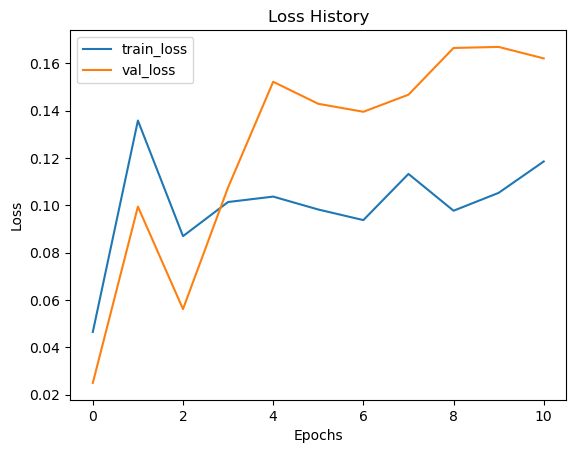

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

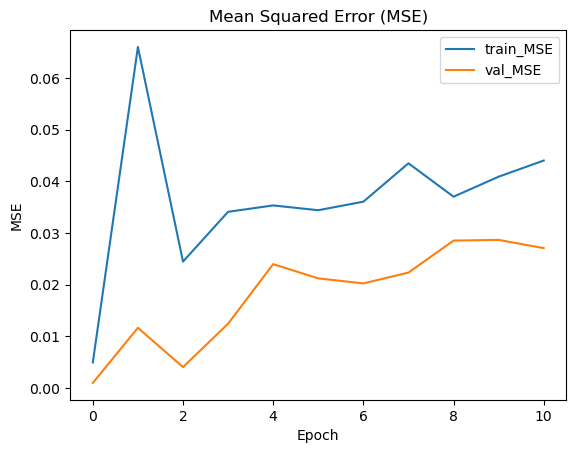

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

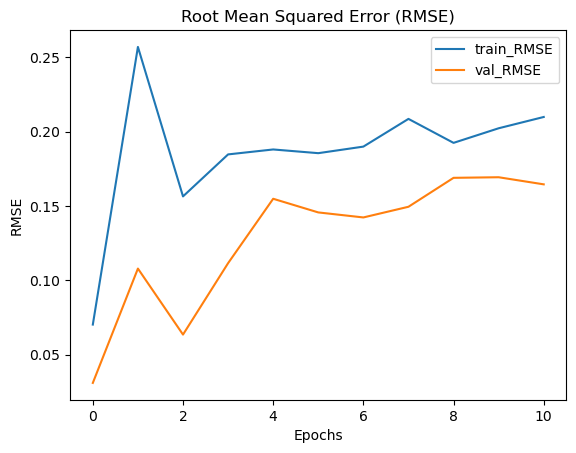

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

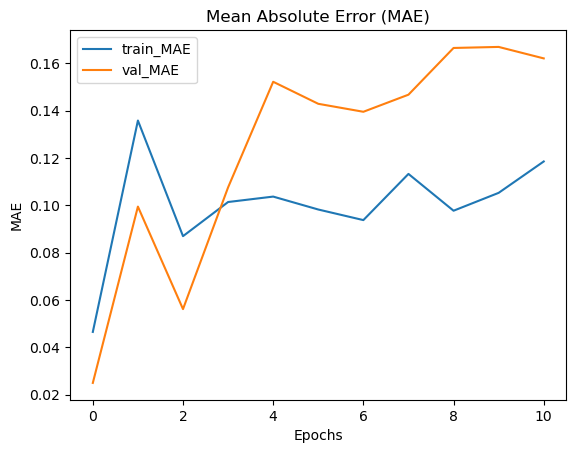

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

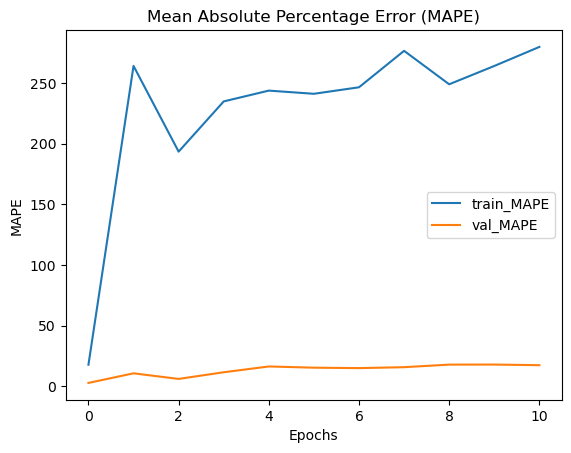

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 22:04:11.698035: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 2)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


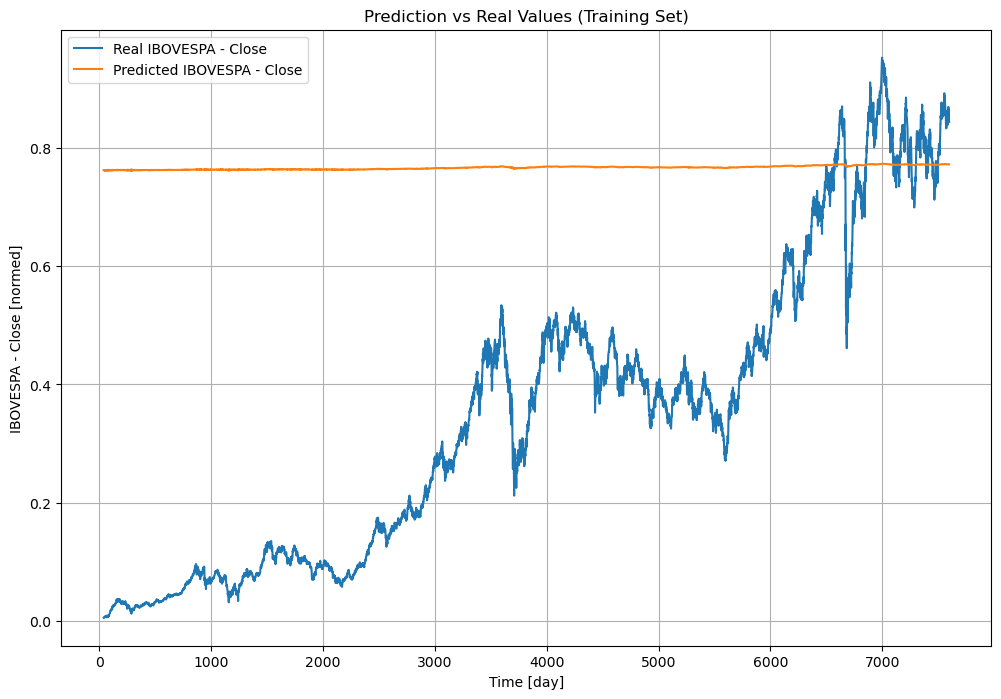

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 2)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


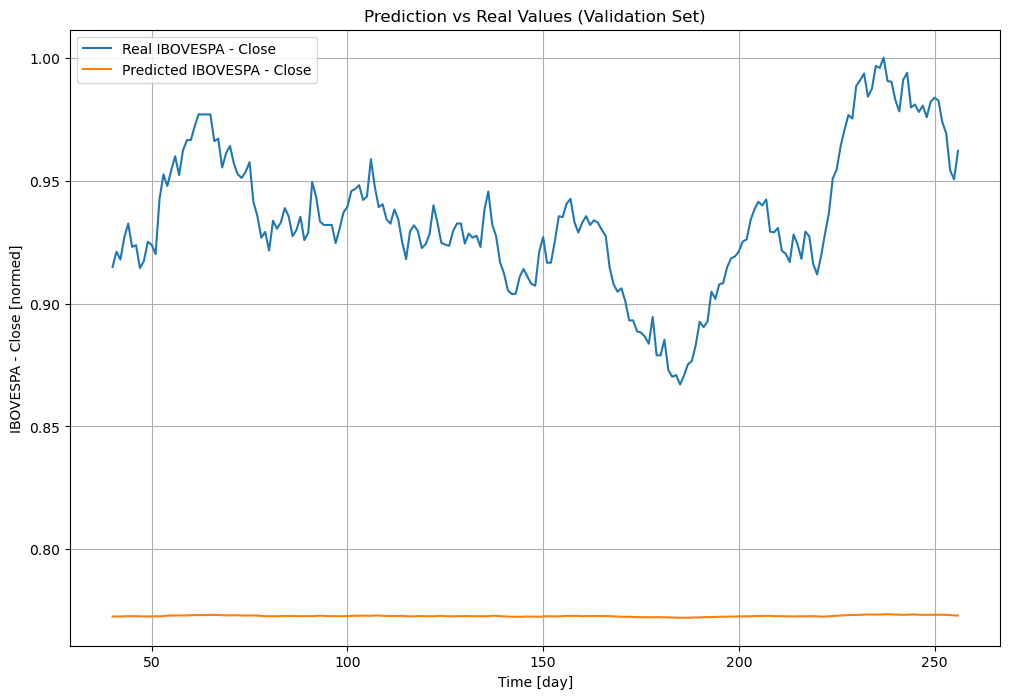

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 2)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


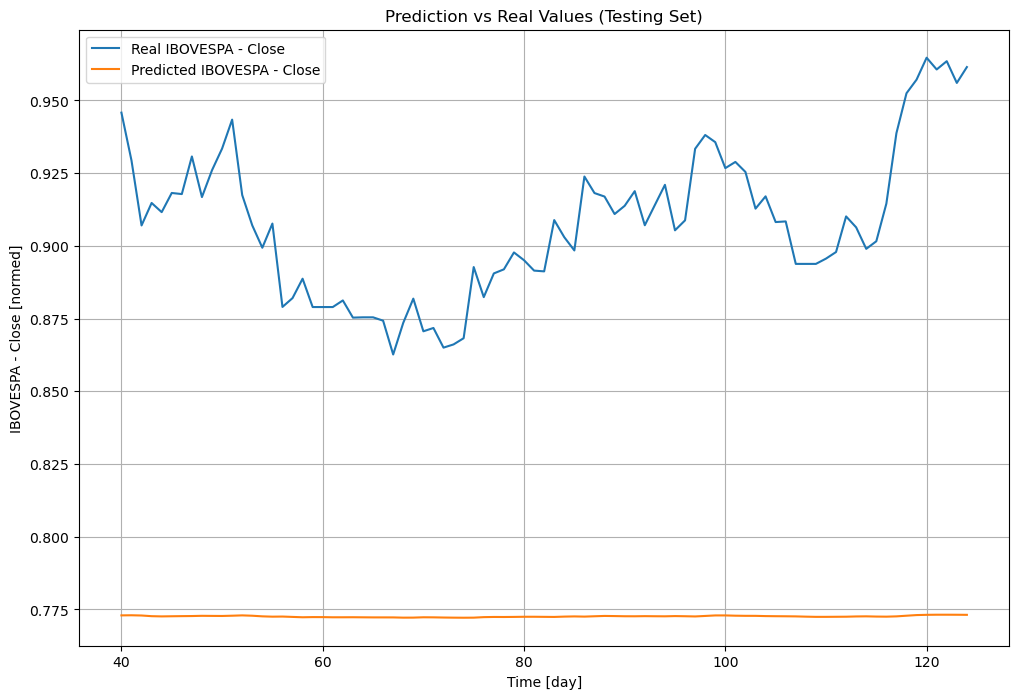

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

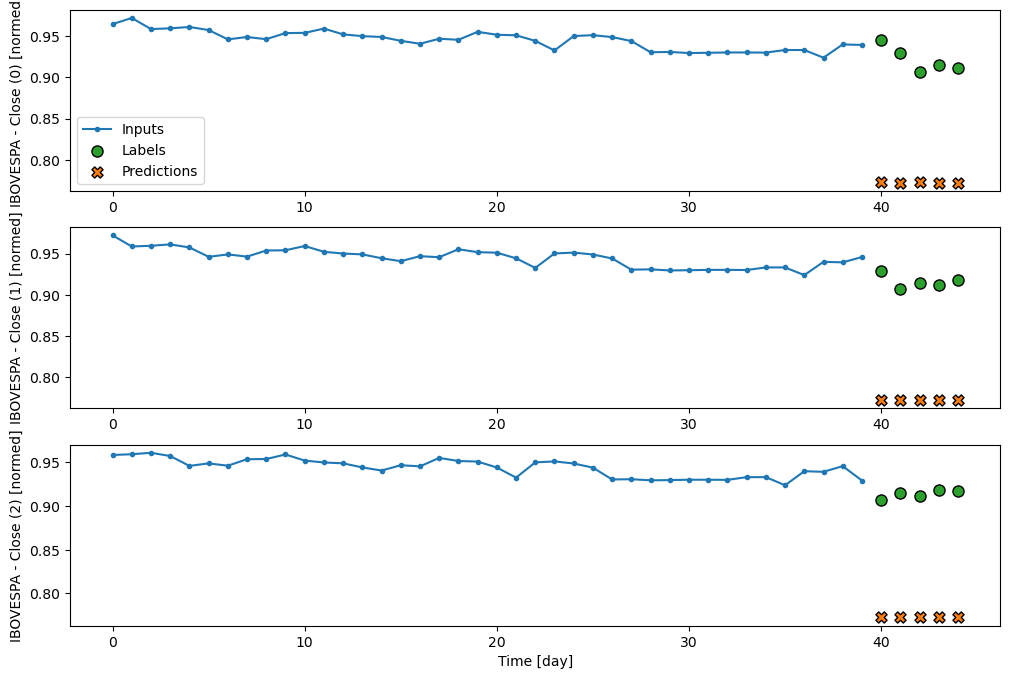

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:43s:344ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


array([[[0.7729535 , 0.7729535 , 0.7729535 , ..., 0.7729535 ,
         0.7729535 , 0.7729535 ],
        [0.77256054, 0.77256054, 0.77256054, ..., 0.77256054,
         0.77256054, 0.77256054],
        [0.77316546, 0.77316546, 0.77316546, ..., 0.77316546,
         0.77316546, 0.77316546],
        [0.77270794, 0.77270794, 0.77270794, ..., 0.77270794,
         0.77270794, 0.77270794],
        [0.77254945, 0.77254945, 0.77254945, ..., 0.77254945,
         0.7740097 , 0.7740097 ]],

       [[0.77299285, 0.77299285, 0.77299285, ..., 0.77299285,
         0.77299285, 0.77299285],
        [0.77259517, 0.77259517, 0.77259517, ..., 0.77259517,
         0.77259517, 0.77259517],
        [0.77320176, 0.77320176, 0.77320176, ..., 0.77320176,
         0.77320176, 0.77320176],
        [0.7727314 , 0.7727314 , 0.7727314 , ..., 0.7727314 ,
         0.7727314 , 0.7727314 ],
        [0.77258766, 0.77258766, 0.77258766, ..., 0.77258766,
         0.7740394 , 0.7740394 ]],

       [[0.7729126 , 0.7729126 , 0.7

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')